# Microsoft Malware detection

<h1>1.Business/Real-world Problem</h1>

<h2>1.1. What is Malware? </h2>

<p>
The term malware is a contraction of malicious software. Put simply, malware is any piece of software that was written with the intent of doing harm to data, devices or to people. <br> 
Source: https://www.avg.com/en/signal/what-is-malware
<p>

pandas<h2> 1.2. Problem Statement </h2>

<p>
    In the past few years, the malware industry has grown very rapidly that, the syndicates invest heavily in technologies to evade traditional protection, forcing the anti-malware groups/communities to build more robust softwares to detect and terminate these attacks. The major part of protecting a computer system from a malware attack is to <b>identify whether a given piece of file/software<b> is a malware. 
</p>


<h2>1.3 Source/Useful Links </h2>

<p>    Microsoft has been very active in building anti-malware products over the years  and it runs it’s anti-malware utilities over <b>150 million computers</b> around the world. This generates tens of millions of daily data points to be analyzed as potential malware. In order to be effective in analyzing and classifying such large amounts of data, we need to be able to group them into groups and identify their respective families. 
<br>
<br>
This dataset provided by Microsoft contains about 9 classes of malware.
,</p>
<p>
<b> Source: </b> https://www.kaggle.com/c/malware-classification
</p>

<h2>1.4. Real-world/Business objectives and constraints.</h2>


1. Minimize multi-class error.
2. Multi-class probability estimates.
3. Malware detection should not take hours and block the user's computer. It should fininsh in a few seconds or a minute.

<h1>2. Machine Learning Problem</h1>

<h2>2.1. Data</h2>

<h3>2.1.1. Data Overview</h3>

<li> Source : https://www.kaggle.com/c/malware-classification/data </li>
<li> For every malware, we have two files <ol> <li> .asm file (read more: https://www.reviversoft.com/file-extensions/asm) </li><li>.bytes file (the raw data contains the hexadecimal representation of the file's binary content, without the PE header)</li></ol></li> 
    
<li>Total train dataset consist of 200GB data out of which 50Gb of data is .bytes files and 150GB of data is .asm files:  </li>
<li><b>Lots of Data for a single-box/computer.</b> </li>

<li>There are total 10,868 .bytes files and 10,868 asm files total 21,736 files </li>

<li>There are 9 types of malwares (9 classes) in our give data</li>
<li> Types of Malware:
    <ol>
        <li> Ramnit </li>
        <li> Lollipop </li>
        <li> Kelihos_ver3 </li>
        <li> Vundo </li>
        <li> Simda </li>
        <li> Tracur </li>
        <li> Kelihos_ver1 </li>
        <li> Obfuscator.ACY </li>
        <li> Gatak </li>
    </ol>
</li>

<h3>2.1.2. Example Data Point</h3>

<p style = "font-size:18px"><b> .asm file</b></p>
<pre>
.text:00401000								       assume es:nothing, ss:nothing, ds:_data,	fs:nothing, gs:nothing
.text:00401000 56							       push    esi
.text:00401001 8D 44 24	08						       lea     eax, [esp+8]
.text:00401005 50							       push    eax
.text:00401006 8B F1							       mov     esi, ecx
.text:00401008 E8 1C 1B	00 00						       call    ??0exception@std@@QAE@ABQBD@Z ; std::exception::exception(char const * const &)
.text:0040100D C7 06 08	BB 42 00					       mov     dword ptr [esi],	offset off_42BB08
.text:00401013 8B C6							       mov     eax, esi
.text:00401015 5E							       pop     esi
.text:00401016 C2 04 00							       retn    4
.text:00401016						       ; ---------------------------------------------------------------------------
.text:00401019 CC CC CC	CC CC CC CC					       align 10h
.text:00401020 C7 01 08	BB 42 00					       mov     dword ptr [ecx],	offset off_42BB08
.text:00401026 E9 26 1C	00 00						       jmp     sub_402C51
.text:00401026						       ; ---------------------------------------------------------------------------
.text:0040102B CC CC CC	CC CC						       align 10h
.text:00401030 56							       push    esi
.text:00401031 8B F1							       mov     esi, ecx
.text:00401033 C7 06 08	BB 42 00					       mov     dword ptr [esi],	offset off_42BB08
.text:00401039 E8 13 1C	00 00						       call    sub_402C51
.text:0040103E F6 44 24	08 01						       test    byte ptr	[esp+8], 1
.text:00401043 74 09							       jz      short loc_40104E
.text:00401045 56							       push    esi
.text:00401046 E8 6C 1E	00 00						       call    ??3@YAXPAX@Z    ; operator delete(void *)
.text:0040104B 83 C4 04							       add     esp, 4
.text:0040104E
.text:0040104E						       loc_40104E:			       ; CODE XREF: .text:00401043j
.text:0040104E 8B C6							       mov     eax, esi
.text:00401050 5E							       pop     esi
.text:00401051 C2 04 00							       retn    4
.text:00401051						       ; ---------------------------------------------------------------------------
</pre>
<p style = "font-size:18px"><b> .bytes file</b></p>
<pre>
00401000 00 00 80 40 40 28 00 1C 02 42 00 C4 00 20 04 20
00401010 00 00 20 09 2A 02 00 00 00 00 8E 10 41 0A 21 01
00401020 40 00 02 01 00 90 21 00 32 40 00 1C 01 40 C8 18
00401030 40 82 02 63 20 00 00 09 10 01 02 21 00 82 00 04
00401040 82 20 08 83 00 08 00 00 00 00 02 00 60 80 10 80
00401050 18 00 00 20 A9 00 00 00 00 04 04 78 01 02 70 90
00401060 00 02 00 08 20 12 00 00 00 40 10 00 80 00 40 19
00401070 00 00 00 00 11 20 80 04 80 10 00 20 00 00 25 00
00401080 00 00 01 00 00 04 00 10 02 C1 80 80 00 20 20 00
00401090 08 A0 01 01 44 28 00 00 08 10 20 00 02 08 00 00
004010A0 00 40 00 00 00 34 40 40 00 04 00 08 80 08 00 08
004010B0 10 00 40 00 68 02 40 04 E1 00 28 14 00 08 20 0A
004010C0 06 01 02 00 40 00 00 00 00 00 00 20 00 02 00 04
004010D0 80 18 90 00 00 10 A0 00 45 09 00 10 04 40 44 82
004010E0 90 00 26 10 00 00 04 00 82 00 00 00 20 40 00 00
004010F0 B4 00 00 40 00 02 20 25 08 00 00 00 00 00 00 00
00401100 08 00 00 50 00 08 40 50 00 02 06 22 08 85 30 00
00401110 00 80 00 80 60 00 09 00 04 20 00 00 00 00 00 00
00401120 00 82 40 02 00 11 46 01 4A 01 8C 01 E6 00 86 10
00401130 4C 01 22 00 64 00 AE 01 EA 01 2A 11 E8 10 26 11
00401140 4E 11 8E 11 C2 00 6C 00 0C 11 60 01 CA 00 62 10
00401150 6C 01 A0 11 CE 10 2C 11 4E 10 8C 00 CE 01 AE 01
00401160 6C 10 6C 11 A2 01 AE 00 46 11 EE 10 22 00 A8 00
00401170 EC 01 08 11 A2 01 AE 10 6C 00 6E 00 AC 11 8C 00
00401180 EC 01 2A 10 2A 01 AE 00 40 00 C8 10 48 01 4E 11
00401190 0E 00 EC 11 24 10 4A 10 04 01 C8 11 E6 01 C2 00

</pre>

<h2>2.2. Mapping the real-world problem to an ML problem</h2>

<h3>2.2.1. Type of Machine Learning Problem</h3>

<p>
    
            There are nine different classes of malware that we need to classify a given a data point => Multi class classification problem    
</p>

<h3>2.2.2. Performance Metric</h3>

Source: https://www.kaggle.com/c/malware-classification#evaluation

Metric(s): 
* Multi class log-loss 
* Confusion matrix 


<h3>2.2.3. Machine Learing Objectives and Constraints</h3>

<p> Objective: Predict the probability of each data-point belonging to each of the nine classes.
</p>
<p> Constraints:
</p>
* Class probabilities are needed.
* Penalize the errors in class probabilites => Metric is Log-loss.
* Some Latency constraints.

<h2>2.3. Train and Test Dataset </h2>

Split the dataset randomly into three parts train, cross validation and test with 64%,16%, 20% of data respectively

<h2>2.4. Useful blogs, videos and reference papers</h2>

<p>
http://blog.kaggle.com/2015/05/26/microsoft-malware-winners-interview-1st-place-no-to-overfitting/ <br>
https://arxiv.org/pdf/1511.04317.pdf <br>
First place solution in Kaggle competition: https://www.youtube.com/watch?v=VLQTRlLGz5Y <br>
https://github.com/dchad/malware-detection <br>
http://vizsec.org/files/2011/Nataraj.pdf <br>
https://www.dropbox.com/sh/gfqzv0ckgs4l1bf/AAB6EelnEjvvuQg2nu_pIB6ua?dl=0 <br>
" Cross validation is more trustworthy than domain knowledge." 
</p>

<h1>3. Exploratory Data Analysis</h1>

```bash
Python 3.10.8

pip install matplotlib==3.6.2
pip install numpy==1.23.5
pip install pandas==1.5.2
pip install prettytable==3.5.0
pip install scikit_learn==1.2.0
pip install scipy==1.9.3
pip install seaborn==0.12.1
pip install tqdm==4.64.1
pip install xgboost==1.7.2
```

In [1]:
import time
noww_ = time.time()

import os
import shutil
import pickle
import warnings
import codecs # this is used for file operations 

import glob
import matplotlib
import matplotlib.pyplot as plt

import random as r
import numpy as np
import pandas as pd
import seaborn as sns
from tqdm import tqdm

import multiprocessing
from multiprocessing import Process # this is used for multithreading

from scipy.sparse import vstack
from scipy.sparse import hstack
from scipy.sparse import load_npz
from scipy.sparse import save_npz
from scipy.sparse import csr_matrix

from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest

from sklearn.metrics import log_loss
from sklearn.metrics import confusion_matrix

from sklearn import preprocessing
from sklearn.manifold import TSNE
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.calibration import CalibratedClassifierCV
from sklearn.model_selection import RandomizedSearchCV

%matplotlib inline

In [2]:
#separating byte files and asm files 

source = '/media/jishnu/2CC01383C0135286/MicroSoft/train'
destination_1 = '/media/jishnu/2CC01383C0135286/MicroSoft/byteFiles'
destination_2 = '/media/jishnu/2CC01383C0135286/MicroSoft/asmFiles'

# we will check if the folder 'byteFiles' exists if it not there we will create a folder with the same name
if not os.path.isdir(destination_1):
    os.makedirs(destination_1)
if not os.path.isdir(destination_2):
    os.makedirs(destination_2)

# if we have folder called 'train' (train folder contains both .asm files and .bytes files) we will rename it 'asmFiles'
# for every file that we have in our 'asmFiles' directory we check if it is ending with .bytes, if yes we will move it to
# 'byteFiles' folder

# so by the end of this snippet we will separate all the .byte files and .asm files
if os.path.isdir(source):
    data_files = os.listdir(source)
    for file in data_files:
        if (file.endswith('bytes')):
            shutil.move(source + '/' + file,destination_1)
        if (file.endswith('asm')):
            shutil.move(source + '/' + file,destination_2)

<h2>3.1. Distribution of malware classes in whole data set </h2>

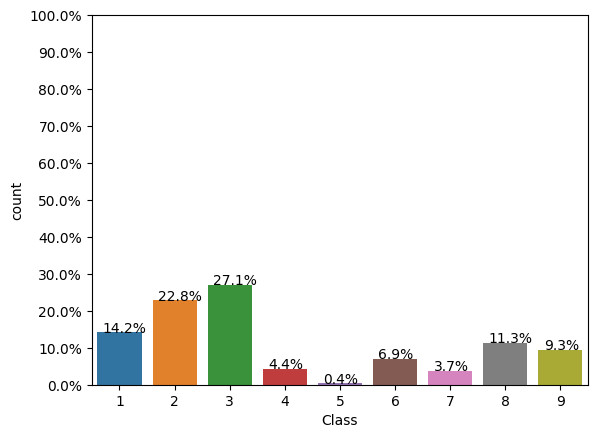

In [3]:
# https://stackoverflow.com/a/51932652

Y = pd.read_csv('trainLabels.csv')
total = len(Y) * 1.
ax = sns.countplot(x = 'Class', data = Y)
for p in ax.patches:
        ax.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x()+0.1, p.get_height()+5))

# put 11 ticks (therefore 10 steps), from 0 to the total number of rows in the dataframe
ax.yaxis.set_ticks(np.linspace(0, total, 11))

# adjust the ticklabel to the desired format, without changing the position of the ticks. 
ax.set_yticklabels(map('{:.1f}%'.format, 100*ax.yaxis.get_majorticklocs()/total))
plt.show()

<h2>3.2. Feature extraction </h2>

<h3> 3.2.1 File size  of byte files as a feature </h3>

In [4]:
#file sizes of byte files

files = os.listdir('/media/jishnu/2CC01383C0135286/MicroSoft/byteFiles')
filenames = Y['Id'].tolist()
class_y = Y['Class'].tolist()
class_bytes = []
sizebytes = []
fnames = []
for file in files:
    # print(os.stat('byteFiles/0A32eTdBKayjCWhZqDOQ.txt'))
    # os.stat_result(st_mode=33206, st_ino=1125899906874507, st_dev=3561571700, st_nlink=1, st_uid=0, st_gid=0, 
    # st_size=3680109, st_atime=1519638522, st_mtime=1519638522, st_ctime=1519638522)
    # read more about os.stat: here https://www.tutorialspoint.com/python/os_stat.htm
    statinfo = os.stat('/media/jishnu/2CC01383C0135286/MicroSoft/byteFiles/' + file)
    # split the file name at '.' and take the first part of it i.e the file name
    file = file.split('.')[0]
    if any(file == filename for filename in filenames):
        i = filenames.index(file)
        class_bytes.append(class_y[i])
        # converting into Mb's
        sizebytes.append(statinfo.st_size / (1024.0*1024.0))
        fnames.append(file)
data_size_byte = pd.DataFrame({'ID' : fnames, 'size' : sizebytes, 'Class' : class_bytes})
print (data_size_byte.head())

                     ID      size  Class
0  01azqd4InC7m9JpocGv5  4.148438      9
1  01IsoiSMh5gxyDYTl4CB  5.425781      2
2  01jsnpXSAlgw6aPeDxrU  3.808594      9
3  01kcPWA9K2BOxQeS5Rju  0.562500      1
4  01SuzwMJEIXsK7A8dQbl  0.363281      8


<h3> 3.2.2 box plots of file size (.byte files) feature </h3>

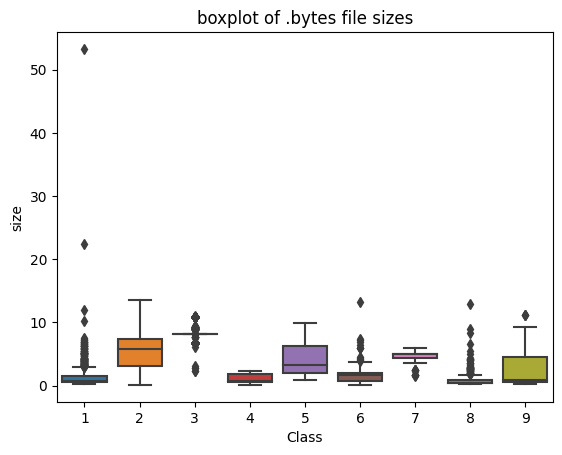

In [5]:
#boxplot of byte files
ax = sns.boxplot(x = 'Class', y = 'size', data = data_size_byte)
plt.title("boxplot of .bytes file sizes")
plt.show()

<h3>3.2.3 feature extraction from byte files </h3>

In [6]:
byte_features = pd.read_csv('result.csv')
byte_features['ID']  = byte_features['ID'].str.split('.').str[0]
byte_features.head(2)

ID       0     1     2     3     4     5     6     7  \
0  01azqd4InC7m9JpocGv5  601905  3905  2816  3832  3345  3242  3650  3201   
1  01IsoiSMh5gxyDYTl4CB   39755  8337  7249  7186  8663  6844  8420  7589   

      8  ...    f7    f8    f9    fa    fb    fc    fd     fe     ff    ??  
0  2965  ...  2804  3687  3101  3211  3097  2758  3099   2759   5753  1824  
1  9291  ...   451  6536   439   281   302  7639   518  17001  54902  8588  

[2 rows x 258 columns]

In [7]:
data_size_byte.head(2)

ID      size  Class
0  01azqd4InC7m9JpocGv5  4.148438      9
1  01IsoiSMh5gxyDYTl4CB  5.425781      2

In [8]:
byte_features_with_size = byte_features.merge(data_size_byte, on = 'ID')
byte_features_with_size.to_csv('result_with_size.csv')
byte_features_with_size.head(2)

ID       0     1     2     3     4     5     6     7  \
0  01azqd4InC7m9JpocGv5  601905  3905  2816  3832  3345  3242  3650  3201   
1  01IsoiSMh5gxyDYTl4CB   39755  8337  7249  7186  8663  6844  8420  7589   

      8  ...    f9    fa    fb    fc    fd     fe     ff    ??      size  \
0  2965  ...  3101  3211  3097  2758  3099   2759   5753  1824  4.148438   
1  9291  ...   439   281   302  7639   518  17001  54902  8588  5.425781   

   Class  
0      9  
1      2  

[2 rows x 260 columns]

In [9]:
# https://stackoverflow.com/a/29651514
def normalize(df):
    result1 = df.copy()
    for feature_name in df.columns:
        if (str(feature_name) != str('ID') and str(feature_name) != str('Class')):
            max_value = df[feature_name].max()
            min_value = df[feature_name].min()
            result1[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
    return result1
result = normalize(byte_features_with_size)

In [10]:
result.head(2)

ID         0         1         2         3         4  \
0  01azqd4InC7m9JpocGv5  0.262806  0.005498  0.001567  0.002067  0.002048   
1  01IsoiSMh5gxyDYTl4CB  0.017358  0.011737  0.004033  0.003876  0.005303   

          5         6         7         8  ...       f9        fa        fb  \
0  0.001835  0.002058  0.002946  0.002638  ...  0.01356  0.013107  0.013634   
1  0.003873  0.004747  0.006984  0.008267  ...  0.00192  0.001147  0.001329   

         fc        fd        fe        ff        ??      size  Class  
0  0.031724  0.014549  0.014348  0.007843  0.000129  0.075971      9  
1  0.087867  0.002432  0.088411  0.074851  0.000606  0.099986      2  

[2 rows x 260 columns]

In [11]:
data_y = result['Class']
result.head()

ID         0         1         2         3         4  \
0  01azqd4InC7m9JpocGv5  0.262806  0.005498  0.001567  0.002067  0.002048   
1  01IsoiSMh5gxyDYTl4CB  0.017358  0.011737  0.004033  0.003876  0.005303   
2  01jsnpXSAlgw6aPeDxrU  0.040827  0.013434  0.001429  0.001315  0.005464   
3  01kcPWA9K2BOxQeS5Rju  0.009209  0.001708  0.000404  0.000441  0.000770   
4  01SuzwMJEIXsK7A8dQbl  0.008629  0.001000  0.000168  0.000234  0.000342   

          5         6         7         8  ...        f9        fa        fb  \
0  0.001835  0.002058  0.002946  0.002638  ...  0.013560  0.013107  0.013634   
1  0.003873  0.004747  0.006984  0.008267  ...  0.001920  0.001147  0.001329   
2  0.005280  0.005078  0.002155  0.008104  ...  0.009804  0.011777  0.012604   
3  0.000354  0.000310  0.000481  0.000959  ...  0.002121  0.001886  0.002272   
4  0.000232  0.000148  0.000229  0.000376  ...  0.001530  0.000853  0.001052   

         fc        fd        fe        ff        ??      size  Class  
0  0.031724  0.014549  0.014348  0.007843  0.000129  0.075971      9  
1  0.087867  0.002432  0.088411  0.074851  0.000606  0.099986      2  
2  0.028423  0.013080  0.013937  0.067001  0.000033  0.069582      9  
3  0.013032  0.002211  0.003957  0.010904  0.000984  0.008556      1  
4  0.007511  0.001038  0.001258  0.002998  0.000636  0.004810      8  

[5 rows x 260 columns]

<h3>3.2.4 Multivariate Analysis </h3>

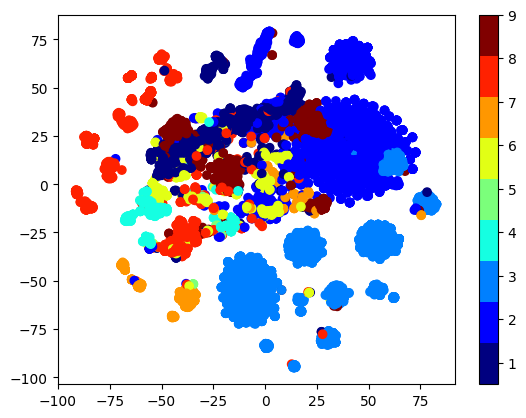

In [12]:
# multivariate analysis on byte files
# this is with perplexity 50

xtsne = TSNE(perplexity = 50)
results = xtsne.fit_transform(result.drop(['ID', 'Class'], axis = 1))
vis_x = results[:, 0]
vis_y = results[:, 1]
plt.scatter(vis_x, vis_y, c=data_y, cmap=plt.cm.get_cmap('jet', 9))
plt.colorbar(ticks = range(10))
plt.clim(0.5, 9)
plt.show()

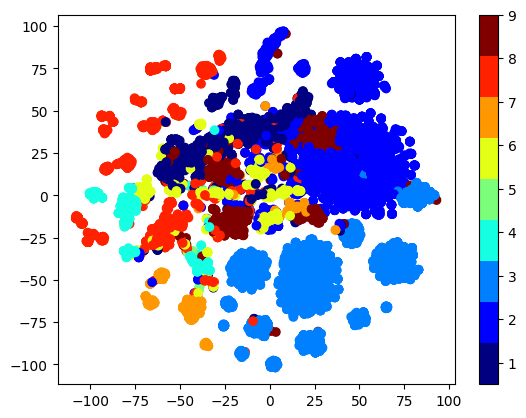

In [13]:
# this is with perplexity 30

xtsne = TSNE(perplexity = 30)
results = xtsne.fit_transform(result.drop(['ID', 'Class'], axis = 1))
vis_x = results[:, 0]
vis_y = results[:, 1]
plt.scatter(vis_x, vis_y, c=data_y, cmap=plt.cm.get_cmap('jet', 9))
plt.colorbar(ticks = range(10))
plt.clim(0.5, 9)
plt.show()

# Train Test split

In [14]:
data_y = result['Class']
# split the data into test and train by maintaining same distribution of output varaible 'y_true' [stratify=y_true]
X_train, X_test, y_train, y_test = train_test_split(result.drop(['ID', 'Class'], axis = 1), data_y, stratify = data_y, test_size = 0.20)
# split the train data into train and cross validation by maintaining same distribution of output varaible 'y_train' [stratify=y_train]
X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train, stratify = y_train, test_size = 0.20)

In [15]:
print('Number of data points in train data :', X_train.shape[0])
print('Number of data points in test data :', X_test.shape[0])
print('Number of data points in cross validation data :', X_cv.shape[0])

Number of data points in train data : 6956
Number of data points in test data : 2174
Number of data points in cross validation data : 1739


* DataFrame.sortlevel() Deprecated since version 0.20.0: Use DataFrame.sort_index()

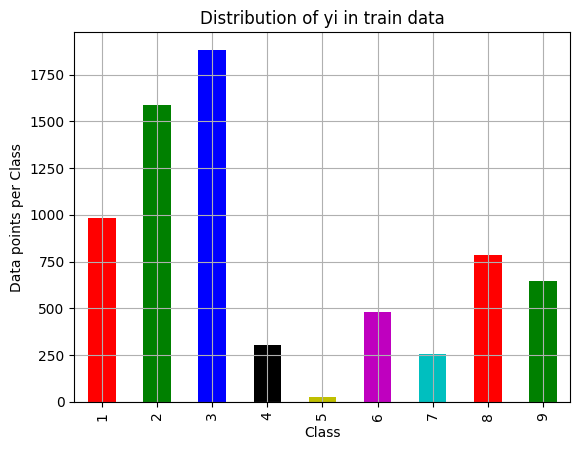

Number of data points in class 3 : 1883 ( 27.07 %)
Number of data points in class 2 : 1586 ( 22.8 %)
Number of data points in class 1 : 986 ( 14.175 %)
Number of data points in class 8 : 786 ( 11.3 %)
Number of data points in class 9 : 648 ( 9.316 %)
Number of data points in class 6 : 481 ( 6.915 %)
Number of data points in class 4 : 304 ( 4.37 %)
Number of data points in class 7 : 255 ( 3.666 %)
Number of data points in class 5 : 27 ( 0.388 %)
--------------------------------------------------------------------------------


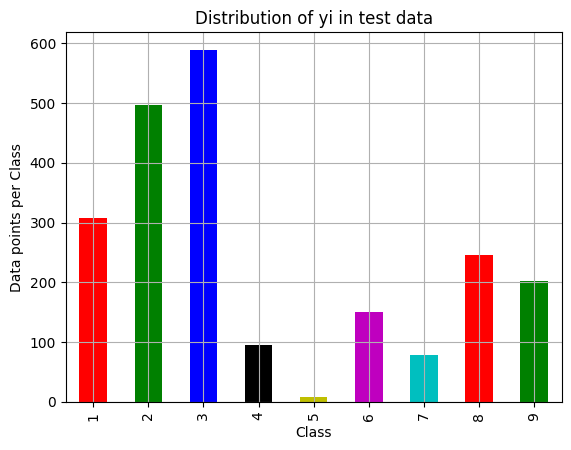

Number of data points in class 3 : 589 ( 27.093 %)
Number of data points in class 2 : 496 ( 22.815 %)
Number of data points in class 1 : 308 ( 14.167 %)
Number of data points in class 8 : 246 ( 11.316 %)
Number of data points in class 9 : 203 ( 9.338 %)
Number of data points in class 6 : 150 ( 6.9 %)
Number of data points in class 4 : 95 ( 4.37 %)
Number of data points in class 7 : 79 ( 3.634 %)
Number of data points in class 5 : 8 ( 0.368 %)
--------------------------------------------------------------------------------


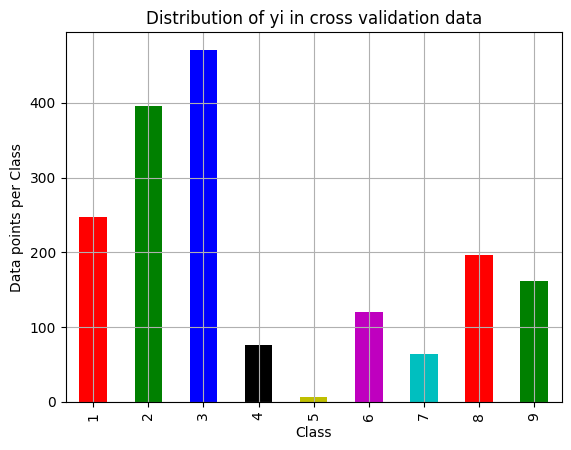

Number of data points in class 3 : 471 ( 27.085 %)
Number of data points in class 2 : 396 ( 22.772 %)
Number of data points in class 1 : 247 ( 14.204 %)
Number of data points in class 8 : 196 ( 11.271 %)
Number of data points in class 9 : 162 ( 9.316 %)
Number of data points in class 6 : 120 ( 6.901 %)
Number of data points in class 4 : 76 ( 4.37 %)
Number of data points in class 7 : 64 ( 3.68 %)
Number of data points in class 5 : 7 ( 0.403 %)


In [16]:
# it returns a dict, keys as class labels and values as the number of data points in that class

train_class_distribution = y_train.value_counts().sort_index()
test_class_distribution = y_test.value_counts().sort_index()
cv_class_distribution = y_cv.value_counts().sort_index()

my_colors = ['r', 'g', 'b', 'k', 'y', 'm', 'c']

train_class_distribution.plot(kind = 'bar', color = my_colors)
plt.xlabel('Class')
plt.ylabel('Data points per Class')
plt.title('Distribution of yi in train data')
plt.grid()
plt.show()

# ref: argsort https://docs.scipy.org/doc/numpy/reference/generated/numpy.argsort.html
# -(train_class_distribution.values): the minus sign will give us in decreasing order
sorted_yi = np.argsort(-train_class_distribution.values)
for i in sorted_yi:
    print('Number of data points in class', i+1, ':',train_class_distribution.values[i], '(', np.round((train_class_distribution.values[i]/y_train.shape[0]*100), 3), '%)')

print('-'*80)
test_class_distribution.plot(kind = 'bar', color = my_colors)
plt.xlabel('Class')
plt.ylabel('Data points per Class')
plt.title('Distribution of yi in test data')
plt.grid()
plt.show()

# ref: argsort https://docs.scipy.org/doc/numpy/reference/generated/numpy.argsort.html
# -(train_class_distribution.values): the minus sign will give us in decreasing order
sorted_yi = np.argsort(-test_class_distribution.values)
for i in sorted_yi:
    print('Number of data points in class', i+1, ':',test_class_distribution.values[i], '(', np.round((test_class_distribution.values[i]/y_test.shape[0]*100), 3), '%)')

print('-'*80)
cv_class_distribution.plot(kind = 'bar', color = my_colors)
plt.xlabel('Class')
plt.ylabel('Data points per Class')
plt.title('Distribution of yi in cross validation data')
plt.grid()
plt.show()

# ref: argsort https://docs.scipy.org/doc/numpy/reference/generated/numpy.argsort.html
# -(train_class_distribution.values): the minus sign will give us in decreasing order
sorted_yi = np.argsort(-train_class_distribution.values)
for i in sorted_yi:
    print('Number of data points in class', i+1, ':',cv_class_distribution.values[i], '(', np.round((cv_class_distribution.values[i]/y_cv.shape[0]*100), 3), '%)')


In [17]:
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    print('Number of misclassified points ', (len(test_y) - np.trace(C)) / len(test_y) * 100)
    # C = 9,9 matrix, each cell (i,j) represents number of points of class i are predicted class j
    
    A =(((C.T)/(C.sum(axis = 1))).T)
    #divid each element of the confusion matrix with the sum of elements in that column
    
    # C = [[1, 2],
    #     [3, 4]]
    # C.T = [[1, 3],
    #        [2, 4]]
    # C.sum(axis = 1)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =1) = [[3, 7]]
    # ((C.T)/(C.sum(axis=1))) = [[1/3, 3/7]
    #                           [2/3, 4/7]]

    # ((C.T)/(C.sum(axis=1))).T = [[1/3, 2/3]
    #                           [3/7, 4/7]]
    # sum of row elements = 1
    
    B =(C/C.sum(axis=0))
    #divid each element of the confusion matrix with the sum of elements in that row
    # C = [[1, 2],
    #     [3, 4]]
    # C.sum(axis = 0)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =0) = [[4, 6]]
    # (C/C.sum(axis=0)) = [[1/4, 2/6],
    #                      [3/4, 4/6]] 
    
    labels = [1, 2, 3, 4, 5, 6, 7, 8, 9]
    cmap=sns.light_palette('green')
    # representing A in heatmap format
    print('-' * 50, 'Confusion matrix', '-' * 50)
    plt.figure(figsize = (10, 5))
    sns.heatmap(C, annot = True, cmap = cmap, fmt = '.3f', xticklabels = labels, yticklabels = labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()

    print('-' * 50, 'Precision matrix', '-' * 50)
    plt.figure(figsize = (10, 5))
    sns.heatmap(B, annot = True, cmap = cmap, fmt = '.3f', xticklabels = labels, yticklabels = labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()
    print('Sum of columns in precision matrix', B.sum(axis = 0))
    
    # representing B in heatmap format
    print('-' * 50, 'Recall matrix', '-' * 50)
    plt.figure(figsize = (10, 5))
    sns.heatmap(A, annot = True, cmap = cmap, fmt = '.3f', xticklabels = labels, yticklabels = labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()
    print('Sum of rows in precision matrix', A.sum(axis = 1))

<h1>4. Machine Learning Models</h1>

<h2>4.1. Machine Leaning Models on bytes files</h2>

<h3>4.1.1. Random Model</h3>

Log loss on Cross Validation Data using Random Model 2.45148285169037
Log loss on Test Data using Random Model 2.5086175920016953
Number of misclassified points  89.88040478380864
-------------------------------------------------- Confusion matrix --------------------------------------------------


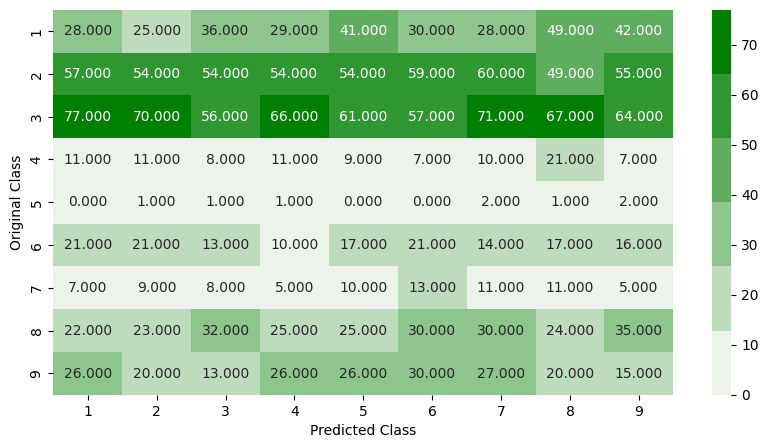

-------------------------------------------------- Precision matrix --------------------------------------------------


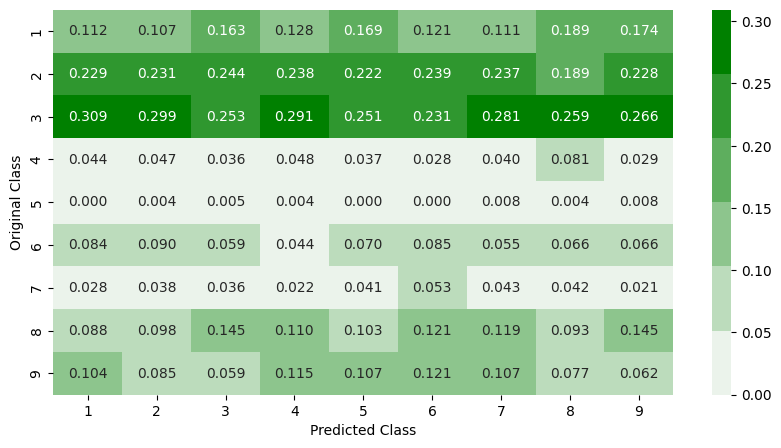

Sum of columns in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


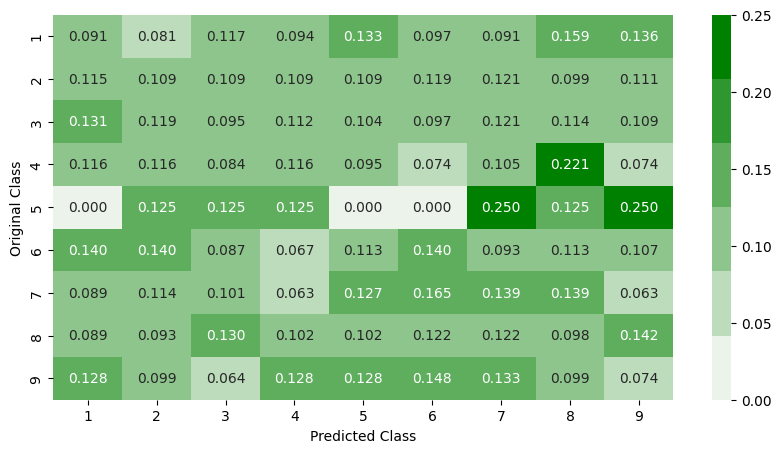

Sum of rows in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [18]:
# we need to generate 9 numbers and the sum of numbers should be 1
# one solution is to genarate 9 numbers and divide each of the numbers by their sum
# ref: https://stackoverflow.com/a/18662466/4084039

test_data_len = X_test.shape[0]
cv_data_len = X_cv.shape[0]

# we create a output array that has exactly same size as the CV data
cv_predicted_y = np.zeros((cv_data_len, 9))
for i in range(cv_data_len):
    rand_probs = np.random.rand(1, 9)
    cv_predicted_y[i] = ((rand_probs/sum(sum(rand_probs)))[0])
print('Log loss on Cross Validation Data using Random Model', log_loss(y_cv,cv_predicted_y, eps = 1e-15))


# Test-Set error.
#we create a output array that has exactly same as the test data
test_predicted_y = np.zeros((test_data_len, 9))
for i in range(test_data_len):
    rand_probs = np.random.rand(1, 9)
    test_predicted_y[i] = ((rand_probs/sum(sum(rand_probs)))[0])
print('Log loss on Test Data using Random Model', log_loss(y_test, test_predicted_y, eps = 1e-15))

predicted_y =np.argmax(test_predicted_y, axis = 1)
plot_confusion_matrix(y_test, predicted_y + 1)

<h3>4.1.2. K Nearest Neighbour Classification</h3>

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:06<00:00,  1.05it/s]

log_loss for k =  1 is 0.2258058362945695
log_loss for k =  3 is 0.19440272073018175
log_loss for k =  5 is 0.2114305999021359
log_loss for k =  7 is 0.23084257688760185
log_loss for k =  9 is 0.2448642777560903
log_loss for k =  11 is 0.2607597210677935
log_loss for k =  13 is 0.2732625556179401


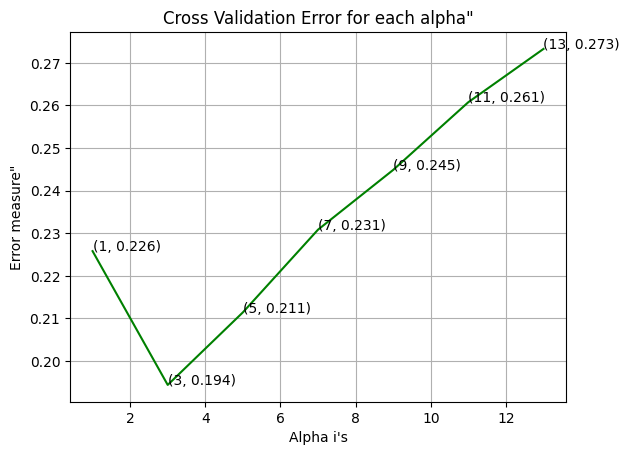

For values of best alpha =  3 The train log loss is :  0.11180749284672117
For values of best alpha =  3 The cross validation log loss is :  0.19440272073018175
For values of best alpha =  3 The test log loss is :  0.21807087818242812
Number of misclassified points  5.289788408463662
-------------------------------------------------- Confusion matrix --------------------------------------------------


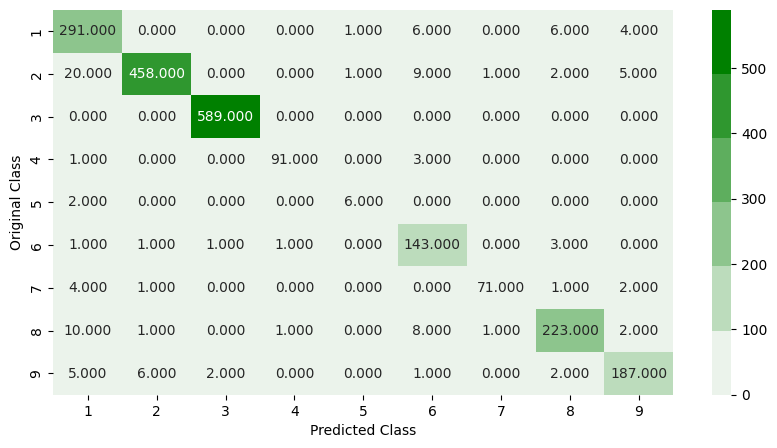

-------------------------------------------------- Precision matrix --------------------------------------------------


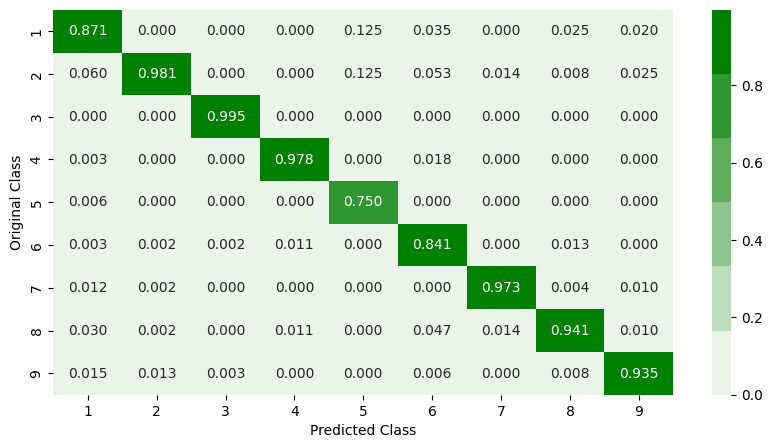

Sum of columns in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


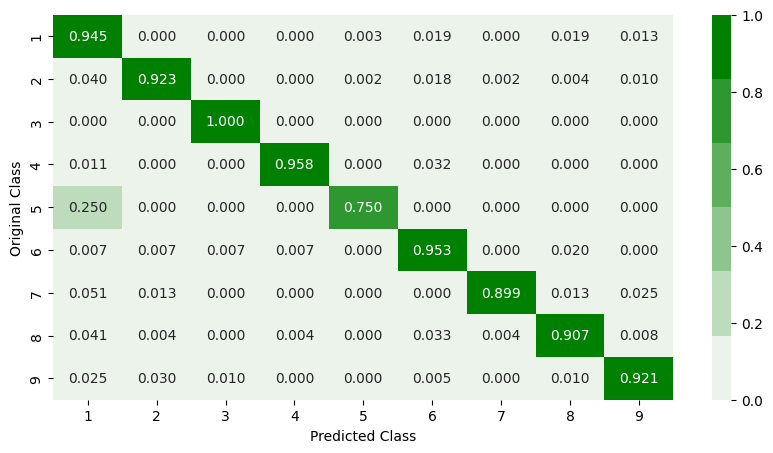

Sum of rows in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [19]:
# http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
# http://scikit-learn.org/stable/modules/generated/sklearn.calibration.CalibratedClassifierCV.html
 
alpha = [x for x in range(1, 15, 2)]
cv_log_error_array = []
for i in tqdm(alpha):
    k_cfl = KNeighborsClassifier(n_neighbors = i)
    k_cfl.fit(X_train, y_train)
    sig_clf = CalibratedClassifierCV(k_cfl, method = 'sigmoid', n_jobs = -1)
    sig_clf.fit(X_train, y_train)
    predict_y = sig_clf.predict_proba(X_cv)
    cv_log_error_array.append(log_loss(y_cv, predict_y, labels = k_cfl.classes_, eps = 1e-15))
    
for i in range(len(cv_log_error_array)):
    print('log_loss for k = ',alpha[i], 'is', cv_log_error_array[i])

best_alpha = np.argmin(cv_log_error_array)
    
fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array, c = 'g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i], np.round(txt, 3)), (alpha[i], cv_log_error_array[i]))
plt.grid()
plt.title('Cross Validation Error for each alpha"')
plt.xlabel("Alpha i's")
plt.ylabel('Error measure"')
plt.show()

k_cfl = KNeighborsClassifier(n_neighbors = alpha[best_alpha])
k_cfl.fit(X_train,y_train)
sig_clf = CalibratedClassifierCV(k_cfl, method = 'sigmoid', n_jobs = -1)
sig_clf.fit(X_train, y_train)
    
predict_y = sig_clf.predict_proba(X_train)
print ('For values of best alpha = ', alpha[best_alpha], 'The train log loss is : ', log_loss(y_train, predict_y))
predict_y = sig_clf.predict_proba(X_cv)
print('For values of best alpha = ', alpha[best_alpha], 'The cross validation log loss is : ', log_loss(y_cv, predict_y))
predict_y = sig_clf.predict_proba(X_test)
print('For values of best alpha = ', alpha[best_alpha], 'The test log loss is : ', log_loss(y_test, predict_y))
plot_confusion_matrix(y_test, sig_clf.predict(X_test))

<h3>4.1.3. Logistic Regression</h3>

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:48<00:00,  5.35s/it]

log_loss for c =  1e-05 is 1.1366563866423096
log_loss for c =  0.0001 is 1.1366271133834924
log_loss for c =  0.001 is 1.1334418130510246
log_loss for c =  0.01 is 1.1075478479929723
log_loss for c =  0.1 is 1.0075001205900738
log_loss for c =  1 is 0.9547255302124419
log_loss for c =  10 is 0.9036613453001495
log_loss for c =  100 is 0.9190657215659362
log_loss for c =  1000 is 1.025009300430135


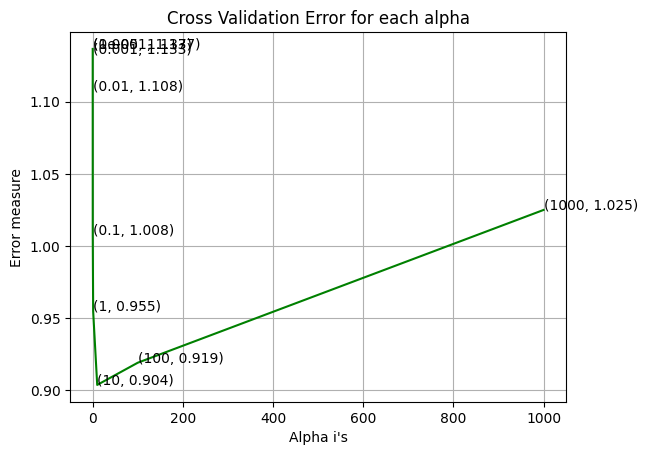

log loss for train data 0.8994621853544987
log loss for cv data 0.9036613453001495
log loss for test data 0.9172750043875239
Number of misclassified points  28.840846366145357
-------------------------------------------------- Confusion matrix --------------------------------------------------


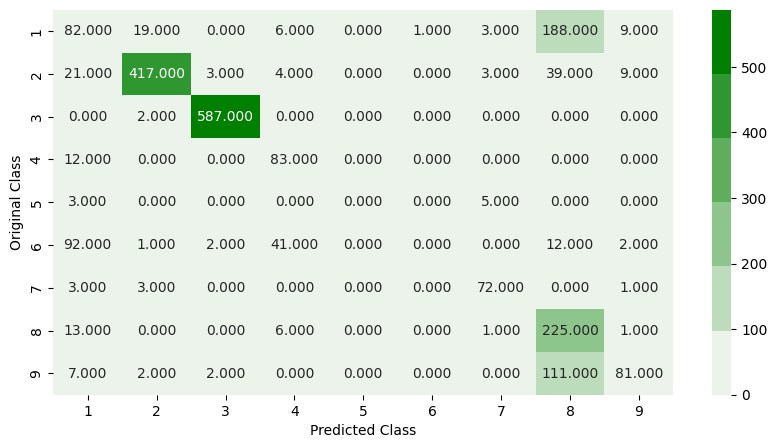

-------------------------------------------------- Precision matrix --------------------------------------------------


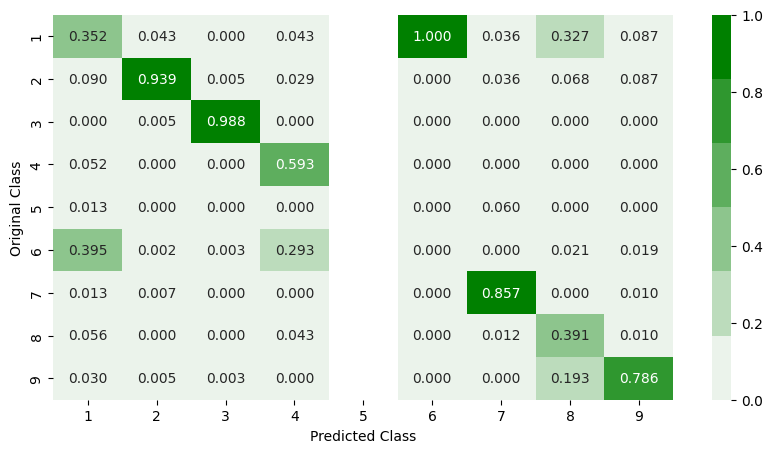

Sum of columns in precision matrix [ 1.  1.  1.  1. nan  1.  1.  1.  1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


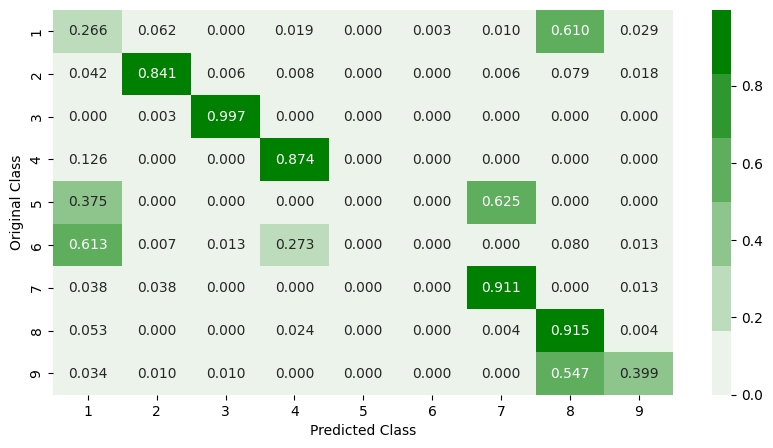

Sum of rows in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [20]:
# http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html

alpha = [10 ** x for x in range(-5, 4)]
cv_log_error_array = []
for i in tqdm(alpha):
    logisticR = LogisticRegression(penalty = 'l2', C = i, class_weight = 'balanced', max_iter = 3000)
    logisticR.fit(X_train,y_train)
    sig_clf = CalibratedClassifierCV(logisticR, method = 'sigmoid', n_jobs = -1)
    sig_clf.fit(X_train, y_train)
    predict_y = sig_clf.predict_proba(X_cv)
    cv_log_error_array.append(log_loss(y_cv, predict_y, labels = logisticR.classes_, eps = 1e-15))
    
for i in range(len(cv_log_error_array)):
    print ('log_loss for c = ', alpha[i], 'is', cv_log_error_array[i])

best_alpha = np.argmin(cv_log_error_array)
    
fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array, c = 'g')
for i, txt in enumerate(np.round(cv_log_error_array, 3)):
    ax.annotate((alpha[i], np.round(txt, 3)), (alpha[i], cv_log_error_array[i]))
plt.grid()
plt.title('Cross Validation Error for each alpha')
plt.xlabel("Alpha i's")
plt.ylabel('Error measure')
plt.show()

logisticR = LogisticRegression(penalty = 'l2', C = alpha[best_alpha], class_weight = 'balanced', max_iter = 3000)
logisticR.fit(X_train, y_train)
sig_clf = CalibratedClassifierCV(logisticR, method = 'sigmoid', n_jobs = -1)
sig_clf.fit(X_train, y_train)
pred_y = sig_clf.predict(X_test)

predict_y = sig_clf.predict_proba(X_train)
print ('log loss for train data',log_loss(y_train, predict_y, labels = logisticR.classes_, eps = 1e-15))
predict_y = sig_clf.predict_proba(X_cv)
print ('log loss for cv data',log_loss(y_cv, predict_y, labels = logisticR.classes_, eps = 1e-15))
predict_y = sig_clf.predict_proba(X_test)
print ('log loss for test data',log_loss(y_test, predict_y, labels = logisticR.classes_, eps = 1e-15))
plot_confusion_matrix(y_test, sig_clf.predict(X_test))

<h3> 4.1.4. Random Forest Classifier </h3>

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [04:14<00:00, 36.29s/it]

log_loss for c =  10 is 0.09081258157382811
log_loss for c =  50 is 0.07249952435001909
log_loss for c =  100 is 0.07158678449514395
log_loss for c =  500 is 0.07042501904323561
log_loss for c =  1000 is 0.07017591536373928
log_loss for c =  2000 is 0.07015120282514706
log_loss for c =  3000 is 0.07024024254086725


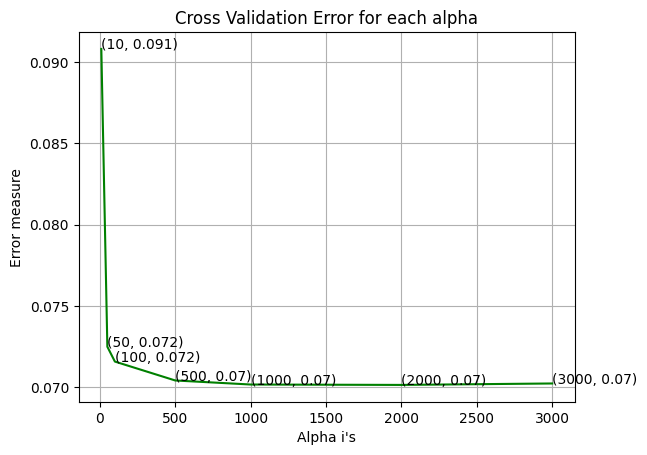

For values of best alpha =  2000 The train log loss is: 0.025958604430312924
For values of best alpha =  2000 The cross validation log loss is: 0.07015120282514706
For values of best alpha =  2000 The test log loss is: 0.07911623562206262
Number of misclassified points  1.8399264029438822
-------------------------------------------------- Confusion matrix --------------------------------------------------


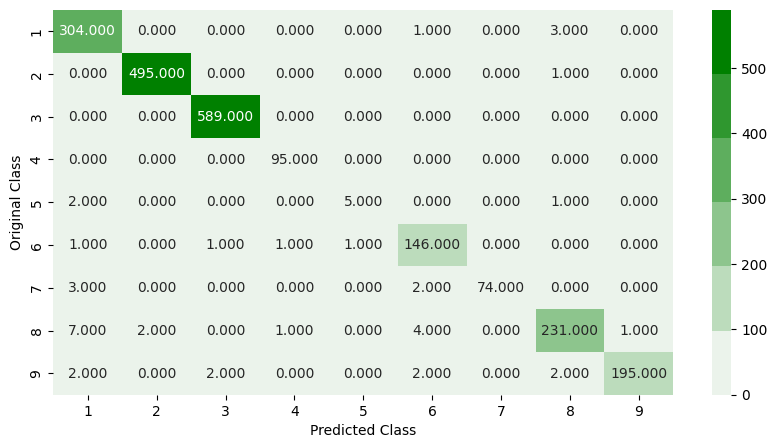

-------------------------------------------------- Precision matrix --------------------------------------------------


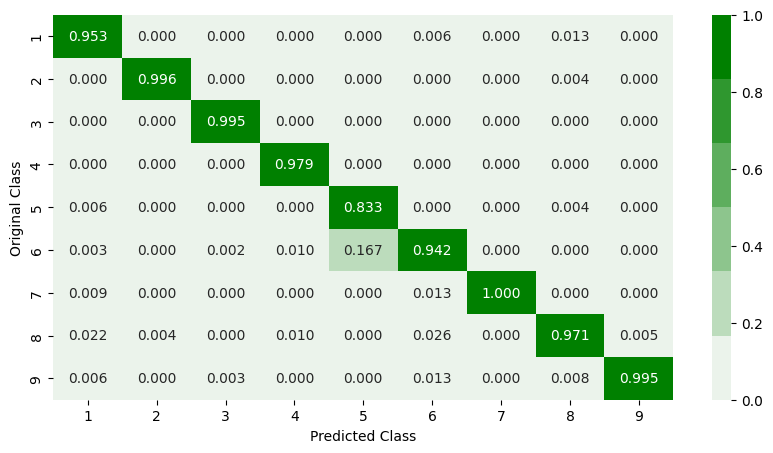

Sum of columns in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


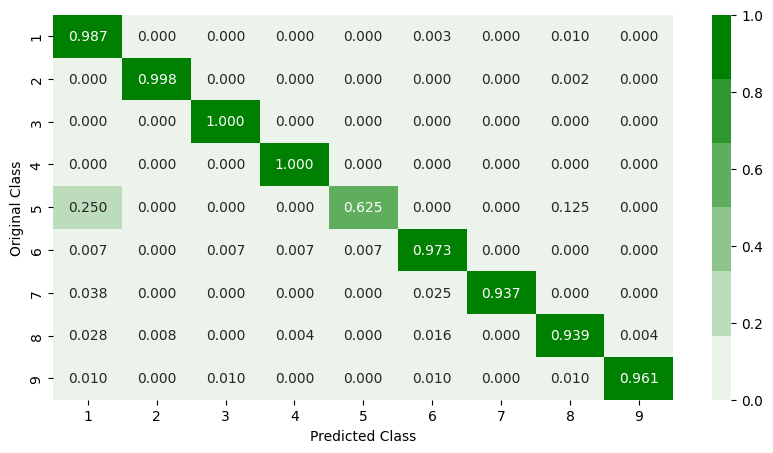

Sum of rows in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [21]:
alpha = [10, 50, 100, 500, 1000, 2000, 3000]
cv_log_error_array = []
train_log_error_array = []
for i in tqdm(alpha):
    r_cfl = RandomForestClassifier(n_estimators = i, random_state = 42, n_jobs = -1)
    r_cfl.fit(X_train, y_train)
    sig_clf = CalibratedClassifierCV(r_cfl, method = 'sigmoid', n_jobs = -1)
    sig_clf.fit(X_train, y_train)
    predict_y = sig_clf.predict_proba(X_cv)
    cv_log_error_array.append(log_loss(y_cv, predict_y, labels = r_cfl.classes_, eps = 1e-15))

for i in range(len(cv_log_error_array)):
    print ('log_loss for c = ', alpha[i], 'is', cv_log_error_array[i])


best_alpha = np.argmin(cv_log_error_array)

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array, c = 'g')
for i, txt in enumerate(np.round(cv_log_error_array, 3)):
    ax.annotate((alpha[i], np.round(txt, 3)), (alpha[i], cv_log_error_array[i]))
plt.grid()
plt.title('Cross Validation Error for each alpha')
plt.xlabel("Alpha i's")
plt.ylabel('Error measure')
plt.show()


r_cfl = RandomForestClassifier(n_estimators = alpha[best_alpha], random_state = 42, n_jobs = -1)
r_cfl.fit(X_train,y_train)
sig_clf = CalibratedClassifierCV(r_cfl, method = 'sigmoid', n_jobs = -1)
sig_clf.fit(X_train, y_train)

predict_y = sig_clf.predict_proba(X_train)
print('For values of best alpha = ', alpha[best_alpha], 'The train log loss is:', log_loss(y_train, predict_y))
predict_y = sig_clf.predict_proba(X_cv)
print('For values of best alpha = ', alpha[best_alpha], 'The cross validation log loss is:', log_loss(y_cv, predict_y))
predict_y = sig_clf.predict_proba(X_test)
print('For values of best alpha = ', alpha[best_alpha], 'The test log loss is:', log_loss(y_test, predict_y))
plot_confusion_matrix(y_test, sig_clf.predict(X_test))

<h3>4.1.5. XgBoost Classification</h3>

In [22]:
# Invalid classes inferred from unique values of `y`.  Expected: [0 1 2 3 4 5 6 7 8], got [1 2 3 4 5 6 7 8 9]
# https://stackoverflow.com/a/72132612

le = LabelEncoder()
y_train = le.fit_transform(y_train)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [16:51<00:00, 168.63s/it]

log_loss for c =  10 is 5.464918034060787
log_loss for c =  50 is 5.662292937832787
log_loss for c =  100 is 5.684216524445072
log_loss for c =  500 is 5.70429939661846
log_loss for c =  1000 is 5.703931098259704
log_loss for c =  2000 is 5.705759520797687


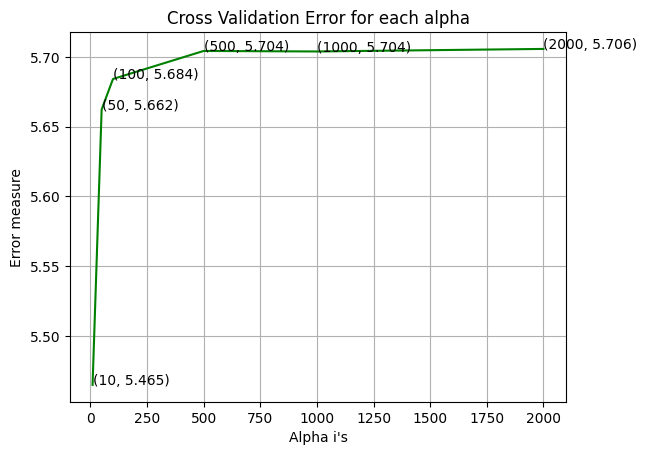

For values of best alpha =  10 The train log loss is :  0.038120462546644814
For values of best alpha =  10 The cross validation log loss is :  0.08137183097173138
For values of best alpha =  10 The test log loss is :  0.0905856695816948
Number of misclassified points  99.9540018399264
-------------------------------------------------- Confusion matrix --------------------------------------------------


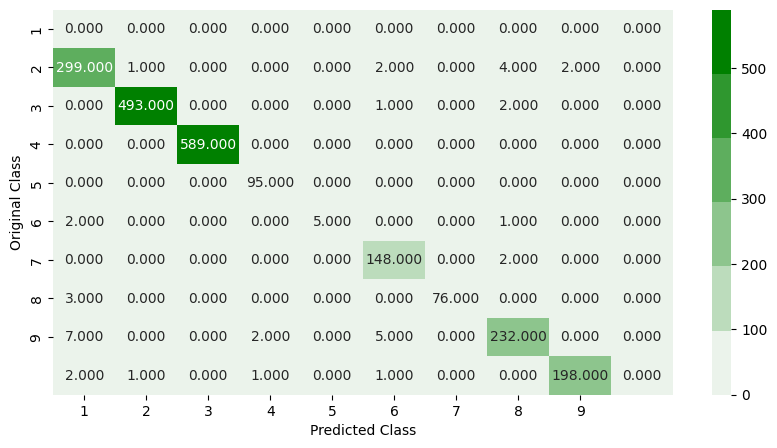

-------------------------------------------------- Precision matrix --------------------------------------------------


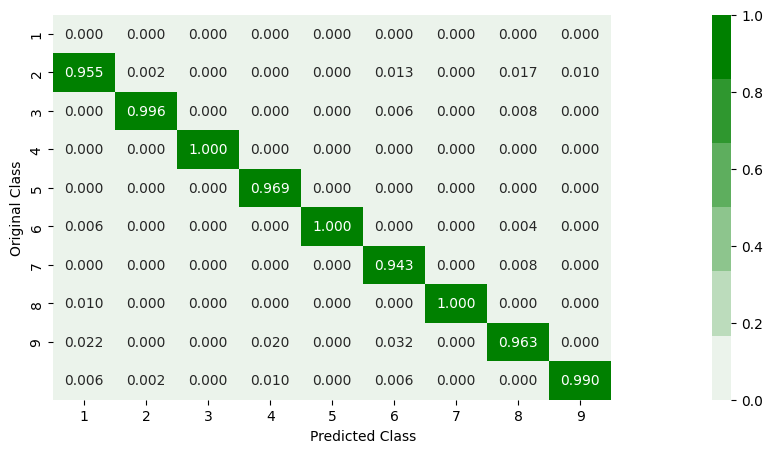

Sum of columns in precision matrix [ 1.  1.  1.  1.  1.  1.  1.  1.  1. nan]
-------------------------------------------------- Recall matrix --------------------------------------------------


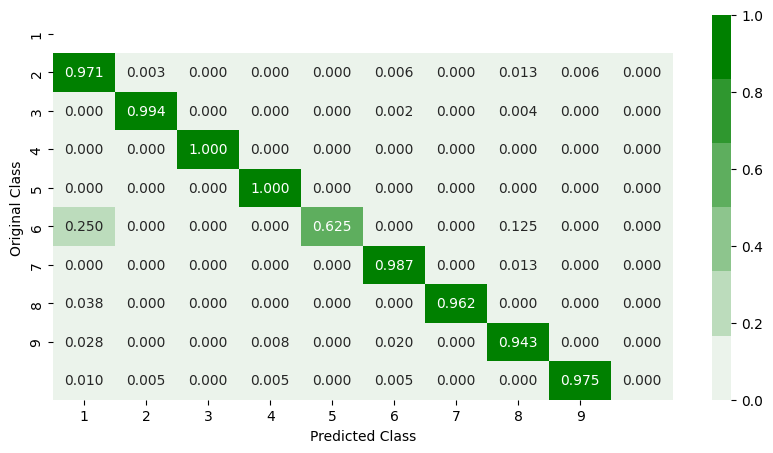

Sum of rows in precision matrix [nan  1.  1.  1.  1.  1.  1.  1.  1.  1.]


In [23]:
# Training a hyper-parameter tuned Xg-Boost regressor on our train data

# http://xgboost.readthedocs.io/en/latest/python/python_api.html?#xgboost.XGBClassifier

alpha = [10, 50, 100, 500, 1000, 2000]
cv_log_error_array = []
for i in tqdm(alpha):
    x_cfl=XGBClassifier(n_estimators = i, nthread = -1)
    x_cfl.fit(X_train,y_train)
    sig_clf = CalibratedClassifierCV(x_cfl, method = 'sigmoid', n_jobs = -1)
    sig_clf.fit(X_train, y_train)
    predict_y = sig_clf.predict_proba(X_cv)
    cv_log_error_array.append(log_loss(y_cv, predict_y, labels = x_cfl.classes_, eps = 1e-15))

for i in range(len(cv_log_error_array)):
    print ('log_loss for c = ', alpha[i], 'is', cv_log_error_array[i])


best_alpha = np.argmin(cv_log_error_array)

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array, c = 'g')
for i, txt in enumerate(np.round(cv_log_error_array, 3)):
    ax.annotate((alpha[i], np.round(txt, 3)), (alpha[i], cv_log_error_array[i]))
plt.grid()
plt.title('Cross Validation Error for each alpha')
plt.xlabel("Alpha i's")
plt.ylabel('Error measure')
plt.show()

x_cfl = XGBClassifier(n_estimators = alpha[best_alpha], nthread = -1)
x_cfl.fit(X_train,y_train)
sig_clf = CalibratedClassifierCV(x_cfl, method = 'sigmoid', n_jobs = -1)
sig_clf.fit(X_train, y_train)
    
predict_y = sig_clf.predict_proba(X_train)
print ('For values of best alpha = ', alpha[best_alpha], 'The train log loss is : ',log_loss(y_train, predict_y))
predict_y = sig_clf.predict_proba(X_cv)
print('For values of best alpha = ', alpha[best_alpha], 'The cross validation log loss is : ',log_loss(y_cv, predict_y))
predict_y = sig_clf.predict_proba(X_test)
print('For values of best alpha = ', alpha[best_alpha], 'The test log loss is : ',log_loss(y_test, predict_y))
plot_confusion_matrix(y_test, sig_clf.predict(X_test))

<h3>4.1.5. XgBoost Classification with best hyper parameters using RandomSearch </h3>

In [24]:
# https://www.analyticsvidhya.com/blog/2016/03/complete-guide-parameter-tuning-xgboost-with-codes-python/

x_cfl = XGBClassifier(nthread = -1)
prams = {
        'learning_rate' : [0.01,0.03,0.05,0.1,0.15,0.2],
        'n_estimators' : [100,200,500,1000,2000],
        'max_depth' : [3,5,10],
        'colsample_bytree' : [0.1,0.3,0.5,1],
        'subsample' : [0.1,0.3,0.5,1]
        }
random_cfl1 = RandomizedSearchCV(x_cfl, param_distributions = prams, verbose = 10, n_jobs = -1,)
random_cfl1.fit(X_train, y_train)

print(random_cfl1.best_params_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 3/5; 1/10] START colsample_bytree=0.5, learning_rate=0.2, max_depth=10, n_estimators=100, subsample=1
[CV 3/5; 1/10] END colsample_bytree=0.5, learning_rate=0.2, max_depth=10, n_estimators=100, subsample=1;, score=0.988 total time= 1.1min
[CV 5/5; 4/10] START colsample_bytree=0.5, learning_rate=0.03, max_depth=5, n_estimators=200, subsample=0.3
[CV 5/5; 4/10] END colsample_bytree=0.5, learning_rate=0.03, max_depth=5, n_estimators=200, subsample=0.3;, score=0.983 total time= 1.7min
[CV 1/5; 7/10] START colsample_bytree=0.1, learning_rate=0.01, max_depth=10, n_estimators=1000, subsample=0.3
[CV 1/5; 7/10] END colsample_bytree=0.1, learning_rate=0.01, max_depth=10, n_estimators=1000, subsample=0.3;, score=0.984 total time= 2.1min
[CV 3/5; 10/10] START colsample_bytree=0.1, learning_rate=0.15, max_depth=5, n_estimators=500, subsample=0.5
[CV 3/5; 10/10] END colsample_bytree=0.1, learning_rate=0.15, max_depth=5, n_estimators=5

In [25]:
# Training a hyper-parameter tuned Xg-Boost regressor on our train data

# http://xgboost.readthedocs.io/en/latest/python/python_api.html?#xgboost.XGBClassifier

n_est =random_cfl1.best_params_.get('n_estimators')
lrs_ = random_cfl1.best_params_.get('learning_rate')
bytree_ = random_cfl1.best_params_.get('colsample_bytree')
depth_ = random_cfl1.best_params_.get('max_depth')

x_cfl=XGBClassifier(n_estimators = n_est, learning_rate = lrs_, colsample_bytree = bytree_, max_depth = depth_, nthread = -1)
x_cfl.fit(X_train, y_train)
c_cfl = CalibratedClassifierCV(x_cfl, method = 'sigmoid', n_jobs = -1)
c_cfl.fit(X_train, y_train)

predict_y = c_cfl.predict_proba(X_train)
print ('train loss',log_loss(y_train, predict_y))
predict_y = c_cfl.predict_proba(X_cv)
print ('cv loss',log_loss(y_cv, predict_y))
predict_y = c_cfl.predict_proba(X_test)
print ('test loss',log_loss(y_test, predict_y))

train loss 0.022338045081502278
cv loss 0.059847679600844424
test loss 0.07266144314681561


<h2> 4.2 Modeling with .asm files </h2>

<pre>
There are 10868 files of asm 
All the files make up about 150 GB
The asm files contains :
1. Address
2. Segments
3. Opcodes
4. Registers
5. function calls
6. APIs
With the help of parallel processing we extracted all the features.In parallel we can use all the cores that are present in our computer.


Here we extracted 52 features from all the asm files which are important.

We read the top solutions and handpicked the features from those papers/videos/blogs. <br> Refer:https://www.kaggle.com/c/malware-classification/discussion
</pre>

<h3> 4.2.1 Feature extraction from asm files </h3>

<p>
<li> To extract the unigram features from the .asm files we need to process ~150GB of data </li>
<li style="font-size:18px"><b>Note: Below two cells will take lot of time (over 48 hours to complete)</b></li>
<li> We will provide you the output file of these two cells, which you can directly use it </li>
</p>

In [ ]:
# intially create five folders
# first 
# second
# third
# fourth
# fifth
# this code tells us about random split of files into five folders

folder_1 = '/media/jishnu/2CC01383C0135286/MicroSoft/first'
folder_2 = '/media/jishnu/2CC01383C0135286/MicroSoft/second'
folder_3 = '/media/jishnu/2CC01383C0135286/MicroSoft/third'
folder_4 = '/media/jishnu/2CC01383C0135286/MicroSoft/fourth'
folder_5 = '/media/jishnu/2CC01383C0135286/MicroSoft/fifth'
folder_6 =  '/media/jishnu/2CC01383C0135286/MicroSoft/output'

for i in [folder_1, folder_2, folder_3, folder_4, folder_5, folder_6]:
    if not os.path.isdir(i):
        os.makedirs(i)

source = '/media/jishnu/2CC01383C0135286/MicroSoft/train/'
files = os.listdir('/media/jishnu/2CC01383C0135286/MicroSoft/train')
# ID = df['Id'].tolist()
data = range(0, 10868)
r.shuffle(data)
count = 0
for i in range(0, 10868):
    if i % 5 == 0:
        shutil.move(source+files[data[i]], '/media/jishnu/2CC01383C0135286/MicroSoft/first')
    elif i%5 == 1:
        shutil.move(source+files[data[i]], '/media/jishnu/2CC01383C0135286/MicroSoft/second')
    elif i%5  == 2:
        shutil.move(source+files[data[i]], '/media/jishnu/2CC01383C0135286/MicroSoft/third')
    elif i%5  == 3:
        shutil.move(source+files[data[i]], '/media/jishnu/2CC01383C0135286/MicroSoft/fourth')
    elif i%5 == 4:
        shutil.move(source+files[data[i]], '/media/jishnu/2CC01383C0135286/MicroSoft/fifth')

In [ ]:
# http://flint.cs.yale.edu/cs421/papers/x86-asm/asm.html

def firstprocess():
    #The prefixes tells about the segments that are present in the asm files
    #There are 450 segments(approx) present in all asm files.
    #this prefixes are best segments that gives us best values.
    #https://en.wikipedia.org/wiki/Data_segment
    
    prefixes = ['HEADER:', '.text:', '.Pav:', '.idata:', '.data:', '.bss:', '.rdata:', '.edata:', '.rsrc:', '.tls:', '.reloc:', '.BSS:', '.CODE']
    #this are opcodes that are used to get best results
    #https://en.wikipedia.org/wiki/X86_instruction_listings
    
    opcodes = ['jmp', 'mov', 'retf', 'push', 'pop', 'xor', 'retn', 'nop', 'sub', 'inc', 'dec', 'add','imul', 'xchg', 'or', 'shr', 'cmp', 'call', 'shl', 'ror', 'rol', 'jnb','jz','rtn','lea','movzx']
    #best keywords that are taken from different blogs
    keywords = ['.dll','std::',':dword']
    #Below taken registers are general purpose registers and special registers
    #All the registers which are taken are best 
    registers = ['edx','esi','eax','ebx','ecx','edi','ebp','esp','eip']
    file1 = open('/media/jishnu/2CC01383C0135286/MicroSoft/output/asmsmallfile.txt', 'w+')
    files = os.listdir('/media/jishnu/2CC01383C0135286/MicroSoft/first')
    for f in files:
        #filling the values with zeros into the arrays
        prefixescount = np.zeros(len(prefixes), dtype = int)
        opcodescount = np.zeros(len(opcodes), dtype = int)
        keywordcount = np.zeros(len(keywords), dtype = int)
        registerscount = np.zeros(len(registers), dtype = int)
        features = []
        f2 = f.split('.')[0]
        file1.write(f2 + ',')
        opcodefile.write(f2 + ' ')
        # https://docs.python.org/3/library/codecs.html#codecs.ignore_errors
        # https://docs.python.org/3/library/codecs.html#codecs.Codec.encode
        with codecs.open('/media/jishnu/2CC01383C0135286/MicroSoft/first/' + f, encoding = 'cp1252', errors = 'replace') as fli:
            for lines in fli:
                # https://www.tutorialspoint.com/python3/string_rstrip.htm
                line = lines.rstrip().split()
                l = line[0]
                #counting the prefixs in each and every line
                for i in range(len(prefixes)):
                    if prefixes[i] in line[0]:
                        prefixescount[i] += 1
                line = line[1:]
                #counting the opcodes in each and every line
                for i in range(len(opcodes)):
                    if any(opcodes[i] == li for li in line):
                        features.append(opcodes[i])
                        opcodescount[i] += 1
                #counting registers in the line
                for i in range(len(registers)):
                    for li in line:
                        # we will use registers only in 'text' and 'CODE' segments
                        if registers[i] in li and ('text' in l or 'CODE' in l):
                            registerscount[i] += 1
                #counting keywords in the line
                for i in range(len(keywords)):
                    for li in line:
                        if keywords[i] in li:
                            keywordcount[i] += 1
        #pushing the values into the file after reading whole file
        for prefix in prefixescount:
            file1.write(str(prefix) + ',')
        for opcode in opcodescount:
            file1.write(str(opcode) + ',')
        for register in registerscount:
            file1.write(str(register) + ',')
        for key in keywordcount:
            file1.write(str(key) + ',')
        file1.write('\n')
    file1.close()


#same as above 
def secondprocess():
    prefixes = ['HEADER:', '.text:', '.Pav:', '.idata:', '.data:', '.bss:', '.rdata:', '.edata:', '.rsrc:', '.tls:', '.reloc:', '.BSS:', '.CODE']
    opcodes = ['jmp', 'mov', 'retf', 'push', 'pop', 'xor', 'retn', 'nop', 'sub', 'inc', 'dec', 'add','imul', 'xchg', 'or', 'shr', 'cmp', 'call', 'shl', 'ror', 'rol', 'jnb','jz','rtn','lea','movzx']
    keywords = ['.dll', 'std::', ':dword']
    registers = ['edx', 'esi', 'eax', 'ebx', 'ecx', 'edi', 'ebp', 'esp', 'eip']
    file1 = open('/media/jishnu/2CC01383C0135286/MicroSoft/output/mediumasmfile.txt', 'w+')
    files = os.listdir('/media/jishnu/2CC01383C0135286/MicroSoft/second')
    for f in files:
        prefixescount = np.zeros(len(prefixes), dtype = int)
        opcodescount = np.zeros(len(opcodes), dtype = int)
        keywordcount = np.zeros(len(keywords), dtype = int)
        registerscount = np.zeros(len(registers), dtype = int)
        features = []
        f2=f.split('.')[0]
        file1.write(f2 + ',')
        opcodefile.write(f2 + ' ')
        with codecs.open('/media/jishnu/2CC01383C0135286/MicroSoft/second/' + f, encoding = 'cp1252', errors ='replace') as fli:
            for lines in fli:
                line = lines.rstrip().split()
                l = line[0]
                for i in range(len(prefixes)):
                    if prefixes[i] in line[0]:
                        prefixescount[i] += 1
                line=line[1:]
                for i in range(len(opcodes)):
                    if any(opcodes[i] == li for li in line):
                        features.append(opcodes[i])
                        opcodescount[i] += 1
                for i in range(len(registers)):
                    for li in line:
                        if registers[i] in li and ('text' in l or 'CODE' in l):
                            registerscount[i] += 1
                for i in range(len(keywords)):
                    for li in line:
                        if keywords[i] in li:
                            keywordcount[i] += 1
        for prefix in prefixescount:
            file1.write(str(prefix) + ',')
        for opcode in opcodescount:
            file1.write(str(opcode) + ',')
        for register in registerscount:
            file1.write(str(register) + ',')
        for key in keywordcount:
            file1.write(str(key) + ',')
        file1.write('\n')
    file1.close()

# same as smallprocess() functions
def thirdprocess():
    prefixes = ['HEADER:','.text:','.Pav:','.idata:','.data:','.bss:','.rdata:','.edata:','.rsrc:','.tls:','.reloc:','.BSS:','.CODE']
    opcodes = ['jmp', 'mov', 'retf', 'push', 'pop', 'xor', 'retn', 'nop', 'sub', 'inc', 'dec', 'add','imul', 'xchg', 'or', 'shr', 'cmp', 'call', 'shl', 'ror', 'rol', 'jnb','jz','rtn','lea','movzx']
    keywords = ['.dll','std::',':dword']
    registers = ['edx','esi','eax','ebx','ecx','edi','ebp','esp','eip']
    file1 = open('/media/jishnu/2CC01383C0135286/MicroSoft/output/largeasmfile.txt', 'w+')
    files = os.listdir('/media/jishnu/2CC01383C0135286/MicroSoft/third')
    for f in files:
        prefixescount = np.zeros(len(prefixes), dtype = int)
        opcodescount = np.zeros(len(opcodes), dtype = int)
        keywordcount = np.zeros(len(keywords), dtype = int)
        registerscount = np.zeros(len(registers), dtype = int)
        features = []
        f2 = f.split('.')[0]
        file1.write(f2 + ',')
        opcodefile.write(f2 + ' ')
        with codecs.open('/media/jishnu/2CC01383C0135286/MicroSoft/third/' + f, encoding = 'cp1252', errors = 'replace') as fli:
            for lines in fli:
                line = lines.rstrip().split()
                l = line[0]
                for i in range(len(prefixes)):
                    if prefixes[i] in line[0]:
                        prefixescount[i] += 1
                line=line[1:]
                for i in range(len(opcodes)):
                    if any(opcodes[i]==li for li in line):
                        features.append(opcodes[i])
                        opcodescount[i] += 1
                for i in range(len(registers)):
                    for li in line:
                        if registers[i] in li and ('text' in l or 'CODE' in l):
                            registerscount[i] += 1
                for i in range(len(keywords)):
                    for li in line:
                        if keywords[i] in li:
                            keywordcount[i] += 1
        for prefix in prefixescount:
            file1.write(str(prefix) + ',')
        for opcode in opcodescount:
            file1.write(str(opcode) + ',')
        for register in registerscount:
            file1.write(str(register) + ',')
        for key in keywordcount:
            file1.write(str(key) + ',')
        file1.write('\n')
    file1.close()


def fourthprocess():
    prefixes = ['HEADER:','.text:','.Pav:','.idata:','.data:','.bss:','.rdata:','.edata:','.rsrc:','.tls:','.reloc:','.BSS:','.CODE']
    opcodes = ['jmp', 'mov', 'retf', 'push', 'pop', 'xor', 'retn', 'nop', 'sub', 'inc', 'dec', 'add','imul', 'xchg', 'or', 'shr', 'cmp', 'call', 'shl', 'ror', 'rol', 'jnb','jz','rtn','lea','movzx']
    keywords = ['.dll','std::',':dword']
    registers = ['edx','esi','eax','ebx','ecx','edi','ebp','esp','eip']
    file1 = open('/media/jishnu/2CC01383C0135286/MicroSoft/output/hugeasmfile.txt', 'w+')
    files = os.listdir('/media/jishnu/2CC01383C0135286/MicroSoft/fourth/')
    for f in files:
        prefixescount = np.zeros(len(prefixes), dtype = int)
        opcodescount = np.zeros(len(opcodes), dtype = int)
        keywordcount = np.zeros(len(keywords), dtype = int)
        registerscount = np.zeros(len(registers), dtype = int)
        features = []
        f2 = f.split('.')[0]
        file1.write(f2 + ',')
        opcodefile.write(f2 + ' ')
        with codecs.open('/media/jishnu/2CC01383C0135286/MicroSoft/fourth/' + f, encoding = 'cp1252', errors = 'replace') as fli:
            for lines in fli:
                line = lines.rstrip().split()
                l = line[0]
                for i in range(len(prefixes)):
                    if prefixes[i] in line[0]:
                        prefixescount[i] += 1
                line = line[1:]
                for i in range(len(opcodes)):
                    if any(opcodes[i] == li for li in line):
                        features.append(opcodes[i])
                        opcodescount[i] += 1
                for i in range(len(registers)):
                    for li in line:
                        if registers[i] in li and ('text' in l or 'CODE' in l):
                            registerscount[i] += 1
                for i in range(len(keywords)):
                    for li in line:
                        if keywords[i] in li:
                            keywordcount[i] += 1
        for prefix in prefixescount:
            file1.write(str(prefix) + ',')
        for opcode in opcodescount:
            file1.write(str(opcode) + ',')
        for register in registerscount:
            file1.write(str(register) + ',')
        for key in keywordcount:
            file1.write(str(key) + ',')
        file1.write('\n')
    file1.close()


def fifthprocess():
    prefixes = ['HEADER:','.text:','.Pav:','.idata:','.data:','.bss:','.rdata:','.edata:','.rsrc:','.tls:','.reloc:','.BSS:','.CODE']
    opcodes = ['jmp', 'mov', 'retf', 'push', 'pop', 'xor', 'retn', 'nop', 'sub', 'inc', 'dec', 'add','imul', 'xchg', 'or', 'shr', 'cmp', 'call', 'shl', 'ror', 'rol', 'jnb','jz','rtn','lea','movzx']
    keywords = ['.dll','std::',':dword']
    registers = ['edx','esi','eax','ebx','ecx','edi','ebp','esp','eip']
    file1 = open('/media/jishnu/2CC01383C0135286/MicroSoft/output/trainasmfile.txt', 'w+')
    files = os.listdir('/media/jishnu/2CC01383C0135286/MicroSoft/fifth/')
    for f in files:
        prefixescount = np.zeros(len(prefixes), dtype = int)
        opcodescount = np.zeros(len(opcodes), dtype = int)
        keywordcount = np.zeros(len(keywords), dtype = int)
        registerscount = np.zeros(len(registers), dtype = int)
        features = []
        f2 = f.split('.')[0]
        file1.write(f2 + ',')
        opcodefile.write(f2 + ' ')
        with codecs.open('/media/jishnu/2CC01383C0135286/MicroSoft/fifth/' + f, encoding = 'cp1252', errors = 'replace') as fli:
            for lines in fli:
                line = lines.rstrip().split()
                l = line[0]
                for i in range(len(prefixes)):
                    if prefixes[i] in line[0]:
                        prefixescount[i] += 1
                line = line[1:]
                for i in range(len(opcodes)):
                    if any(opcodes[i] == li for li in line):
                        features.append(opcodes[i])
                        opcodescount[i] += 1
                for i in range(len(registers)):
                    for li in line:
                        if registers[i] in li and ('text' in l or 'CODE' in l):
                            registerscount[i] += 1
                for i in range(len(keywords)):
                    for li in line:
                        if keywords[i] in li:
                            keywordcount[i] += 1
        for prefix in prefixescount:
            file1.write(str(prefix) + ',')
        for opcode in opcodescount:
            file1.write(str(opcode) + ',')
        for register in registerscount:
            file1.write(str(register) + ',')
        for key in keywordcount:
            file1.write(str(key) + ',')
        file1.write('\n')
    file1.close()


def main():
    #the below code is used for multiprogramming
    #the number of process depends upon the number of cores present System
    #process is used to call multiprogramming
    manager = multiprocessing.Manager()
    p1 = Process(target = firstprocess)
    p2 = Process(target = secondprocess)
    p3 = Process(target = thirdprocess)
    p4 = Process(target = fourthprocess)
    p5 = Process(target = fifthprocess)
    #p1.start() is used to start the thread execution
    p1.start()
    p2.start()
    p3.start()
    p4.start()
    p5.start()
    #After completion all the threads are joined
    p1.join()
    p2.join()
    p3.join()
    p4.join()
    p5.join()

if __name__=="__main__":
    main()

In [26]:
# asmoutputfile.csv(output genarated from the above two cells) will contain all the extracted features from .asm files
# this file will be uploaded in the drive, you can directly use this

dfasm = pd.read_csv('asmoutputfile.csv')
Y.columns = ['ID', 'Class']
result_asm = pd.merge(dfasm, Y, on = 'ID', how = 'left')
result_asm.head()

ID  HEADER:  .text:  .Pav:  .idata:  .data:  .bss:  \
0  01kcPWA9K2BOxQeS5Rju       19     744      0      127      57      0   
1  1E93CpP60RHFNiT5Qfvn       17     838      0      103      49      0   
2  3ekVow2ajZHbTnBcsDfX       17     427      0       50      43      0   
3  3X2nY7iQaPBIWDrAZqJe       17     227      0       43      19      0   
4  46OZzdsSKDCFV8h7XWxf       17     402      0       59     170      0   

   .rdata:  .edata:  .rsrc:  ...  edx  esi  eax  ebx  ecx  edi  ebp  esp  eip  \
0      323        0       3  ...   18   66   15   43   83    0   17   48   29   
1        0        0       3  ...   18   29   48   82   12    0   14    0   20   
2      145        0       3  ...   13   42   10   67   14    0   11    0    9   
3        0        0       3  ...    6    8   14    7    2    0    8    0    6   
4        0        0       3  ...   12    9   18   29    5    0   11    0   11   

   Class  
0      1  
1      1  
2      1  
3      1  
4      1  

[5 rows x 53 columns]

<h4> 4.2.1.1 Files sizes of each .asm file </h4>

In [27]:
#file sizes of byte files

files = os.listdir('/media/jishnu/2CC01383C0135286/MicroSoft/asmFiles')
filenames = Y['ID'].tolist()
class_y = Y['Class'].tolist()
class_bytes = []
sizebytes = []
fnames = []
for file in files:
    # print(os.stat('byteFiles/0A32eTdBKayjCWhZqDOQ.txt'))
    # os.stat_result(st_mode=33206, st_ino=1125899906874507, st_dev=3561571700, st_nlink=1, st_uid=0, st_gid=0, 
    # st_size=3680109, st_atime=1519638522, st_mtime=1519638522, st_ctime=1519638522)
    # read more about os.stat: here https://www.tutorialspoint.com/python/os_stat.htm
    statinfo = os.stat('/media/jishnu/2CC01383C0135286/MicroSoft/asmFiles/' + file)
    # split the file name at '.' and take the first part of it i.e the file name
    file = file.split('.')[0]
    if any(file == filename for filename in filenames):
        i=filenames.index(file)
        class_bytes.append(class_y[i])
        # converting into Mb's
        sizebytes.append(statinfo.st_size/(1024.0*1024.0))
        fnames.append(file)
asm_size_byte=pd.DataFrame({'ID' : fnames, 'size' : sizebytes, 'Class' : class_bytes})
print (asm_size_byte.head())

                     ID       size  Class
0  01azqd4InC7m9JpocGv5  56.229886      9
1  01IsoiSMh5gxyDYTl4CB  13.999378      2
2  01jsnpXSAlgw6aPeDxrU   8.507785      9
3  01kcPWA9K2BOxQeS5Rju   0.078190      1
4  01SuzwMJEIXsK7A8dQbl   0.996723      8


<h4> 4.2.1.2 Distribution of .asm file sizes</h4>

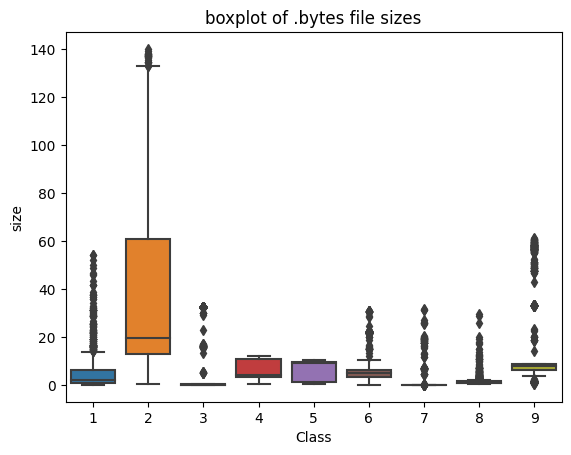

In [28]:
#boxplot of asm files
ax = sns.boxplot(x = 'Class', y = 'size', data = asm_size_byte)
plt.title('boxplot of .bytes file sizes')
plt.show()

In [29]:
# add the file size feature to previous extracted features
print(result_asm.shape)
print(asm_size_byte.shape)
result_asm = pd.merge(result_asm, asm_size_byte.drop(['Class'], axis = 1), on = 'ID', how = 'left')
result_asm.head()

(10868, 53)
(10868, 3)


ID  HEADER:  .text:  .Pav:  .idata:  .data:  .bss:  \
0  01kcPWA9K2BOxQeS5Rju       19     744      0      127      57      0   
1  1E93CpP60RHFNiT5Qfvn       17     838      0      103      49      0   
2  3ekVow2ajZHbTnBcsDfX       17     427      0       50      43      0   
3  3X2nY7iQaPBIWDrAZqJe       17     227      0       43      19      0   
4  46OZzdsSKDCFV8h7XWxf       17     402      0       59     170      0   

   .rdata:  .edata:  .rsrc:  ...  esi  eax  ebx  ecx  edi  ebp  esp  eip  \
0      323        0       3  ...   66   15   43   83    0   17   48   29   
1        0        0       3  ...   29   48   82   12    0   14    0   20   
2      145        0       3  ...   42   10   67   14    0   11    0    9   
3        0        0       3  ...    8   14    7    2    0    8    0    6   
4        0        0       3  ...    9   18   29    5    0   11    0   11   

   Class      size  
0      1  0.078190  
1      1  0.063400  
2      1  0.041695  
3      1  0.018757  
4      1  0.037567  

[5 rows x 54 columns]

In [30]:
# we normalize the data each column 
result_asm = normalize(result_asm)
result_asm.head()

ID   HEADER:    .text:  .Pav:   .idata:    .data:  .bss:  \
0  01kcPWA9K2BOxQeS5Rju  0.107345  0.001092    0.0  0.000761  0.000023    0.0   
1  1E93CpP60RHFNiT5Qfvn  0.096045  0.001230    0.0  0.000617  0.000019    0.0   
2  3ekVow2ajZHbTnBcsDfX  0.096045  0.000627    0.0  0.000300  0.000017    0.0   
3  3X2nY7iQaPBIWDrAZqJe  0.096045  0.000333    0.0  0.000258  0.000008    0.0   
4  46OZzdsSKDCFV8h7XWxf  0.096045  0.000590    0.0  0.000353  0.000068    0.0   

    .rdata:  .edata:    .rsrc:  ...       esi       eax       ebx       ecx  \
0  0.000084      0.0  0.000072  ...  0.000746  0.000301  0.000360  0.001057   
1  0.000000      0.0  0.000072  ...  0.000328  0.000965  0.000686  0.000153   
2  0.000038      0.0  0.000072  ...  0.000475  0.000201  0.000560  0.000178   
3  0.000000      0.0  0.000072  ...  0.000090  0.000281  0.000059  0.000025   
4  0.000000      0.0  0.000072  ...  0.000102  0.000362  0.000243  0.000064   

   edi       ebp       esp       eip  Class      size  
0  0.0  0.030797  0.001468  0.003173      1  0.000432  
1  0.0  0.025362  0.000000  0.002188      1  0.000327  
2  0.0  0.019928  0.000000  0.000985      1  0.000172  
3  0.0  0.014493  0.000000  0.000657      1  0.000009  
4  0.0  0.019928  0.000000  0.001204      1  0.000143  

[5 rows x 54 columns]

<h3> 4.2.2 Univariate analysis on  asm file features</h3>

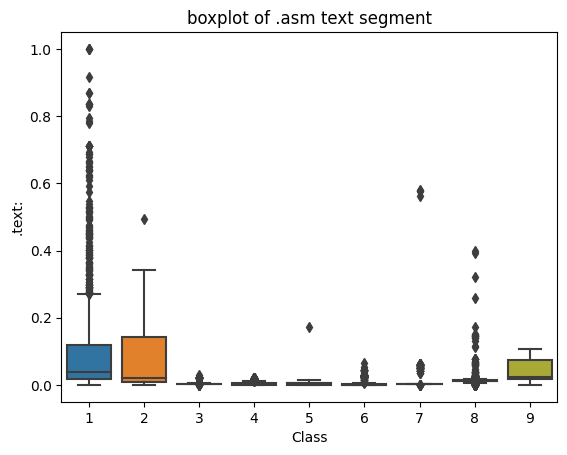

In [31]:
ax = sns.boxplot(x = 'Class', y = '.text:', data = result_asm)
plt.title('boxplot of .asm text segment')
plt.show()

<pre>
The plot is between Text and class 
Class 1,2 and 9 can be easly separated
</pre>

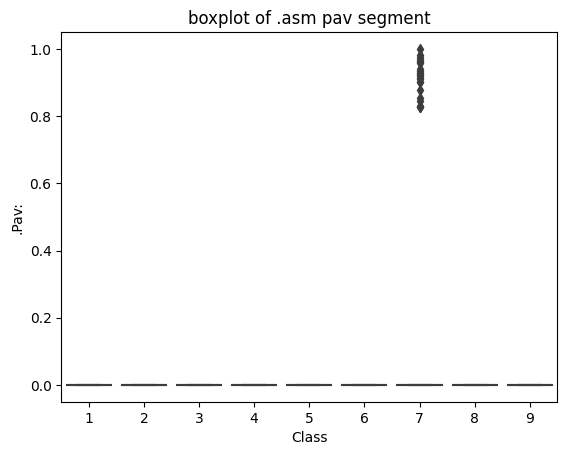

In [32]:
ax = sns.boxplot(x = 'Class', y = '.Pav:', data = result_asm)
plt.title('boxplot of .asm pav segment')
plt.show()

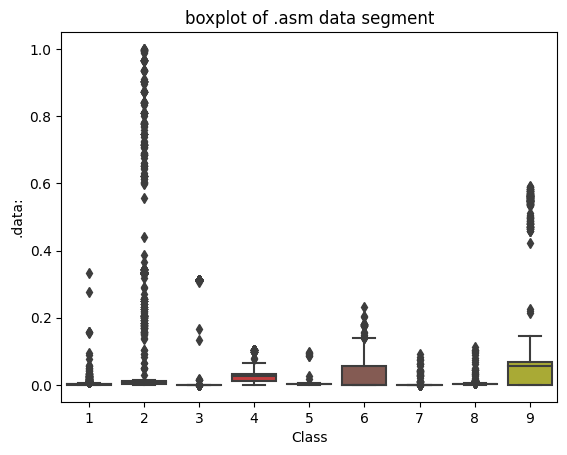

In [33]:
ax = sns.boxplot(x = 'Class', y = '.data:', data = result_asm)
plt.title('boxplot of .asm data segment')
plt.show()

<pre>
The plot is between data segment and class label 
class 6 and class 9 can be easily separated from given points
</pre>

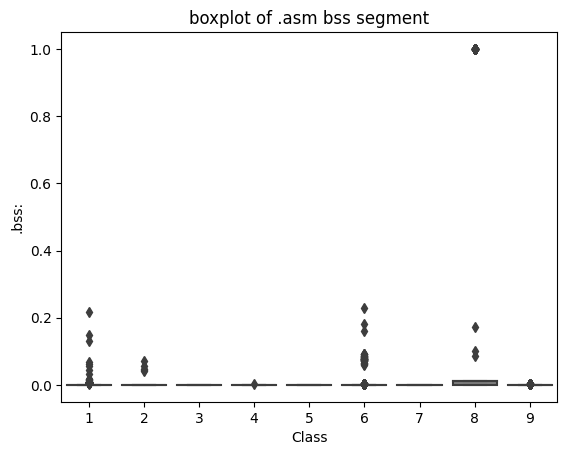

In [34]:
ax = sns.boxplot(x = 'Class', y = '.bss:', data = result_asm)
plt.title('boxplot of .asm bss segment')
plt.show()

<pre>
plot between bss segment and class label
very less number of files are having bss segment
</pre>

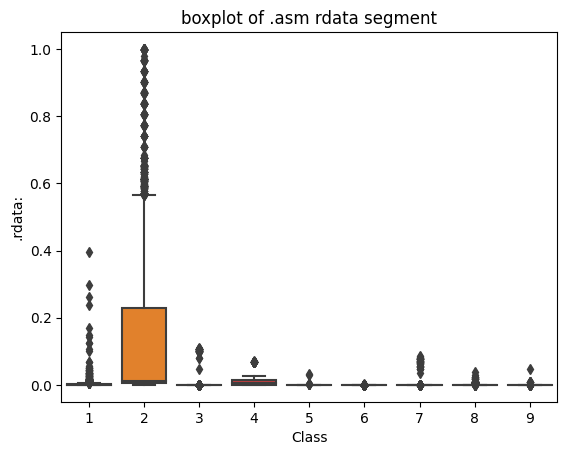

In [35]:
ax = sns.boxplot(x = 'Class', y = '.rdata:', data = result_asm)
plt.title('boxplot of .asm rdata segment')
plt.show()

<pre>
Plot between rdata segment and Class segment
Class 2 can be easily separated 75 pecentile files are having 1M rdata lines
</pre>

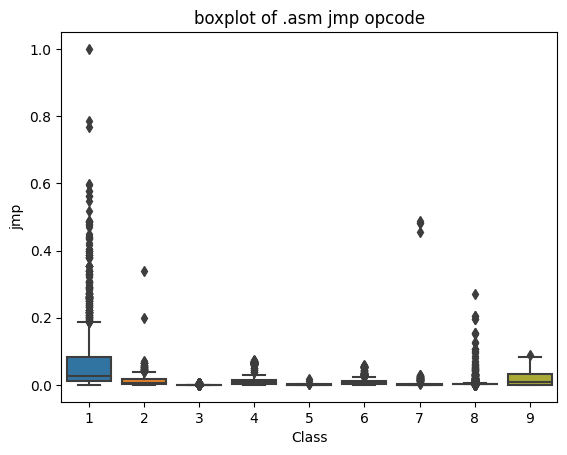

In [36]:
ax = sns.boxplot(x = 'Class', y = 'jmp', data = result_asm)
plt.title('boxplot of .asm jmp opcode')
plt.show()

<pre>
plot between jmp and Class label
Class 1 is having frequency of 2000 approx in 75 perentile of files
</pre>

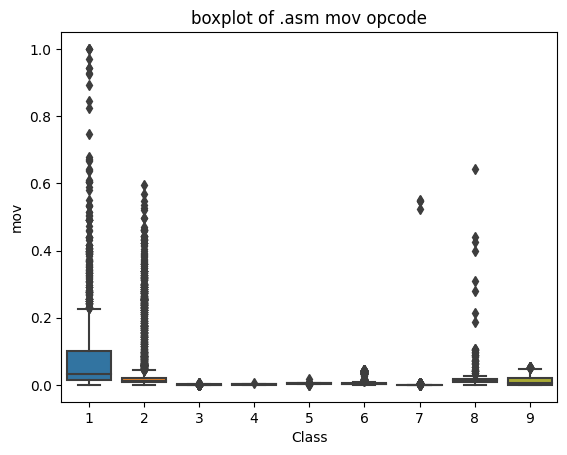

In [37]:
ax = sns.boxplot(x = 'Class', y = 'mov', data = result_asm)
plt.title('boxplot of .asm mov opcode')
plt.show()

<pre>
plot between Class label and mov opcode
Class 1 is having frequency of 2000 approx in 75 perentile of files
</pre>

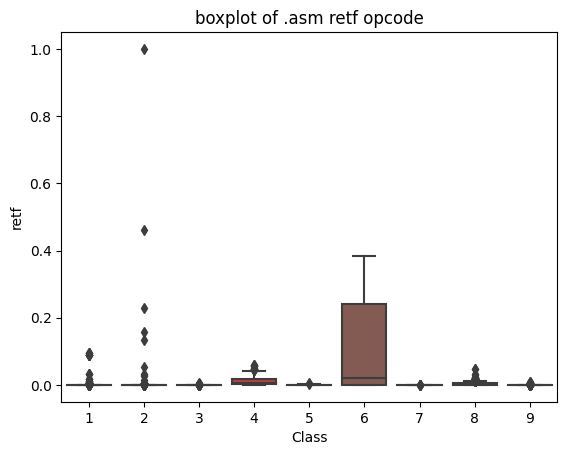

In [38]:
ax = sns.boxplot(x = 'Class', y = 'retf', data = result_asm)
plt.title('boxplot of .asm retf opcode')
plt.show()

<pre>
plot between Class label and retf
Class 6 can be easily separated with opcode retf
The frequency of retf is approx of 250.
</pre>

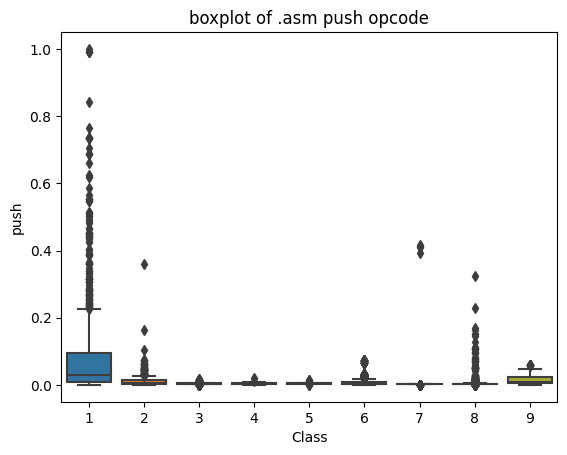

In [39]:
ax = sns.boxplot(x = 'Class', y = 'push', data = result_asm)
plt.title('boxplot of .asm push opcode')
plt.show()

<pre>
plot between push opcode and Class label
Class 1 is having 75 precentile files with push opcodes of frequency 1000
</pre>

<h3> 4.2.2 Multivariate Analysis on .asm file features </h3>

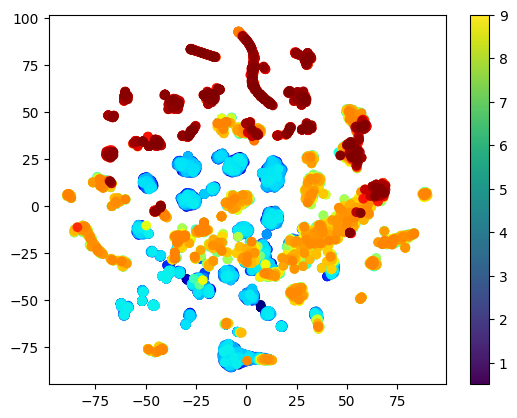

In [40]:
# https://gist.github.com/jdbcode/33d37999f950a36b43e058d15280b536

# multivariate analysis on byte files, with perplexity 50

xmap = plt.get_cmap('jet', len(data_y)-1)
colors = [matplotlib.colors.rgb2hex(xmap(i)[:3]) for i in range(xmap.N)]

cmap = plt.cm.get_cmap('jet', 9)

xtsne = TSNE(perplexity = 50)
results=xtsne.fit_transform(result_asm.drop(['ID', 'Class'], axis = 1).fillna(0))
vis_x = results[:, 0]
vis_y = results[:, 1   ]
plt.scatter(vis_x, vis_y, c = colors, cmap = cmap)
plt.colorbar(ticks = range(10))
plt.clim(0.5, 9)
plt.show()

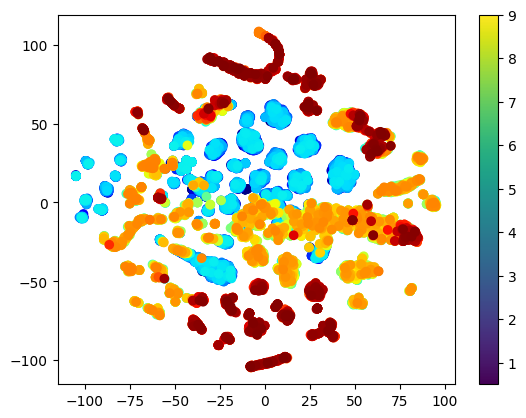

In [41]:
# by univariate analysis on the .asm file features we are getting very negligible information from 
# 'rtn', '.BSS:' '.CODE' features, so heare we are trying multivariate analysis after removing those features
# the plot looks very messy

xtsne = TSNE(perplexity = 30)
results=xtsne.fit_transform(result_asm.drop(['ID','Class', 'rtn', '.BSS:', '.CODE','size'], axis = 1))
vis_x = results[:, 0]
vis_y = results[:, 1]
plt.scatter(vis_x, vis_y, c = colors, cmap = cmap)
plt.colorbar(ticks = range(10))
plt.clim(0.5, 9)
plt.show()

<pre>
TSNE for asm data with perplexity 50
</pre>

<h3> 4.2.3 Conclusion on EDA</h3>

<p>
<li>We have taken only 52 features from asm files (after reading through many blogs and research papers) </li>
<li>The univariate analysis was done only on few important features.</li>
<li>Take-aways
<ul>
<li>1. Class 3 can be easily separated because of the frequency of segments,opcodes and keywords being less </li>
<li>2. Each feature has its unique importance in separating the Class labels.</li>
</ul>
</li>
</p>

<h2> 4.3 Train and test split</h2>

In [42]:
asm_y = result_asm['Class']
asm_x = result_asm.drop(['ID', 'Class', '.BSS:', 'rtn', '.CODE'], axis = 1)

In [43]:
X_train_asm, X_test_asm, y_train_asm, y_test_asm = train_test_split(asm_x,asm_y , stratify = asm_y, test_size = 0.20)
X_train_asm, X_cv_asm, y_train_asm, y_cv_asm = train_test_split(X_train_asm, y_train_asm, stratify = y_train_asm, test_size = 0.20)

In [44]:
print(X_cv_asm.isnull().all())

HEADER:    False
.text:     False
.Pav:      False
.idata:    False
.data:     False
.bss:      False
.rdata:    False
.edata:    False
.rsrc:     False
.tls:      False
.reloc:    False
jmp        False
mov        False
retf       False
push       False
pop        False
xor        False
retn       False
nop        False
sub        False
inc        False
dec        False
add        False
imul       False
xchg       False
or         False
shr        False
cmp        False
call       False
shl        False
ror        False
rol        False
jnb        False
jz         False
lea        False
movzx      False
.dll       False
std::      False
:dword     False
edx        False
esi        False
eax        False
ebx        False
ecx        False
edi        False
ebp        False
esp        False
eip        False
size       False
dtype: bool


<h2> 4.4. Machine Learning models on features of .asm files</h2>

<h3> 4.4.1 K-Nearest Neigbors </h3>

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:04<00:00,  2.25it/s]

log_loss for k =  1 is 0.08726396381346195
log_loss for k =  3 is 0.0872132569146361
log_loss for k =  5 is 0.0952988702652293
log_loss for k =  7 is 0.10423140192569284
log_loss for k =  9 is 0.1103467423287906
log_loss for k =  11 is 0.11625445537268203
log_loss for k =  13 is 0.12388088402920577
log_loss for k =  15 is 0.13182532009472003
log_loss for k =  17 is 0.138918578836163
log_loss for k =  19 is 0.14547181117507332


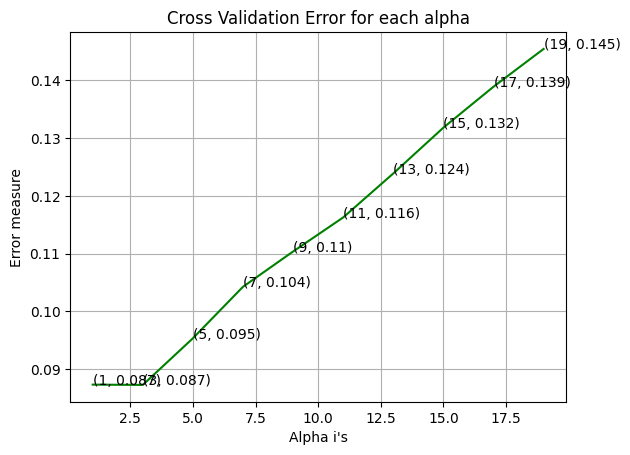

log loss for train data 0.04607847087086691
log loss for cv data 0.0872132569146361
log loss for test data 0.09724533767682982
Number of misclassified points  2.1619135234590616
-------------------------------------------------- Confusion matrix --------------------------------------------------


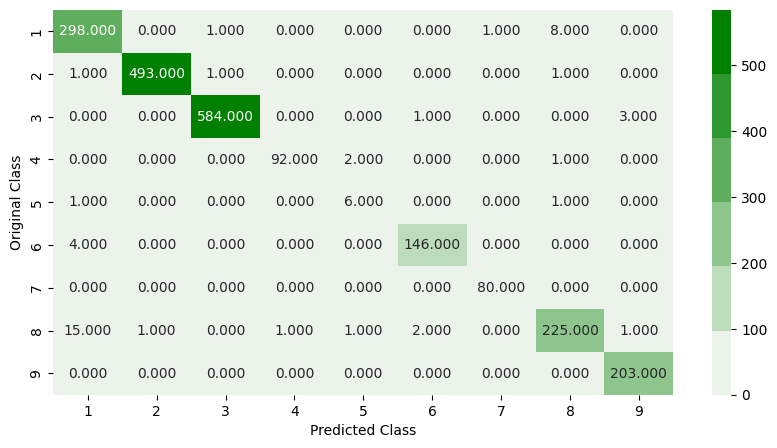

-------------------------------------------------- Precision matrix --------------------------------------------------


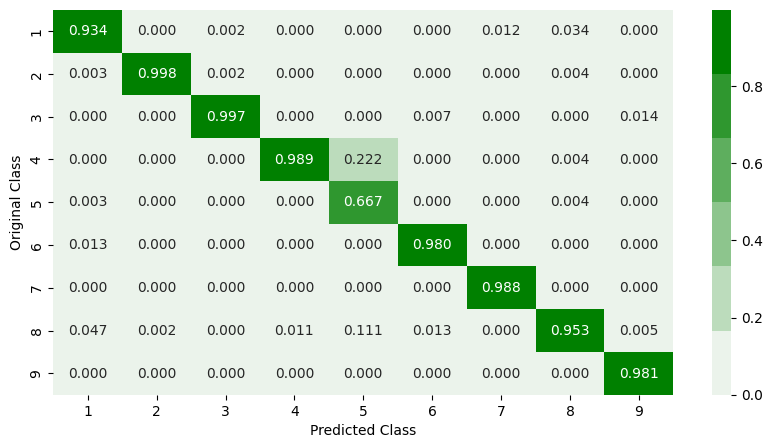

Sum of columns in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


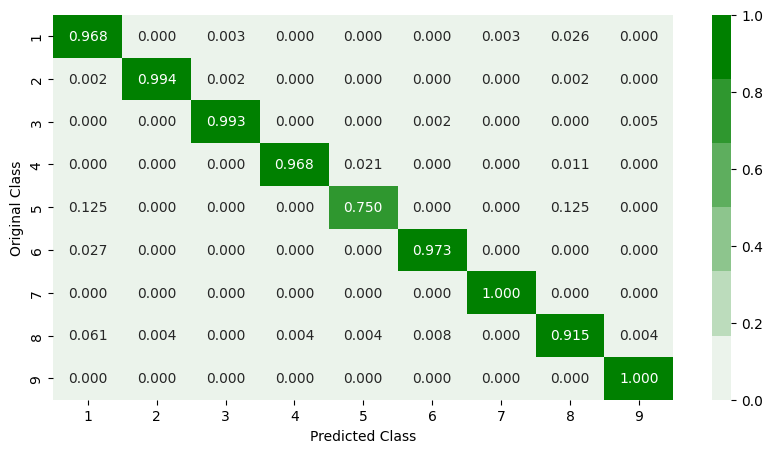

Sum of rows in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [45]:
# http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
# http://scikit-learn.org/stable/modules/generated/sklearn.calibration.CalibratedClassifierCV.html

alpha = [x for x in range(1, 21,2)]
cv_log_error_array = []
for i in tqdm(alpha):
    k_cfl = KNeighborsClassifier(n_neighbors = i)
    k_cfl.fit(X_train_asm, y_train_asm)
    sig_clf = CalibratedClassifierCV(k_cfl, method = 'sigmoid', n_jobs = -1)
    sig_clf.fit(X_train_asm, y_train_asm)
    predict_y = sig_clf.predict_proba(X_cv_asm)
    cv_log_error_array.append(log_loss(y_cv_asm, predict_y, labels=k_cfl.classes_, eps = 1e-15))
    
for i in range(len(cv_log_error_array)):
    print ('log_loss for k = ', alpha[i], 'is', cv_log_error_array[i])

best_alpha = np.argmin(cv_log_error_array)
    
fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array, c = 'g')
for i, txt in enumerate(np.round(cv_log_error_array, 3)):
    ax.annotate((alpha[i], np.round(txt, 3)), (alpha[i], cv_log_error_array[i]))
plt.grid()
plt.title('Cross Validation Error for each alpha')
plt.xlabel("Alpha i's")
plt.ylabel('Error measure')
plt.show()

k_cfl = KNeighborsClassifier(n_neighbors = alpha[best_alpha])
k_cfl.fit(X_train_asm,y_train_asm)
sig_clf = CalibratedClassifierCV(k_cfl, method = 'sigmoid', n_jobs = -1)
sig_clf.fit(X_train_asm, y_train_asm)
pred_y = sig_clf.predict(X_test_asm)


predict_y = sig_clf.predict_proba(X_train_asm)
print ('log loss for train data', log_loss(y_train_asm, predict_y))
predict_y = sig_clf.predict_proba(X_cv_asm)
print ('log loss for cv data', log_loss(y_cv_asm, predict_y))
predict_y = sig_clf.predict_proba(X_test_asm)
print ('log loss for test data', log_loss(y_test_asm, predict_y))
plot_confusion_matrix(y_test_asm, sig_clf.predict(X_test_asm))

<h3> 4.4.2 Logistic Regression </h3>

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:19<00:00,  2.11s/it]

log_loss for c =  1e-05 is 1.2785263437289605
log_loss for c =  0.0001 is 1.2782730159165283
log_loss for c =  0.001 is 1.2752608064685207
log_loss for c =  0.01 is 1.2357632697502976
log_loss for c =  0.1 is 1.0202387027289153
log_loss for c =  1 is 1.1982800480164042
log_loss for c =  10 is 1.2442377279125445
log_loss for c =  100 is 1.2788128652381383
log_loss for c =  1000 is 1.4000784180485668


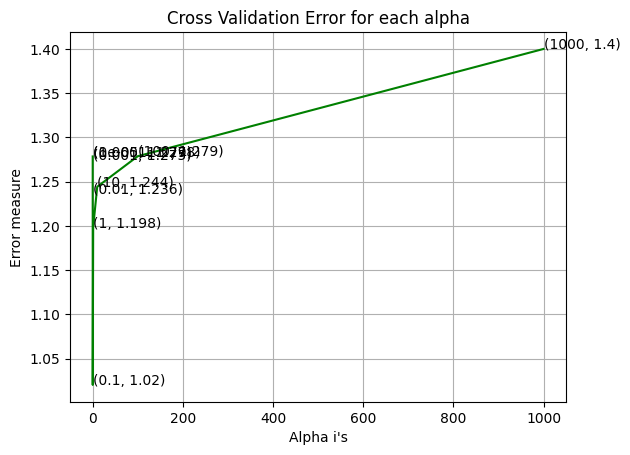

log loss for train data 1.0318756827310491
log loss for cv data 1.0202387027289153
log loss for test data 1.009567178304051
Number of misclassified points  28.978840846366143
-------------------------------------------------- Confusion matrix --------------------------------------------------


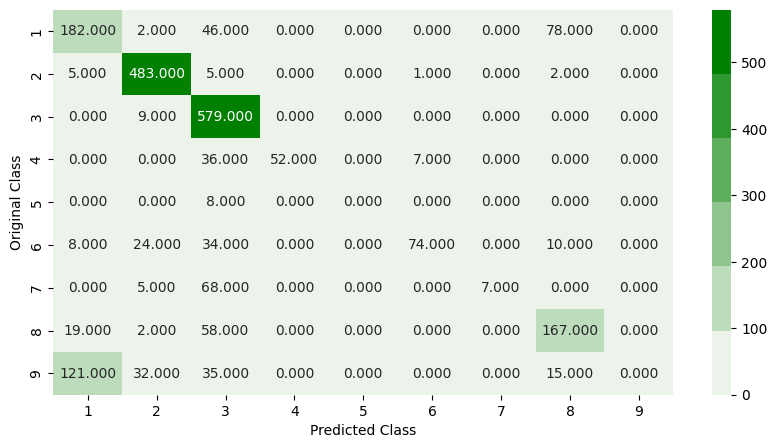

-------------------------------------------------- Precision matrix --------------------------------------------------


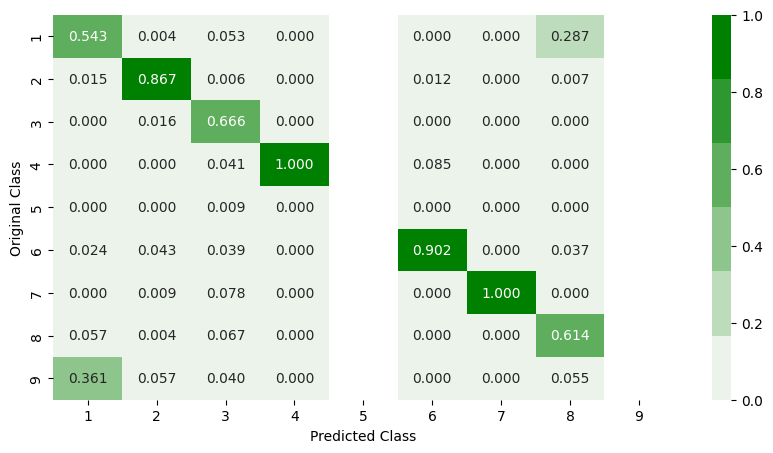

Sum of columns in precision matrix [ 1.  1.  1.  1. nan  1.  1.  1. nan]
-------------------------------------------------- Recall matrix --------------------------------------------------


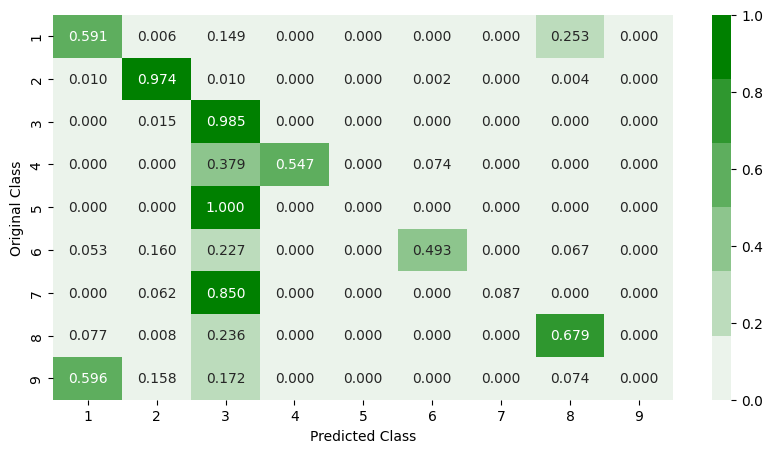

Sum of rows in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [46]:
# http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html

alpha = [10 ** x for x in range(-5, 4)]
cv_log_error_array = []
for i in tqdm(alpha):
    logisticR = LogisticRegression(penalty = 'l2', C = i, class_weight = 'balanced', max_iter = 3000)
    logisticR.fit(X_train_asm, y_train_asm)
    sig_clf = CalibratedClassifierCV(logisticR, method = 'sigmoid', n_jobs = -1)
    sig_clf.fit(X_train_asm, y_train_asm)
    predict_y = sig_clf.predict_proba(X_cv_asm)
    cv_log_error_array.append(log_loss(y_cv_asm, predict_y, labels = logisticR.classes_, eps = 1e-15))
    
for i in range(len(cv_log_error_array)):
    print ('log_loss for c = ', alpha[i], 'is', cv_log_error_array[i])

best_alpha = np.argmin(cv_log_error_array)
    
fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array, c = 'g')
for i, txt in enumerate(np.round(cv_log_error_array, 3)):
    ax.annotate((alpha[i], np.round(txt, 3)), (alpha[i], cv_log_error_array[i]))
plt.grid()
plt.title('Cross Validation Error for each alpha')
plt.xlabel("Alpha i's")
plt.ylabel('Error measure')
plt.show()

logisticR = LogisticRegression(penalty = 'l2', C = alpha[best_alpha], class_weight = 'balanced', max_iter = 3000)
logisticR.fit(X_train_asm, y_train_asm)
sig_clf = CalibratedClassifierCV(logisticR, method = 'sigmoid', n_jobs = -1)
sig_clf.fit(X_train_asm, y_train_asm)

predict_y = sig_clf.predict_proba(X_train_asm)
print ('log loss for train data', (log_loss(y_train_asm, predict_y, labels = logisticR.classes_, eps = 1e-15)))
predict_y = sig_clf.predict_proba(X_cv_asm)
print ('log loss for cv data', (log_loss(y_cv_asm, predict_y, labels = logisticR.classes_, eps = 1e-15)))
predict_y = sig_clf.predict_proba(X_test_asm)
print ('log loss for test data', (log_loss(y_test_asm, predict_y, labels = logisticR.classes_, eps = 1e-15)))
plot_confusion_matrix(y_test_asm, sig_clf.predict(X_test_asm))

<h3> 4.4.3 Random Forest Classifier</h3>

 86%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                        | 6/7 [00:54<00:14, 14.97s/it]

[CV 4/5; 1/10] START colsample_bytree=0.5, learning_rate=0.2, max_depth=10, n_estimators=100, subsample=1
[CV 4/5; 1/10] END colsample_bytree=0.5, learning_rate=0.2, max_depth=10, n_estimators=100, subsample=1;, score=0.984 total time= 1.1min
[CV 2/5; 5/10] START colsample_bytree=0.3, learning_rate=0.05, max_depth=5, n_estimators=1000, subsample=0.1
[CV 2/5; 5/10] END colsample_bytree=0.3, learning_rate=0.05, max_depth=5, n_estimators=1000, subsample=0.1;, score=0.978 total time= 1.5min
[CV 5/5; 5/10] START colsample_bytree=0.3, learning_rate=0.05, max_depth=5, n_estimators=1000, subsample=0.1
[CV 5/5; 5/10] END colsample_bytree=0.3, learning_rate=0.05, max_depth=5, n_estimators=1000, subsample=0.1;, score=0.986 total time= 1.5min
[CV 2/5; 8/10] START colsample_bytree=0.5, learning_rate=0.2, max_depth=5, n_estimators=200, subsample=0.1
[CV 2/5; 8/10] END colsample_bytree=0.5, learning_rate=0.2, max_depth=5, n_estimators=200, subsample=0.1;, score=0.975 total time=  28.7s
[CV 3/5; 9/10]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [01:38<00:00, 14.04s/it]

log_loss for c =  10 is 0.04554160284211193
log_loss for c =  50 is 0.04490005486886276
log_loss for c =  100 is 0.045627151184514665
log_loss for c =  500 is 0.04556811514166828
log_loss for c =  1000 is 0.04544904950163807
log_loss for c =  2000 is 0.04572017139633847
log_loss for c =  3000 is 0.045846033076327716


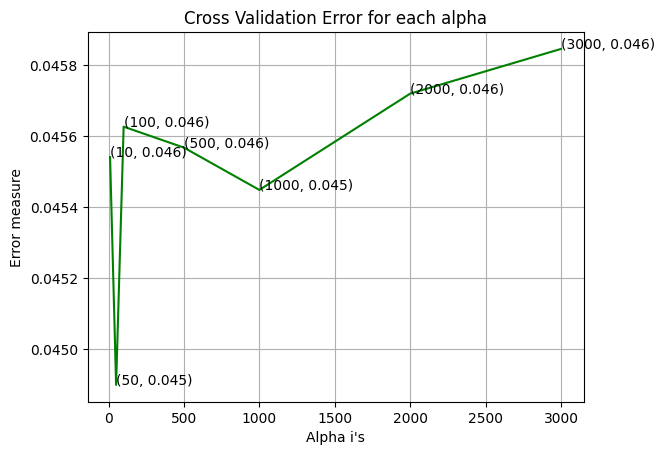

log loss for train data 0.014323741540076092
log loss for cv data 0.04490005486886276
log loss for test data 0.03765416693709828
Number of misclassified points  0.8739650413983441
-------------------------------------------------- Confusion matrix --------------------------------------------------


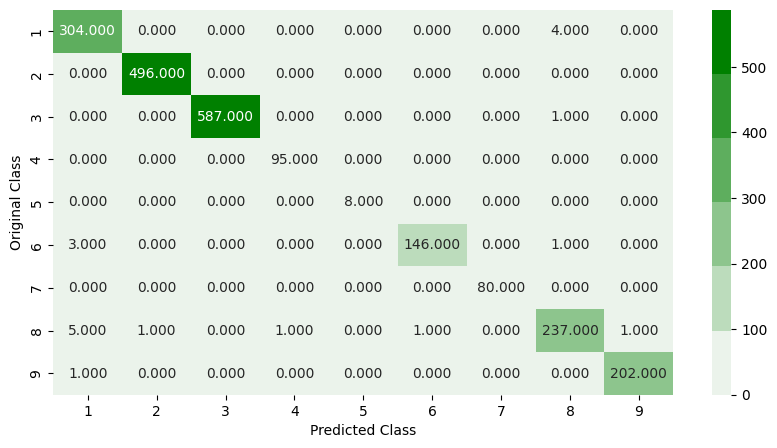

-------------------------------------------------- Precision matrix --------------------------------------------------


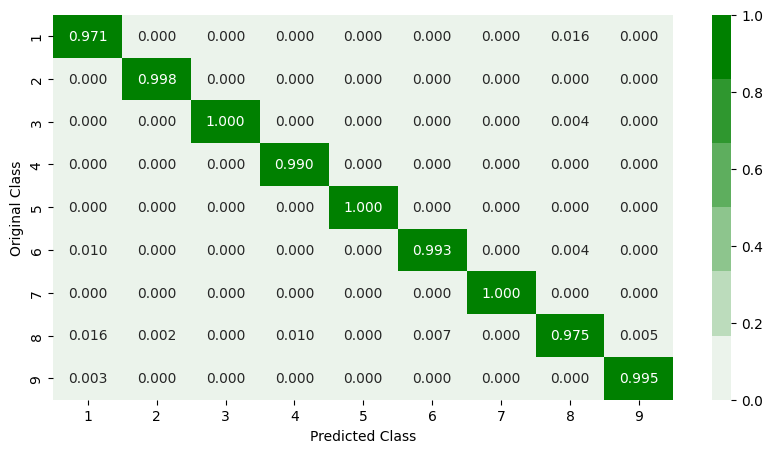

Sum of columns in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


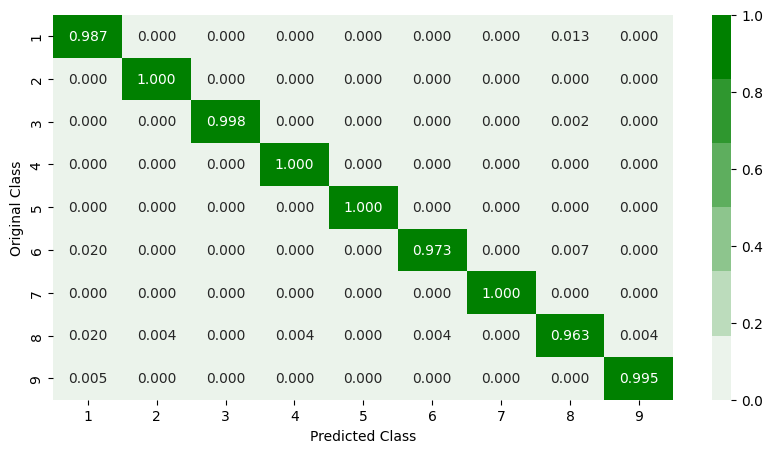

Sum of rows in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [47]:
alpha = [10, 50, 100, 500, 1000, 2000, 3000]
cv_log_error_array = []
for i in tqdm(alpha):
    r_cfl = RandomForestClassifier(n_estimators = i,random_state = 42, n_jobs = -1)
    r_cfl.fit(X_train_asm, y_train_asm)
    sig_clf = CalibratedClassifierCV(r_cfl, method = 'sigmoid', n_jobs = -1)
    sig_clf.fit(X_train_asm, y_train_asm)
    predict_y = sig_clf.predict_proba(X_cv_asm)
    cv_log_error_array.append(log_loss(y_cv_asm, predict_y, labels = r_cfl.classes_, eps = 1e-15))

for i in range(len(cv_log_error_array)):
    print ('log_loss for c = ', alpha[i], 'is', cv_log_error_array[i])


best_alpha = np.argmin(cv_log_error_array)

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array, c = 'g')
for i, txt in enumerate(np.round(cv_log_error_array, 3)):
    ax.annotate((alpha[i], np.round(txt, 3)), (alpha[i], cv_log_error_array[i]))
plt.grid()
plt.title('Cross Validation Error for each alpha')
plt.xlabel("Alpha i's")
plt.ylabel('Error measure')
plt.show()

r_cfl = RandomForestClassifier(n_estimators = alpha[best_alpha], random_state = 42, n_jobs = -1)
r_cfl.fit(X_train_asm, y_train_asm)
sig_clf = CalibratedClassifierCV(r_cfl, method = 'sigmoid', n_jobs = -1)
sig_clf.fit(X_train_asm, y_train_asm)
predict_y = sig_clf.predict_proba(X_train_asm)
print ('log loss for train data', (log_loss(y_train_asm, predict_y, labels = sig_clf.classes_, eps = 1e-15)))
predict_y = sig_clf.predict_proba(X_cv_asm)
print ('log loss for cv data', (log_loss(y_cv_asm, predict_y, labels = sig_clf.classes_, eps = 1e-15)))
predict_y = sig_clf.predict_proba(X_test_asm)
print ('log loss for test data', (log_loss(y_test_asm, predict_y, labels = sig_clf.classes_, eps = 1e-15)))
plot_confusion_matrix(y_test_asm, sig_clf.predict(X_test_asm))

<h3> 4.4.4 XgBoost Classifier</h3>

 86%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                        | 6/7 [02:30<00:39, 39.09s/it]

[CV 1/5; 2/10] START colsample_bytree=0.1, learning_rate=0.01, max_depth=5, n_estimators=500, subsample=0.3
[CV 1/5; 2/10] END colsample_bytree=0.1, learning_rate=0.01, max_depth=5, n_estimators=500, subsample=0.3;, score=0.978 total time= 1.0min
[CV 2/5; 4/10] START colsample_bytree=0.5, learning_rate=0.03, max_depth=5, n_estimators=200, subsample=0.3
[CV 2/5; 4/10] END colsample_bytree=0.5, learning_rate=0.03, max_depth=5, n_estimators=200, subsample=0.3;, score=0.974 total time= 1.7min
[CV 3/5; 6/10] START colsample_bytree=1, learning_rate=0.2, max_depth=10, n_estimators=500, subsample=0.1
[CV 3/5; 6/10] END colsample_bytree=1, learning_rate=0.2, max_depth=10, n_estimators=500, subsample=0.1;, score=0.978 total time= 1.7min
[CV 1/5; 9/10] START colsample_bytree=1, learning_rate=0.15, max_depth=5, n_estimators=2000, subsample=0.5
[CV 1/5; 9/10] END colsample_bytree=1, learning_rate=0.15, max_depth=5, n_estimators=2000, subsample=0.5;, score=0.985 total time= 7.1min


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [04:12<00:00, 36.01s/it]

[CV 1/5; 3/10] START colsample_bytree=0.3, learning_rate=0.2, max_depth=10, n_estimators=2000, subsample=0.3
[CV 1/5; 3/10] END colsample_bytree=0.3, learning_rate=0.2, max_depth=10, n_estimators=2000, subsample=0.3;, score=0.986 total time= 2.6min
[CV 4/5; 5/10] START colsample_bytree=0.3, learning_rate=0.05, max_depth=5, n_estimators=1000, subsample=0.1
[CV 4/5; 5/10] END colsample_bytree=0.3, learning_rate=0.05, max_depth=5, n_estimators=1000, subsample=0.1;, score=0.980 total time= 1.5min
[CV 1/5; 8/10] START colsample_bytree=0.5, learning_rate=0.2, max_depth=5, n_estimators=200, subsample=0.1
[CV 1/5; 8/10] END colsample_bytree=0.5, learning_rate=0.2, max_depth=5, n_estimators=200, subsample=0.1;, score=0.980 total time=  29.9s
[CV 4/5; 9/10] START colsample_bytree=1, learning_rate=0.15, max_depth=5, n_estimators=2000, subsample=0.5
[CV 4/5; 9/10] END colsample_bytree=1, learning_rate=0.15, max_depth=5, n_estimators=2000, subsample=0.5;, score=0.982 total time= 7.1min
log_loss for

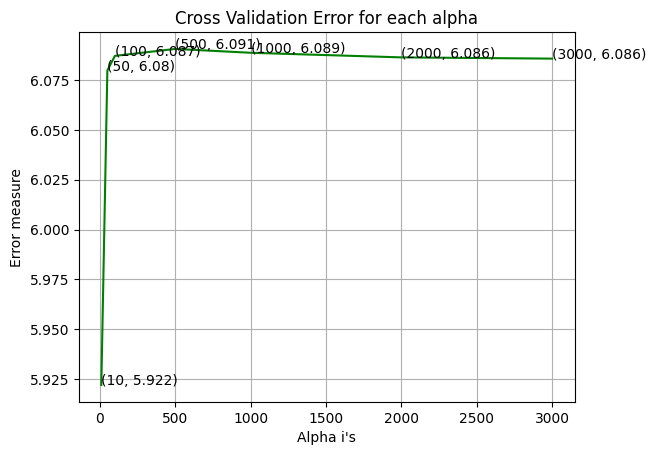

For values of best alpha =  10 The train log loss is: 0.02153319514005761
For values of best alpha =  10 The cross validation log loss is: 0.0504984435763978
For values of best alpha =  10 The test log loss is: 0.04207449564759941
Number of misclassified points  99.9540018399264
-------------------------------------------------- Confusion matrix --------------------------------------------------


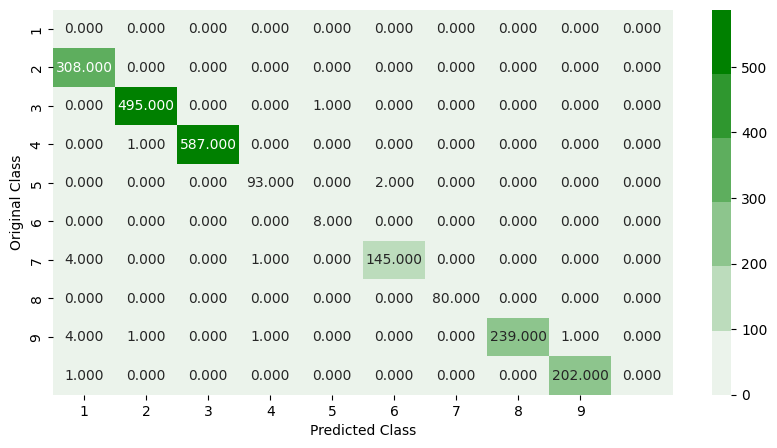

-------------------------------------------------- Precision matrix --------------------------------------------------


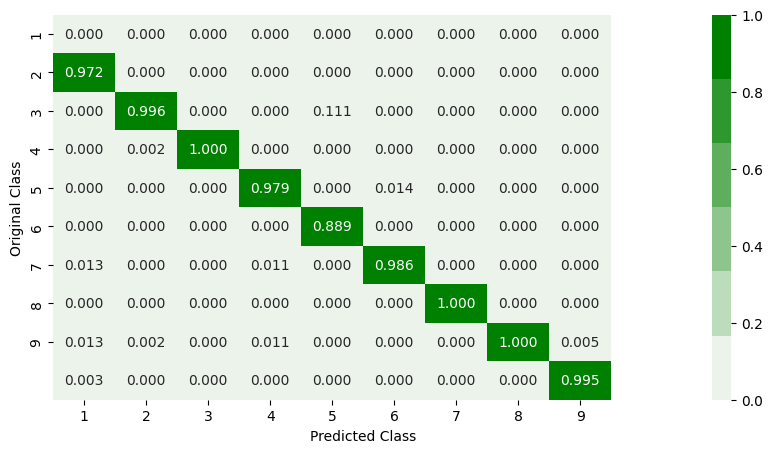

Sum of columns in precision matrix [ 1.  1.  1.  1.  1.  1.  1.  1.  1. nan]
-------------------------------------------------- Recall matrix --------------------------------------------------


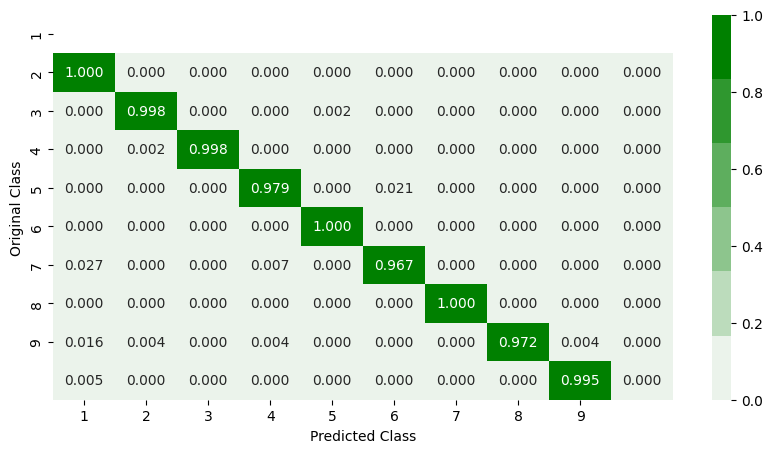

Sum of rows in precision matrix [nan  1.  1.  1.  1.  1.  1.  1.  1.  1.]


In [48]:
# Training a hyper-parameter tuned Xg-Boost regressor on our train data

# http://xgboost.readthedocs.io/en/latest/python/python_api.html?#xgboost.XGBClassifier

le = LabelEncoder()
y_train_asm = le.fit_transform(y_train_asm)

alpha = [10, 50, 100, 500, 1000, 2000, 3000]
cv_log_error_array = []
for i in tqdm(alpha):
    x_cfl = XGBClassifier(n_estimators = i, nthread = -1)
    x_cfl.fit(X_train_asm,y_train_asm)
    sig_clf = CalibratedClassifierCV(x_cfl, method = 'sigmoid', n_jobs = -1)
    sig_clf.fit(X_train_asm, y_train_asm)
    predict_y = sig_clf.predict_proba(X_cv_asm)
    cv_log_error_array.append(log_loss(y_cv_asm, predict_y, labels = x_cfl.classes_, eps = 1e-15))

for i in range(len(cv_log_error_array)):
    print ('log_loss for c = ', alpha[i], 'is', cv_log_error_array[i])


best_alpha = np.argmin(cv_log_error_array)

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array, c = 'g')
for i, txt in enumerate(np.round(cv_log_error_array, 3)):
    ax.annotate((alpha[i], np.round(txt, 3)), (alpha[i], cv_log_error_array[i]))
plt.grid()
plt.title('Cross Validation Error for each alpha')
plt.xlabel("Alpha i's")
plt.ylabel('Error measure')
plt.show()

x_cfl = XGBClassifier(n_estimators = alpha[best_alpha], nthread = -1)
x_cfl.fit(X_train_asm, y_train_asm)
sig_clf = CalibratedClassifierCV(x_cfl, method = 'sigmoid', n_jobs = -1)
sig_clf.fit(X_train_asm, y_train_asm)
    
predict_y = sig_clf.predict_proba(X_train_asm)

print ('For values of best alpha = ', alpha[best_alpha], 'The train log loss is:', log_loss(y_train_asm, predict_y))
predict_y = sig_clf.predict_proba(X_cv_asm)
print('For values of best alpha = ', alpha[best_alpha], 'The cross validation log loss is:', log_loss(y_cv_asm, predict_y))
predict_y = sig_clf.predict_proba(X_test_asm)
print('For values of best alpha = ', alpha[best_alpha], 'The test log loss is:', log_loss(y_test_asm, predict_y))
plot_confusion_matrix(y_test_asm, sig_clf.predict(X_test_asm))

<h3> 4.4.5 Xgboost Classifier with best hyperparameters</h3>

In [49]:
x_cfl = XGBClassifier(nthread = -1)

prams = {
        'learning_rate' : [0.01,0.03,0.05,0.1,0.15,0.2],
        'n_estimators' : [100,200,500,1000,2000],
        'max_depth' : [3,5,10],
        'colsample_bytree' : [0.1,0.3,0.5,1],
        'subsample' : [0.1,0.3,0.5,1]
        }
random_cfl = RandomizedSearchCV(x_cfl , param_distributions = prams, verbose = 10, n_jobs = -1,)
random_cfl.fit(X_train_asm, y_train_asm)

print(random_cfl.best_params_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5; 1/10] START colsample_bytree=0.3, learning_rate=0.2, max_depth=3, n_estimators=200, subsample=0.3
[CV 1/5; 1/10] END colsample_bytree=0.3, learning_rate=0.2, max_depth=3, n_estimators=200, subsample=0.3;, score=0.993 total time=   5.7s
[CV 3/5; 3/10] START colsample_bytree=0.1, learning_rate=0.15, max_depth=3, n_estimators=1000, subsample=0.3
[CV 3/5; 3/10] END colsample_bytree=0.1, learning_rate=0.15, max_depth=3, n_estimators=1000, subsample=0.3;, score=0.994 total time=  13.5s
[CV 5/5; 4/10] START colsample_bytree=0.3, learning_rate=0.2, max_depth=10, n_estimators=1000, subsample=0.1
[CV 5/5; 4/10] END colsample_bytree=0.3, learning_rate=0.2, max_depth=10, n_estimators=1000, subsample=0.1;, score=0.999 total time=  15.2s
[CV 5/5; 7/10] START colsample_bytree=0.1, learning_rate=0.15, max_depth=3, n_estimators=100, subsample=0.5
[CV 5/5; 7/10] END colsample_bytree=0.1, learning_rate=0.15, max_depth=3, n_estimators=1

In [50]:
# Training a hyper-parameter tuned Xg-Boost regressor on our train data

# http://xgboost.readthedocs.io/en/latest/python/python_api.html?#xgboost.XGBClassifier

n_est =random_cfl1.best_params_.get('n_estimators')
sub_s = random_cfl1.best_params_.get('subsample')
lrs_ = random_cfl1.best_params_.get('learning_rate')
bytree_ = random_cfl1.best_params_.get('colsample_bytree')
depth_ = random_cfl1.best_params_.get('max_depth')


x_cfl = XGBClassifier(n_estimators = n_est, subsample = sub_s, learning_rate = lrs_, colsample_bytree = bytree_, max_depth = depth_, nthread = -1)
x_cfl.fit(X_train_asm,y_train_asm)
c_cfl = CalibratedClassifierCV(x_cfl, method = 'sigmoid', n_jobs = -1)
c_cfl.fit(X_train_asm, y_train_asm)

predict_y = c_cfl.predict_proba(X_train_asm)
print ('train loss', log_loss(y_train_asm, predict_y))
predict_y = c_cfl.predict_proba(X_cv_asm)
print ('cv loss', log_loss(y_cv_asm, predict_y))
predict_y = c_cfl.predict_proba(X_test_asm)
print ('test loss', log_loss(y_test_asm, predict_y))

train loss 0.011957689852140102
cv loss 0.046344278017599834
test loss 0.035144938049125614


<h2> 4.5. Machine Learning models on features of both .asm and .bytes files</h2>

<h3> 4.5.1. Merging both asm and byte file features</h3>

In [51]:
result.head()

ID         0         1         2         3         4  \
0  01azqd4InC7m9JpocGv5  0.262806  0.005498  0.001567  0.002067  0.002048   
1  01IsoiSMh5gxyDYTl4CB  0.017358  0.011737  0.004033  0.003876  0.005303   
2  01jsnpXSAlgw6aPeDxrU  0.040827  0.013434  0.001429  0.001315  0.005464   
3  01kcPWA9K2BOxQeS5Rju  0.009209  0.001708  0.000404  0.000441  0.000770   
4  01SuzwMJEIXsK7A8dQbl  0.008629  0.001000  0.000168  0.000234  0.000342   

          5         6         7         8  ...        f9        fa        fb  \
0  0.001835  0.002058  0.002946  0.002638  ...  0.013560  0.013107  0.013634   
1  0.003873  0.004747  0.006984  0.008267  ...  0.001920  0.001147  0.001329   
2  0.005280  0.005078  0.002155  0.008104  ...  0.009804  0.011777  0.012604   
3  0.000354  0.000310  0.000481  0.000959  ...  0.002121  0.001886  0.002272   
4  0.000232  0.000148  0.000229  0.000376  ...  0.001530  0.000853  0.001052   

         fc        fd        fe        ff        ??      size  Class  
0  0.031724  0.014549  0.014348  0.007843  0.000129  0.075971      9  
1  0.087867  0.002432  0.088411  0.074851  0.000606  0.099986      2  
2  0.028423  0.013080  0.013937  0.067001  0.000033  0.069582      9  
3  0.013032  0.002211  0.003957  0.010904  0.000984  0.008556      1  
4  0.007511  0.001038  0.001258  0.002998  0.000636  0.004810      8  

[5 rows x 260 columns]

In [52]:
result_asm.head()

ID   HEADER:    .text:  .Pav:   .idata:    .data:  .bss:  \
0  01kcPWA9K2BOxQeS5Rju  0.107345  0.001092    0.0  0.000761  0.000023    0.0   
1  1E93CpP60RHFNiT5Qfvn  0.096045  0.001230    0.0  0.000617  0.000019    0.0   
2  3ekVow2ajZHbTnBcsDfX  0.096045  0.000627    0.0  0.000300  0.000017    0.0   
3  3X2nY7iQaPBIWDrAZqJe  0.096045  0.000333    0.0  0.000258  0.000008    0.0   
4  46OZzdsSKDCFV8h7XWxf  0.096045  0.000590    0.0  0.000353  0.000068    0.0   

    .rdata:  .edata:    .rsrc:  ...       esi       eax       ebx       ecx  \
0  0.000084      0.0  0.000072  ...  0.000746  0.000301  0.000360  0.001057   
1  0.000000      0.0  0.000072  ...  0.000328  0.000965  0.000686  0.000153   
2  0.000038      0.0  0.000072  ...  0.000475  0.000201  0.000560  0.000178   
3  0.000000      0.0  0.000072  ...  0.000090  0.000281  0.000059  0.000025   
4  0.000000      0.0  0.000072  ...  0.000102  0.000362  0.000243  0.000064   

   edi       ebp       esp       eip  Class      size  
0  0.0  0.030797  0.001468  0.003173      1  0.000432  
1  0.0  0.025362  0.000000  0.002188      1  0.000327  
2  0.0  0.019928  0.000000  0.000985      1  0.000172  
3  0.0  0.014493  0.000000  0.000657      1  0.000009  
4  0.0  0.019928  0.000000  0.001204      1  0.000143  

[5 rows x 54 columns]

In [53]:
print(result.shape)
print(result_asm.shape)

(10869, 260)
(10868, 54)


In [54]:
result_x = pd.merge(result,result_asm.drop(['Class'], axis = 1), on = 'ID', how = 'left')
result_y = result_x['Class']
result_x = result_x.drop(['ID', 'rtn', '.BSS:', '.CODE', 'Class'], axis=1)
result_x.head()

0         1         2         3         4         5         6  \
0  0.262806  0.005498  0.001567  0.002067  0.002048  0.001835  0.002058   
1  0.017358  0.011737  0.004033  0.003876  0.005303  0.003873  0.004747   
2  0.040827  0.013434  0.001429  0.001315  0.005464  0.005280  0.005078   
3  0.009209  0.001708  0.000404  0.000441  0.000770  0.000354  0.000310   
4  0.008629  0.001000  0.000168  0.000234  0.000342  0.000232  0.000148   

          7         8         9  ...       edx       esi       eax       ebx  \
0  0.002946  0.002638  0.003531  ...  0.015418  0.025875  0.025744  0.004910   
1  0.006984  0.008267  0.000394  ...  0.004961  0.012316  0.007858  0.007570   
2  0.002155  0.008104  0.002707  ...  0.000095  0.006181  0.000100  0.003773   
3  0.000481  0.000959  0.000521  ...  0.000343  0.000746  0.000301  0.000360   
4  0.000229  0.000376  0.000246  ...  0.000343  0.013875  0.000482  0.012932   

        ecx  edi       ebp       esp       eip    size_y  
0  0.008930  0.0  0.027174  0.000428  0.049896  0.400910  
1  0.005350  0.0  0.043478  0.000673  0.024839  0.099719  
2  0.000713  0.0  0.048913  0.000000  0.012802  0.060553  
3  0.001057  0.0  0.030797  0.001468  0.003173  0.000432  
4  0.001363  0.0  0.027174  0.000000  0.008316  0.006983  

[5 rows x 307 columns]

<h3> 4.5.2. Multivariate Analysis on final fearures</h3>

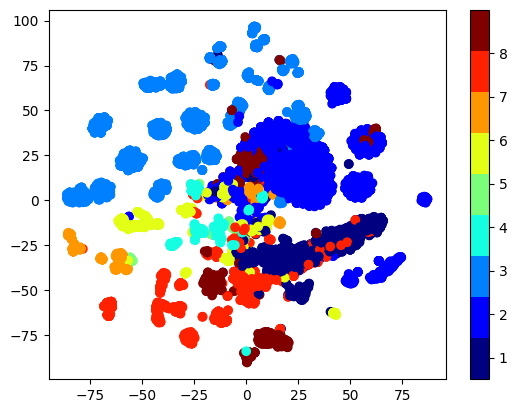

In [55]:
xtsne = TSNE(perplexity = 50)
results=xtsne.fit_transform(result_x)
vis_x = results[:, 0]
vis_y = results[:, 1]
plt.scatter(vis_x, vis_y, c = result_y, cmap = plt.cm.get_cmap("jet", 9))
plt.colorbar(ticks = range(9))
plt.clim(0.5, 9)
plt.show()

<h3> 4.5.3. Train and Test split</h3>

In [56]:
X_train, X_test_merge, y_train, y_test_merge = train_test_split(result_x, result_y,stratify = result_y, test_size = 0.20)
X_train_merge, X_cv_merge, y_train_merge, y_cv_merge = train_test_split(X_train, y_train,stratify = y_train, test_size = 0.20)

<h3> 4.5.4. Random Forest Classifier on final features</h3>

 43%|████████████████████████████████████████████████████████████████████████                                                                                                | 3/7 [00:06<00:09,  2.48s/it]

[CV 1/5; 3/10] START colsample_bytree=0.1, learning_rate=0.15, max_depth=3, n_estimators=1000, subsample=0.3
[CV 1/5; 3/10] END colsample_bytree=0.1, learning_rate=0.15, max_depth=3, n_estimators=1000, subsample=0.3;, score=0.992 total time=  13.2s
[CV 4/5; 4/10] START colsample_bytree=0.3, learning_rate=0.2, max_depth=10, n_estimators=1000, subsample=0.1
[CV 4/5; 4/10] END colsample_bytree=0.3, learning_rate=0.2, max_depth=10, n_estimators=1000, subsample=0.1;, score=0.990 total time=  14.3s
[CV 5/5; 5/10] START colsample_bytree=1, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=1
[CV 5/5; 5/10] END colsample_bytree=1, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=1;, score=0.981 total time=  13.8s
[CV 2/5; 9/10] START colsample_bytree=1, learning_rate=0.15, max_depth=3, n_estimators=100, subsample=0.5
[CV 2/5; 9/10] END colsample_bytree=1, learning_rate=0.15, max_depth=3, n_estimators=100, subsample=0.5;, score=0.995 total time=  11.9s
[CV 4/5; 10/10] STAR

 71%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                | 5/7 [00:58<00:36, 18.02s/it]

[CV 1/5; 1/10] START colsample_bytree=0.5, learning_rate=0.2, max_depth=10, n_estimators=100, subsample=1
[CV 1/5; 1/10] END colsample_bytree=0.5, learning_rate=0.2, max_depth=10, n_estimators=100, subsample=1;, score=0.986 total time= 1.1min
[CV 1/5; 5/10] START colsample_bytree=0.3, learning_rate=0.05, max_depth=5, n_estimators=1000, subsample=0.1
[CV 1/5; 5/10] END colsample_bytree=0.3, learning_rate=0.05, max_depth=5, n_estimators=1000, subsample=0.1;, score=0.983 total time= 1.5min
[CV 1/5; 6/10] START colsample_bytree=1, learning_rate=0.2, max_depth=10, n_estimators=500, subsample=0.1
[CV 1/5; 6/10] END colsample_bytree=1, learning_rate=0.2, max_depth=10, n_estimators=500, subsample=0.1;, score=0.983 total time= 1.6min
[CV 3/5; 8/10] START colsample_bytree=0.5, learning_rate=0.2, max_depth=5, n_estimators=200, subsample=0.1
[CV 3/5; 8/10] END colsample_bytree=0.5, learning_rate=0.2, max_depth=5, n_estimators=200, subsample=0.1;, score=0.980 total time=  29.5s
[CV 5/5; 9/10] START

 86%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                        | 6/7 [02:08<00:35, 35.62s/it]

[CV 5/5; 1/10] START colsample_bytree=0.5, learning_rate=0.2, max_depth=10, n_estimators=100, subsample=1
[CV 5/5; 1/10] END colsample_bytree=0.5, learning_rate=0.2, max_depth=10, n_estimators=100, subsample=1;, score=0.987 total time= 1.1min
[CV 4/5; 4/10] START colsample_bytree=0.5, learning_rate=0.03, max_depth=5, n_estimators=200, subsample=0.3
[CV 4/5; 4/10] END colsample_bytree=0.5, learning_rate=0.03, max_depth=5, n_estimators=200, subsample=0.3;, score=0.977 total time= 1.6min
[CV 5/5; 6/10] START colsample_bytree=1, learning_rate=0.2, max_depth=10, n_estimators=500, subsample=0.1
[CV 5/5; 6/10] END colsample_bytree=1, learning_rate=0.2, max_depth=10, n_estimators=500, subsample=0.1;, score=0.984 total time= 1.7min
[CV 2/5; 9/10] START colsample_bytree=1, learning_rate=0.15, max_depth=5, n_estimators=2000, subsample=0.5
[CV 2/5; 9/10] END colsample_bytree=1, learning_rate=0.15, max_depth=5, n_estimators=2000, subsample=0.5;, score=0.981 total time= 7.1min
[CV 4/5; 2/10] START c

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [03:53<00:00, 33.38s/it]

log_loss for c =  10 is 0.050075984800227416
log_loss for c =  50 is 0.043541479749327656
log_loss for c =  100 is 0.043782836946666404
log_loss for c =  500 is 0.04358775424756725
log_loss for c =  1000 is 0.04369221886760399
log_loss for c =  2000 is 0.04369966923208416
log_loss for c =  3000 is 0.043648544208478524


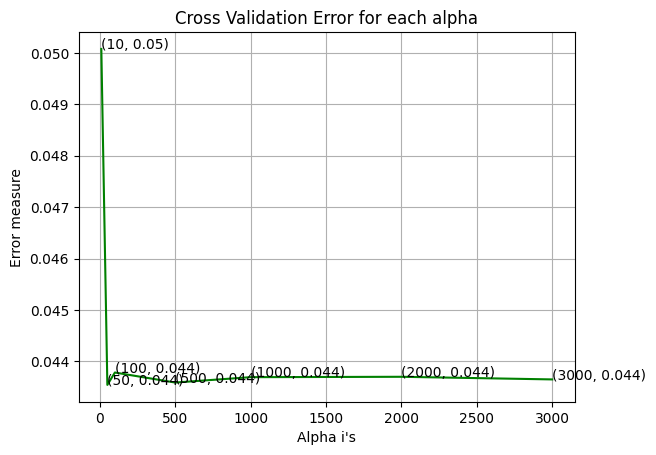

For values of best alpha =  50 The train log loss is :  0.015694614889694532
For values of best alpha =  50 The cross validation log loss is :  0.043541479749327656
For values of best alpha =  50 The test log loss is :  0.0581378628670261


In [57]:
alpha = [10, 50, 100, 500, 1000, 2000, 3000]
cv_log_error_array = []
for i in tqdm(alpha):
    r_cfl = RandomForestClassifier(n_estimators = i, random_state = 42, n_jobs = -1)
    r_cfl.fit(X_train_merge,y_train_merge)
    sig_clf = CalibratedClassifierCV(r_cfl, method = 'sigmoid', n_jobs = -1)
    sig_clf.fit(X_train_merge, y_train_merge)
    predict_y = sig_clf.predict_proba(X_cv_merge)
    cv_log_error_array.append(log_loss(y_cv_merge, predict_y, labels = r_cfl.classes_, eps = 1e-15))

for i in range(len(cv_log_error_array)):
    print ('log_loss for c = ', alpha[i], 'is', cv_log_error_array[i])


best_alpha = np.argmin(cv_log_error_array)

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array, c = 'g')
for i, txt in enumerate(np.round(cv_log_error_array, 3)):
    ax.annotate((alpha[i], np.round(txt, 3)), (alpha[i], cv_log_error_array[i]))
plt.grid()
plt.title('Cross Validation Error for each alpha')
plt.xlabel("Alpha i's")
plt.ylabel('Error measure')
plt.show()


r_cfl = RandomForestClassifier(n_estimators = alpha[best_alpha], random_state = 42, n_jobs = -1)
r_cfl.fit(X_train_merge,y_train_merge)
sig_clf = CalibratedClassifierCV(r_cfl, method = 'sigmoid', n_jobs = -1)
sig_clf.fit(X_train_merge, y_train_merge)

predict_y = sig_clf.predict_proba(X_train_merge)
print ('For values of best alpha = ', alpha[best_alpha], 'The train log loss is : ', log_loss(y_train_merge, predict_y))
predict_y = sig_clf.predict_proba(X_cv_merge)
print('For values of best alpha = ', alpha[best_alpha], 'The cross validation log loss is : ', log_loss(y_cv_merge, predict_y))
predict_y = sig_clf.predict_proba(X_test_merge)
print('For values of best alpha = ', alpha[best_alpha], 'The test log loss is : ', log_loss(y_test_merge, predict_y))

<h3> 4.5.5. XgBoost Classifier on final features</h3>

  0%|                                                                                                                                                                                | 0/7 [00:00<?, ?it/s]

[CV 3/5; 2/10] START colsample_bytree=0.3, learning_rate=0.1, max_depth=10, n_estimators=1000, subsample=0.5
[CV 3/5; 2/10] END colsample_bytree=0.3, learning_rate=0.1, max_depth=10, n_estimators=1000, subsample=0.5;, score=0.994 total time=  29.2s
[CV 3/5; 6/10] START colsample_bytree=0.1, learning_rate=0.1, max_depth=10, n_estimators=2000, subsample=0.3
[CV 3/5; 6/10] END colsample_bytree=0.1, learning_rate=0.1, max_depth=10, n_estimators=2000, subsample=0.3;, score=0.993 total time=  26.2s


 57%|████████████████████████████████████████████████████████████████████████████████████████████████                                                                        | 4/7 [04:15<04:04, 81.36s/it]

[CV 4/5; 1/10] START colsample_bytree=0.3, learning_rate=0.2, max_depth=3, n_estimators=200, subsample=0.3
[CV 4/5; 1/10] END colsample_bytree=0.3, learning_rate=0.2, max_depth=3, n_estimators=200, subsample=0.3;, score=0.991 total time=   5.7s
[CV 1/5; 4/10] START colsample_bytree=0.3, learning_rate=0.2, max_depth=10, n_estimators=1000, subsample=0.1
[CV 1/5; 4/10] END colsample_bytree=0.3, learning_rate=0.2, max_depth=10, n_estimators=1000, subsample=0.1;, score=0.992 total time=  14.4s
[CV 3/5; 5/10] START colsample_bytree=1, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=1
[CV 3/5; 5/10] END colsample_bytree=1, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=1;, score=0.982 total time=  14.2s
[CV 1/5; 8/10] START colsample_bytree=0.1, learning_rate=0.05, max_depth=3, n_estimators=500, subsample=0.3
[CV 1/5; 8/10] END colsample_bytree=0.1, learning_rate=0.05, max_depth=3, n_estimators=500, subsample=0.3;, score=0.992 total time=   9.7s
[CV 3/5; 9/10] START

 71%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                               | 5/7 [07:52<04:20, 130.46s/it]

[CV 5/5; 1/10] START colsample_bytree=0.3, learning_rate=0.2, max_depth=3, n_estimators=200, subsample=0.3
[CV 5/5; 1/10] END colsample_bytree=0.3, learning_rate=0.2, max_depth=3, n_estimators=200, subsample=0.3;, score=0.999 total time=   6.5s
[CV 2/5; 4/10] START colsample_bytree=0.3, learning_rate=0.2, max_depth=10, n_estimators=1000, subsample=0.1
[CV 2/5; 4/10] END colsample_bytree=0.3, learning_rate=0.2, max_depth=10, n_estimators=1000, subsample=0.1;, score=0.988 total time=  14.1s
[CV 4/5; 5/10] START colsample_bytree=1, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=1
[CV 4/5; 5/10] END colsample_bytree=1, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=1;, score=0.966 total time=  14.1s
[CV 2/5; 8/10] START colsample_bytree=0.1, learning_rate=0.05, max_depth=3, n_estimators=500, subsample=0.3
[CV 2/5; 8/10] END colsample_bytree=0.1, learning_rate=0.05, max_depth=3, n_estimators=500, subsample=0.3;, score=0.989 total time=   9.9s
[CV 4/5; 9/10] START

 86%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                       | 6/7 [14:10<03:34, 214.52s/it]

[CV 2/5; 1/10] START colsample_bytree=0.3, learning_rate=0.2, max_depth=3, n_estimators=200, subsample=0.3
[CV 2/5; 1/10] END colsample_bytree=0.3, learning_rate=0.2, max_depth=3, n_estimators=200, subsample=0.3;, score=0.990 total time=   5.9s
[CV 5/5; 3/10] START colsample_bytree=0.1, learning_rate=0.15, max_depth=3, n_estimators=1000, subsample=0.3
[CV 5/5; 3/10] END colsample_bytree=0.1, learning_rate=0.15, max_depth=3, n_estimators=1000, subsample=0.3;, score=0.999 total time=  13.7s
[CV 2/5; 5/10] START colsample_bytree=1, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=1
[CV 2/5; 5/10] END colsample_bytree=1, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=1;, score=0.981 total time=  14.5s
[CV 4/5; 7/10] START colsample_bytree=0.1, learning_rate=0.15, max_depth=3, n_estimators=100, subsample=0.5
[CV 4/5; 7/10] END colsample_bytree=0.1, learning_rate=0.15, max_depth=3, n_estimators=100, subsample=0.5;, score=0.989 total time=   2.4s
[CV 5/5; 8/10] START

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [23:06<00:00, 198.04s/it]

log_loss for c =  10 is 5.8639704524571625
log_loss for c =  50 is 6.110104043367383
log_loss for c =  100 is 6.120545974462646
log_loss for c =  500 is 6.122965590926153
log_loss for c =  1000 is 6.123019623225654
log_loss for c =  2000 is 6.123030758412385
log_loss for c =  3000 is 6.123065027659452


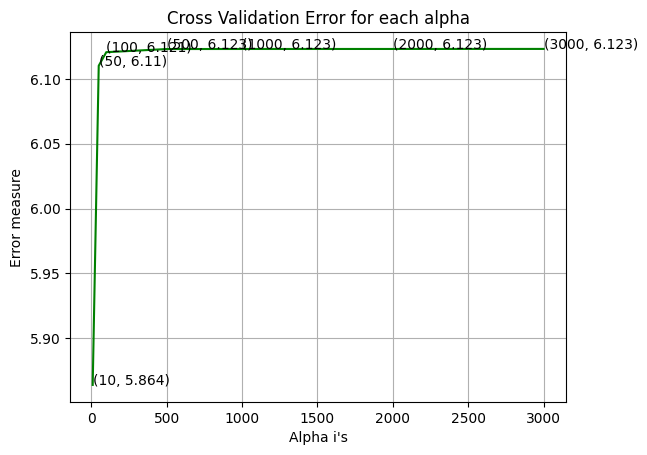

For values of best alpha =  10 The train log loss is :  0.012220991648439957
For values of best alpha =  10 The cross validation log loss is :  0.030207599069413702
For values of best alpha =  10 The test log loss is :  0.04830406896573067


In [58]:
# Training a hyper-parameter tuned Xg-Boost regressor on our train data

# http://xgboost.readthedocs.io/en/latest/python/python_api.html?#xgboost.XGBClassifier

le = LabelEncoder()
y_train_merge = le.fit_transform(y_train_merge)

alpha = [10, 50, 100, 500, 1000, 2000, 3000]
cv_log_error_array = []
for i in tqdm(alpha):
    x_cfl = XGBClassifier(n_estimators = i)
    x_cfl.fit(X_train_merge, y_train_merge)
    sig_clf = CalibratedClassifierCV(x_cfl, method = 'sigmoid', n_jobs = -1)
    sig_clf.fit(X_train_merge, y_train_merge)
    predict_y = sig_clf.predict_proba(X_cv_merge)
    cv_log_error_array.append(log_loss(y_cv_merge, predict_y, labels = x_cfl.classes_, eps = 1e-15))

for i in range(len(cv_log_error_array)):
    print ('log_loss for c = ', alpha[i], 'is', cv_log_error_array[i])


best_alpha = np.argmin(cv_log_error_array)

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array, c = 'g')
for i, txt in enumerate(np.round(cv_log_error_array, 3)):
    ax.annotate((alpha[i], np.round(txt, 3)), (alpha[i], cv_log_error_array[i]))
plt.grid()
plt.title('Cross Validation Error for each alpha')
plt.xlabel("Alpha i's")
plt.ylabel('Error measure')
plt.show()

x_cfl = XGBClassifier(n_estimators = 3000, nthread = -1)
x_cfl.fit(X_train_merge, y_train_merge, verbose = True)
sig_clf = CalibratedClassifierCV(x_cfl, method = 'sigmoid', n_jobs = -1)
sig_clf.fit(X_train_merge, y_train_merge)

predict_y = sig_clf.predict_proba(X_train_merge)
print ('For values of best alpha = ', alpha[best_alpha], 'The train log loss is : ', log_loss(y_train_merge, predict_y))
predict_y = sig_clf.predict_proba(X_cv_merge)
print('For values of best alpha = ', alpha[best_alpha], 'The cross validation log loss is : ', log_loss(y_cv_merge, predict_y))
predict_y = sig_clf.predict_proba(X_test_merge)
print('For values of best alpha = ', alpha[best_alpha], 'The test log loss is : ', log_loss(y_test_merge, predict_y))

<h3> 4.5.5. XgBoost Classifier on final features with best hyper parameters using Random search</h3>

In [59]:
x_cfl = XGBClassifier(nthread = -1)

prams = {
        'learning_rate' : [0.01,0.03,0.05,0.1,0.15,0.2],
        'n_estimators' : [100,200,500,1000,2000],
        'max_depth' : [3,5,10],
        'colsample_bytree' : [0.1,0.3,0.5,1],
        'subsample' : [0.1,0.3,0.5,1]
        }
random_cfl = RandomizedSearchCV(x_cfl, param_distributions = prams, verbose = 10, n_jobs = -1,)
random_cfl.fit(X_train_merge, y_train_merge)

print(random_cfl.best_params_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
{'subsample': 1, 'n_estimators': 500, 'max_depth': 10, 'learning_rate': 0.1, 'colsample_bytree': 0.5}


For values of best alpha =  10 The train log loss is :  0.012022598488587338
For values of best alpha =  10 The cross validation log loss is :  0.03189194869253487
For values of best alpha =  10 The test log loss is :  0.05038782443136804
Number of misclassified points  87.21251149954001
-------------------------------------------------- Confusion matrix --------------------------------------------------


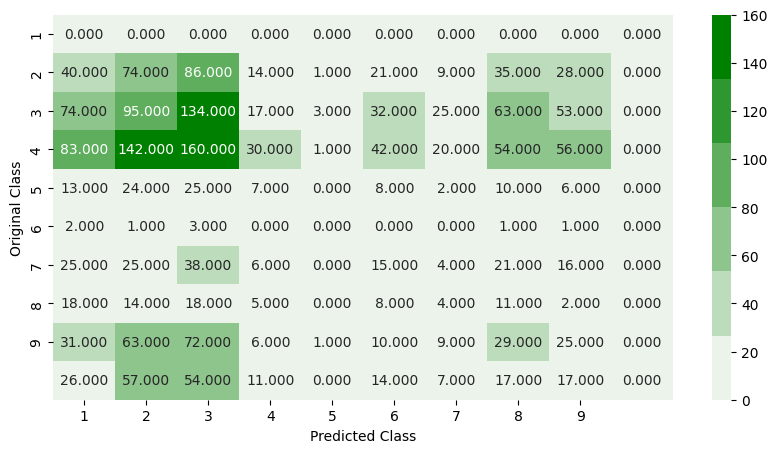

-------------------------------------------------- Precision matrix --------------------------------------------------


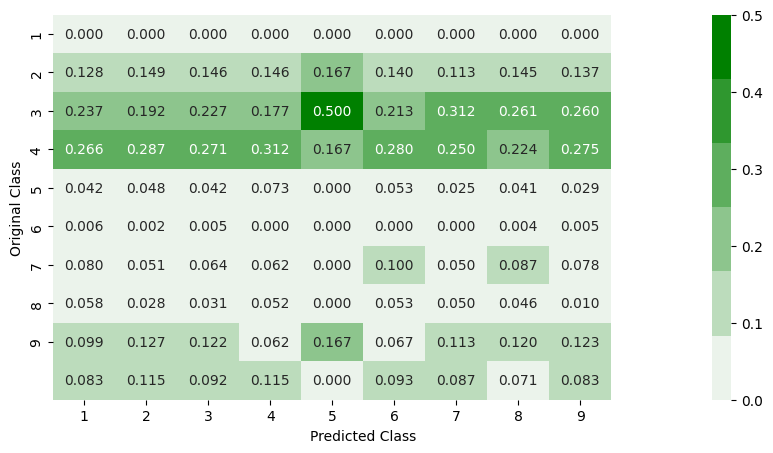

Sum of columns in precision matrix [ 1.  1.  1.  1.  1.  1.  1.  1.  1. nan]
-------------------------------------------------- Recall matrix --------------------------------------------------


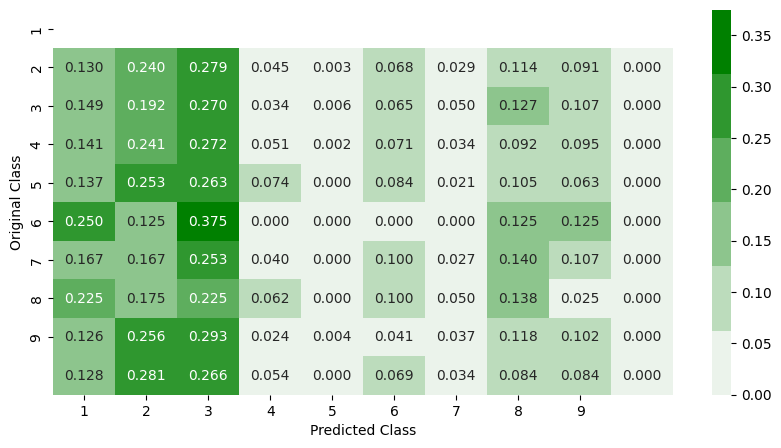

Sum of rows in precision matrix [nan  1.  1.  1.  1.  1.  1.  1.  1.  1.]


In [60]:
# http://xgboost.readthedocs.io/en/latest/python/python_api.html?#xgboost.XGBClassifier

n_est =random_cfl1.best_params_.get('n_estimators')
sub_s = random_cfl1.best_params_.get('subsample')
lrs_ = random_cfl1.best_params_.get('learning_rate')
bytree_ = random_cfl1.best_params_.get('colsample_bytree')
depth_ = random_cfl1.best_params_.get('max_depth')

x_cfl = XGBClassifier(n_estimators = n_est, max_depth = depth_, learning_rate = lrs_, colsample_bytree = bytree_, subsample = sub_s, nthread = -1)
x_cfl.fit(X_train_merge, y_train_merge, verbose = True)
sig_clf = CalibratedClassifierCV(x_cfl, method = 'sigmoid', n_jobs = -1)
sig_clf.fit(X_train_merge, y_train_merge)
    
predict_y = sig_clf.predict_proba(X_train_merge)
print ('For values of best alpha = ', alpha[best_alpha], 'The train log loss is : ', log_loss(y_train_merge, predict_y))
predict_y = sig_clf.predict_proba(X_cv_merge)
print('For values of best alpha = ', alpha[best_alpha], 'The cross validation log loss is : ', log_loss(y_cv_merge, predict_y))
predict_y = sig_clf.predict_proba(X_test_merge)
print('For values of best alpha = ', alpha[best_alpha], 'The test log loss is : ', log_loss(y_test_merge, predict_y))
plot_confusion_matrix(y_test_asm, sig_clf.predict(X_test_merge))

In [61]:
endsss_ = time.time()
f_time  = endsss_ - noww_
print(f' Total time in minutes :: {round(f_time/60, 2)} min')

 Total time in minutes :: 90.14 min
[CV 5/5; 2/10] START colsample_bytree=0.1, learning_rate=0.15, max_depth=3, n_estimators=2000, subsample=1
[CV 5/5; 2/10] END colsample_bytree=0.1, learning_rate=0.15, max_depth=3, n_estimators=2000, subsample=1;, score=0.998 total time= 1.4min
[CV 4/5; 5/10] START colsample_bytree=0.5, learning_rate=0.1, max_depth=10, n_estimators=500, subsample=1
[CV 4/5; 5/10] END colsample_bytree=0.5, learning_rate=0.1, max_depth=10, n_estimators=500, subsample=1;, score=0.996 total time= 2.7min
[CV 5/5; 9/10] START colsample_bytree=0.1, learning_rate=0.15, max_depth=10, n_estimators=500, subsample=1
[CV 5/5; 9/10] END colsample_bytree=0.1, learning_rate=0.15, max_depth=10, n_estimators=500, subsample=1;, score=0.996 total time=  34.0s
[CV 1/5; 2/10] START colsample_bytree=0.1, learning_rate=0.15, max_depth=3, n_estimators=2000, subsample=1
[CV 1/5; 2/10] END colsample_bytree=0.1, learning_rate=0.15, max_depth=3, n_estimators=2000, subsample=1;, score=0.993 total

 <br> <br> <br> <br> <br> <br> <br> <br>

<h1> 5. Assignment Part </h1>

## 1. Importing Libraries

In [1]:
import time
noww_ = time.time()

import os
import shutil
import pickle
import warnings
import codecs # this is used for file operations 

import glob
import matplotlib
import matplotlib.pyplot as plt

import random as r
import numpy as np
import pandas as pd
import seaborn as sns
from tqdm import tqdm

import multiprocessing
from multiprocessing import Process # this is used for multithreading

from scipy.sparse import vstack
from scipy.sparse import hstack
from scipy.sparse import load_npz
from scipy.sparse import save_npz
from scipy.sparse import csr_matrix

from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest

from sklearn.metrics import log_loss
from sklearn.metrics import confusion_matrix

from sklearn import preprocessing
from sklearn.manifold import TSNE
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.calibration import CalibratedClassifierCV
from sklearn.model_selection import RandomizedSearchCV

%matplotlib inline

## 2 Preprocessing Data

In [2]:
# https://stackoverflow.com/a/51932652

Y = pd.read_csv('trainLabels.csv')
files = os.listdir('byteFiles')
filenames = Y['Id'].tolist()
class_y = Y['Class'].tolist()
class_bytes, sizebytes, fnames = [], [], []

for file in files:
    statinfo = os.stat('byteFiles/' + file)
    file = file.split('.')[0]
    if any(file == filename for filename in filenames):
        i = filenames.index(file)
        class_bytes.append(class_y[i])
        sizebytes.append(statinfo.st_size / (1024.0*1024.0))
        fnames.append(file)
data_size_byte = pd.DataFrame({'ID' : fnames, 'size' : sizebytes, 'Class' : class_bytes})

### 2.1 Multiprocessing to generate unigrams

In [3]:
folder_1 = 'first'
folder_2 = 'second'
folder_3 = 'third'
folder_4 = 'fourth'
folder_5 = 'fifth'
folder_6 = 'sixth'
folder_7 = 'seventh'
folder_8 = 'eighth'
folder_9 =  'ninth'
folder_10 = 'tenth'
folder_11 = 'leven'
folder_12 = 'twel'

for i in [folder_1, folder_2, folder_3, folder_4, folder_5, folder_6, folder_7, folder_8, folder_9, folder_10, folder_11, folder_12]:
    if not os.path.isdir(i):
        os.makedirs(i)
        
byte_list = glob.glob('byteFiles/*')
r.shuffle(byte_list)

for i, file in enumerate(byte_list):
    if i % 12 == 0:
        shutil.move(file, 'first')
    elif i%12 == 1:
        shutil.move(file, 'second')
    elif i%12 == 2:
        shutil.move(file, 'third')
    elif i%12 == 3:
        shutil.move(file, 'fourth')
    elif i%12 == 4:
        shutil.move(file, 'fifth')
    elif i%12 == 5:
        shutil.move(file, 'sixth')
    elif i%12 == 6:
        shutil.move(file, 'seventh')
    elif i%12 == 7:
        shutil.move(file, 'eighth')
    elif i%12 == 8:
        shutil.move(file, 'ninth')
    elif i%12 == 9:
        shutil.move(file, 'tenth')
    elif i%12 == 10:
        shutil.move(file, 'leven')
    elif i%12 == 11:
        shutil.move(file, 'twel')

In [4]:
def firstprocess():
    files = os.listdir('first')
    filenames2 = []
    feature_matrix = np.zeros((len(files), 257),dtype = int)
    k = 0

    byte_feature_file = open('byteCSV/result_01.csv', 'w+')
    byte_feature_file.write("ID,0,1,2,3,4,5,6,7,8,9,0a,0b,0c,0d,0e,0f,10,11,12,13,14,15,16,17,18,19,1a,1b,1c,1d,1e,1f,20,21,22,23,24,25,26,27,28,29,2a,2b,2c,2d,2e,2f,30,31,32,33,34,35,36,37,38,39,3a,3b,3c,3d,3e,3f,40,41,42,43,44,45,46,47,48,49,4a,4b,4c,4d,4e,4f,50,51,52,53,54,55,56,57,58,59,5a,5b,5c,5d,5e,5f,60,61,62,63,64,65,66,67,68,69,6a,6b,6c,6d,6e,6f,70,71,72,73,74,75,76,77,78,79,7a,7b,7c,7d,7e,7f,80,81,82,83,84,85,86,87,88,89,8a,8b,8c,8d,8e,8f,90,91,92,93,94,95,96,97,98,99,9a,9b,9c,9d,9e,9f,a0,a1,a2,a3,a4,a5,a6,a7,a8,a9,aa,ab,ac,ad,ae,af,b0,b1,b2,b3,b4,b5,b6,b7,b8,b9,ba,bb,bc,bd,be,bf,c0,c1,c2,c3,c4,c5,c6,c7,c8,c9,ca,cb,cc,cd,ce,cf,d0,d1,d2,d3,d4,d5,d6,d7,d8,d9,da,db,dc,dd,de,df,e0,e1,e2,e3,e4,e5,e6,e7,e8,e9,ea,eb,ec,ed,ee,ef,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,fa,fb,fc,fd,fe,ff,??")
    byte_feature_file.write('\n')
    for file in tqdm(files):
        filenames2.append(file)
        byte_feature_file.write(file + ',')
        if(file.endswith('txt')):
            with open('first/' + file, 'r') as byte_flie:
                for lines in byte_flie:
                    line = lines.rstrip().split(' ')
                    for hex_code in line:
                        if hex_code == '??':
                            feature_matrix[k][256] += 1
                        else:
                            feature_matrix[k][int(hex_code,16)] += 1
            byte_flie.close()
        for i, row in enumerate(feature_matrix[k]):
            if i != len(feature_matrix[k]) - 1:
                byte_feature_file.write(str(row) + ',')
            else:
                byte_feature_file.write(str(row))
        byte_feature_file.write('\n')

        k += 1

    byte_feature_file.close()

def secondprocess():
    files = os.listdir('second')
    filenames2 = []
    feature_matrix = np.zeros((len(files), 257),dtype = int)
    k = 0

    byte_feature_file = open('byteCSV/result_02.csv', 'w+')
    byte_feature_file.write("ID,0,1,2,3,4,5,6,7,8,9,0a,0b,0c,0d,0e,0f,10,11,12,13,14,15,16,17,18,19,1a,1b,1c,1d,1e,1f,20,21,22,23,24,25,26,27,28,29,2a,2b,2c,2d,2e,2f,30,31,32,33,34,35,36,37,38,39,3a,3b,3c,3d,3e,3f,40,41,42,43,44,45,46,47,48,49,4a,4b,4c,4d,4e,4f,50,51,52,53,54,55,56,57,58,59,5a,5b,5c,5d,5e,5f,60,61,62,63,64,65,66,67,68,69,6a,6b,6c,6d,6e,6f,70,71,72,73,74,75,76,77,78,79,7a,7b,7c,7d,7e,7f,80,81,82,83,84,85,86,87,88,89,8a,8b,8c,8d,8e,8f,90,91,92,93,94,95,96,97,98,99,9a,9b,9c,9d,9e,9f,a0,a1,a2,a3,a4,a5,a6,a7,a8,a9,aa,ab,ac,ad,ae,af,b0,b1,b2,b3,b4,b5,b6,b7,b8,b9,ba,bb,bc,bd,be,bf,c0,c1,c2,c3,c4,c5,c6,c7,c8,c9,ca,cb,cc,cd,ce,cf,d0,d1,d2,d3,d4,d5,d6,d7,d8,d9,da,db,dc,dd,de,df,e0,e1,e2,e3,e4,e5,e6,e7,e8,e9,ea,eb,ec,ed,ee,ef,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,fa,fb,fc,fd,fe,ff,??")
    byte_feature_file.write('\n')
    for file in tqdm(files):
        filenames2.append(file)
        byte_feature_file.write(file + ',')
        if(file.endswith('txt')):
            with open('second/' + file, 'r') as byte_flie:
                for lines in byte_flie:
                    line = lines.rstrip().split(' ')
                    for hex_code in line:
                        if hex_code == '??':
                            feature_matrix[k][256] += 1
                        else:
                            feature_matrix[k][int(hex_code,16)] += 1
            byte_flie.close()
        for i, row in enumerate(feature_matrix[k]):
            if i != len(feature_matrix[k]) - 1:
                byte_feature_file.write(str(row) + ',')
            else:
                byte_feature_file.write(str(row))
        byte_feature_file.write('\n')

        k += 1

    byte_feature_file.close()

def thirdprocess():
    files = os.listdir('third')
    filenames2 = []
    feature_matrix = np.zeros((len(files), 257),dtype = int)
    k = 0

    byte_feature_file = open('byteCSV/result_03.csv', 'w+')
    byte_feature_file.write("ID,0,1,2,3,4,5,6,7,8,9,0a,0b,0c,0d,0e,0f,10,11,12,13,14,15,16,17,18,19,1a,1b,1c,1d,1e,1f,20,21,22,23,24,25,26,27,28,29,2a,2b,2c,2d,2e,2f,30,31,32,33,34,35,36,37,38,39,3a,3b,3c,3d,3e,3f,40,41,42,43,44,45,46,47,48,49,4a,4b,4c,4d,4e,4f,50,51,52,53,54,55,56,57,58,59,5a,5b,5c,5d,5e,5f,60,61,62,63,64,65,66,67,68,69,6a,6b,6c,6d,6e,6f,70,71,72,73,74,75,76,77,78,79,7a,7b,7c,7d,7e,7f,80,81,82,83,84,85,86,87,88,89,8a,8b,8c,8d,8e,8f,90,91,92,93,94,95,96,97,98,99,9a,9b,9c,9d,9e,9f,a0,a1,a2,a3,a4,a5,a6,a7,a8,a9,aa,ab,ac,ad,ae,af,b0,b1,b2,b3,b4,b5,b6,b7,b8,b9,ba,bb,bc,bd,be,bf,c0,c1,c2,c3,c4,c5,c6,c7,c8,c9,ca,cb,cc,cd,ce,cf,d0,d1,d2,d3,d4,d5,d6,d7,d8,d9,da,db,dc,dd,de,df,e0,e1,e2,e3,e4,e5,e6,e7,e8,e9,ea,eb,ec,ed,ee,ef,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,fa,fb,fc,fd,fe,ff,??")
    byte_feature_file.write('\n')
    for file in tqdm(files):
        filenames2.append(file)
        byte_feature_file.write(file + ',')
        if(file.endswith('txt')):
            with open('third/' + file, 'r') as byte_flie:
                for lines in byte_flie:
                    line = lines.rstrip().split(' ')
                    for hex_code in line:
                        if hex_code == '??':
                            feature_matrix[k][256] += 1
                        else:
                            feature_matrix[k][int(hex_code,16)] += 1
            byte_flie.close()
        for i, row in enumerate(feature_matrix[k]):
            if i != len(feature_matrix[k]) - 1:
                byte_feature_file.write(str(row) + ',')
            else:
                byte_feature_file.write(str(row))
        byte_feature_file.write('\n')

        k += 1

    byte_feature_file.close()

def fourthprocess():
    files = os.listdir('fourth')
    filenames2 = []
    feature_matrix = np.zeros((len(files), 257),dtype = int)
    k = 0

    byte_feature_file = open('byteCSV/result_04.csv', 'w+')
    byte_feature_file.write("ID,0,1,2,3,4,5,6,7,8,9,0a,0b,0c,0d,0e,0f,10,11,12,13,14,15,16,17,18,19,1a,1b,1c,1d,1e,1f,20,21,22,23,24,25,26,27,28,29,2a,2b,2c,2d,2e,2f,30,31,32,33,34,35,36,37,38,39,3a,3b,3c,3d,3e,3f,40,41,42,43,44,45,46,47,48,49,4a,4b,4c,4d,4e,4f,50,51,52,53,54,55,56,57,58,59,5a,5b,5c,5d,5e,5f,60,61,62,63,64,65,66,67,68,69,6a,6b,6c,6d,6e,6f,70,71,72,73,74,75,76,77,78,79,7a,7b,7c,7d,7e,7f,80,81,82,83,84,85,86,87,88,89,8a,8b,8c,8d,8e,8f,90,91,92,93,94,95,96,97,98,99,9a,9b,9c,9d,9e,9f,a0,a1,a2,a3,a4,a5,a6,a7,a8,a9,aa,ab,ac,ad,ae,af,b0,b1,b2,b3,b4,b5,b6,b7,b8,b9,ba,bb,bc,bd,be,bf,c0,c1,c2,c3,c4,c5,c6,c7,c8,c9,ca,cb,cc,cd,ce,cf,d0,d1,d2,d3,d4,d5,d6,d7,d8,d9,da,db,dc,dd,de,df,e0,e1,e2,e3,e4,e5,e6,e7,e8,e9,ea,eb,ec,ed,ee,ef,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,fa,fb,fc,fd,fe,ff,??")
    byte_feature_file.write('\n')
    for file in tqdm(files):
        filenames2.append(file)
        byte_feature_file.write(file + ',')
        if(file.endswith('txt')):
            with open('fourth/' + file, 'r') as byte_flie:
                for lines in byte_flie:
                    line = lines.rstrip().split(' ')
                    for hex_code in line:
                        if hex_code == '??':
                            feature_matrix[k][256] += 1
                        else:
                            feature_matrix[k][int(hex_code,16)] += 1
            byte_flie.close()
        for i, row in enumerate(feature_matrix[k]):
            if i != len(feature_matrix[k]) - 1:
                byte_feature_file.write(str(row) + ',')
            else:
                byte_feature_file.write(str(row))
        byte_feature_file.write('\n')

        k += 1

    byte_feature_file.close()

def fifthprocess():
    files = os.listdir('fifth')
    filenames2 = []
    feature_matrix = np.zeros((len(files), 257),dtype = int)
    k = 0

    byte_feature_file = open('byteCSV/result_05.csv', 'w+')
    byte_feature_file.write("ID,0,1,2,3,4,5,6,7,8,9,0a,0b,0c,0d,0e,0f,10,11,12,13,14,15,16,17,18,19,1a,1b,1c,1d,1e,1f,20,21,22,23,24,25,26,27,28,29,2a,2b,2c,2d,2e,2f,30,31,32,33,34,35,36,37,38,39,3a,3b,3c,3d,3e,3f,40,41,42,43,44,45,46,47,48,49,4a,4b,4c,4d,4e,4f,50,51,52,53,54,55,56,57,58,59,5a,5b,5c,5d,5e,5f,60,61,62,63,64,65,66,67,68,69,6a,6b,6c,6d,6e,6f,70,71,72,73,74,75,76,77,78,79,7a,7b,7c,7d,7e,7f,80,81,82,83,84,85,86,87,88,89,8a,8b,8c,8d,8e,8f,90,91,92,93,94,95,96,97,98,99,9a,9b,9c,9d,9e,9f,a0,a1,a2,a3,a4,a5,a6,a7,a8,a9,aa,ab,ac,ad,ae,af,b0,b1,b2,b3,b4,b5,b6,b7,b8,b9,ba,bb,bc,bd,be,bf,c0,c1,c2,c3,c4,c5,c6,c7,c8,c9,ca,cb,cc,cd,ce,cf,d0,d1,d2,d3,d4,d5,d6,d7,d8,d9,da,db,dc,dd,de,df,e0,e1,e2,e3,e4,e5,e6,e7,e8,e9,ea,eb,ec,ed,ee,ef,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,fa,fb,fc,fd,fe,ff,??")
    byte_feature_file.write('\n')
    for file in tqdm(files):
        filenames2.append(file)
        byte_feature_file.write(file + ',')
        if(file.endswith('txt')):
            with open('fifth/' + file, 'r') as byte_flie:
                for lines in byte_flie:
                    line = lines.rstrip().split(' ')
                    for hex_code in line:
                        if hex_code == '??':
                            feature_matrix[k][256] += 1
                        else:
                            feature_matrix[k][int(hex_code,16)] += 1
            byte_flie.close()
        for i, row in enumerate(feature_matrix[k]):
            if i != len(feature_matrix[k]) - 1:
                byte_feature_file.write(str(row) + ',')
            else:
                byte_feature_file.write(str(row))
        byte_feature_file.write('\n')

        k += 1

    byte_feature_file.close()

def sixthprocess():
    files = os.listdir('sixth')
    filenames2 = []
    feature_matrix = np.zeros((len(files), 257),dtype = int)
    k = 0

    byte_feature_file = open('byteCSV/result_06.csv', 'w+')
    byte_feature_file.write("ID,0,1,2,3,4,5,6,7,8,9,0a,0b,0c,0d,0e,0f,10,11,12,13,14,15,16,17,18,19,1a,1b,1c,1d,1e,1f,20,21,22,23,24,25,26,27,28,29,2a,2b,2c,2d,2e,2f,30,31,32,33,34,35,36,37,38,39,3a,3b,3c,3d,3e,3f,40,41,42,43,44,45,46,47,48,49,4a,4b,4c,4d,4e,4f,50,51,52,53,54,55,56,57,58,59,5a,5b,5c,5d,5e,5f,60,61,62,63,64,65,66,67,68,69,6a,6b,6c,6d,6e,6f,70,71,72,73,74,75,76,77,78,79,7a,7b,7c,7d,7e,7f,80,81,82,83,84,85,86,87,88,89,8a,8b,8c,8d,8e,8f,90,91,92,93,94,95,96,97,98,99,9a,9b,9c,9d,9e,9f,a0,a1,a2,a3,a4,a5,a6,a7,a8,a9,aa,ab,ac,ad,ae,af,b0,b1,b2,b3,b4,b5,b6,b7,b8,b9,ba,bb,bc,bd,be,bf,c0,c1,c2,c3,c4,c5,c6,c7,c8,c9,ca,cb,cc,cd,ce,cf,d0,d1,d2,d3,d4,d5,d6,d7,d8,d9,da,db,dc,dd,de,df,e0,e1,e2,e3,e4,e5,e6,e7,e8,e9,ea,eb,ec,ed,ee,ef,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,fa,fb,fc,fd,fe,ff,??")
    byte_feature_file.write('\n')
    for file in tqdm(files):
        filenames2.append(file)
        byte_feature_file.write(file + ',')
        if(file.endswith('txt')):
            with open('sixth/' + file, 'r') as byte_flie:
                for lines in byte_flie:
                    line = lines.rstrip().split(' ')
                    for hex_code in line:
                        if hex_code == '??':
                            feature_matrix[k][256] += 1
                        else:
                            feature_matrix[k][int(hex_code,16)] += 1
            byte_flie.close()
        for i, row in enumerate(feature_matrix[k]):
            if i != len(feature_matrix[k]) - 1:
                byte_feature_file.write(str(row) + ',')
            else:
                byte_feature_file.write(str(row))
        byte_feature_file.write('\n')

        k += 1

    byte_feature_file.close()

def seventhprocess():
    files = os.listdir('seventh')
    filenames2 = []
    feature_matrix = np.zeros((len(files), 257),dtype = int)
    k = 0

    byte_feature_file = open('byteCSV/result_07.csv', 'w+')
    byte_feature_file.write("ID,0,1,2,3,4,5,6,7,8,9,0a,0b,0c,0d,0e,0f,10,11,12,13,14,15,16,17,18,19,1a,1b,1c,1d,1e,1f,20,21,22,23,24,25,26,27,28,29,2a,2b,2c,2d,2e,2f,30,31,32,33,34,35,36,37,38,39,3a,3b,3c,3d,3e,3f,40,41,42,43,44,45,46,47,48,49,4a,4b,4c,4d,4e,4f,50,51,52,53,54,55,56,57,58,59,5a,5b,5c,5d,5e,5f,60,61,62,63,64,65,66,67,68,69,6a,6b,6c,6d,6e,6f,70,71,72,73,74,75,76,77,78,79,7a,7b,7c,7d,7e,7f,80,81,82,83,84,85,86,87,88,89,8a,8b,8c,8d,8e,8f,90,91,92,93,94,95,96,97,98,99,9a,9b,9c,9d,9e,9f,a0,a1,a2,a3,a4,a5,a6,a7,a8,a9,aa,ab,ac,ad,ae,af,b0,b1,b2,b3,b4,b5,b6,b7,b8,b9,ba,bb,bc,bd,be,bf,c0,c1,c2,c3,c4,c5,c6,c7,c8,c9,ca,cb,cc,cd,ce,cf,d0,d1,d2,d3,d4,d5,d6,d7,d8,d9,da,db,dc,dd,de,df,e0,e1,e2,e3,e4,e5,e6,e7,e8,e9,ea,eb,ec,ed,ee,ef,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,fa,fb,fc,fd,fe,ff,??")
    byte_feature_file.write('\n')
    for file in tqdm(files):
        filenames2.append(file)
        byte_feature_file.write(file + ',')
        if(file.endswith('txt')):
            with open('seventh/' + file, 'r') as byte_flie:
                for lines in byte_flie:
                    line = lines.rstrip().split(' ')
                    for hex_code in line:
                        if hex_code == '??':
                            feature_matrix[k][256] += 1
                        else:
                            feature_matrix[k][int(hex_code,16)] += 1
            byte_flie.close()
        for i, row in enumerate(feature_matrix[k]):
            if i != len(feature_matrix[k]) - 1:
                byte_feature_file.write(str(row) + ',')
            else:
                byte_feature_file.write(str(row))
        byte_feature_file.write('\n')

        k += 1

    byte_feature_file.close()

def eighthprocess():
    files = os.listdir('eighth')
    filenames2 = []
    feature_matrix = np.zeros((len(files), 257),dtype = int)
    k = 0

    byte_feature_file = open('byteCSV/result_08.csv', 'w+')
    byte_feature_file.write("ID,0,1,2,3,4,5,6,7,8,9,0a,0b,0c,0d,0e,0f,10,11,12,13,14,15,16,17,18,19,1a,1b,1c,1d,1e,1f,20,21,22,23,24,25,26,27,28,29,2a,2b,2c,2d,2e,2f,30,31,32,33,34,35,36,37,38,39,3a,3b,3c,3d,3e,3f,40,41,42,43,44,45,46,47,48,49,4a,4b,4c,4d,4e,4f,50,51,52,53,54,55,56,57,58,59,5a,5b,5c,5d,5e,5f,60,61,62,63,64,65,66,67,68,69,6a,6b,6c,6d,6e,6f,70,71,72,73,74,75,76,77,78,79,7a,7b,7c,7d,7e,7f,80,81,82,83,84,85,86,87,88,89,8a,8b,8c,8d,8e,8f,90,91,92,93,94,95,96,97,98,99,9a,9b,9c,9d,9e,9f,a0,a1,a2,a3,a4,a5,a6,a7,a8,a9,aa,ab,ac,ad,ae,af,b0,b1,b2,b3,b4,b5,b6,b7,b8,b9,ba,bb,bc,bd,be,bf,c0,c1,c2,c3,c4,c5,c6,c7,c8,c9,ca,cb,cc,cd,ce,cf,d0,d1,d2,d3,d4,d5,d6,d7,d8,d9,da,db,dc,dd,de,df,e0,e1,e2,e3,e4,e5,e6,e7,e8,e9,ea,eb,ec,ed,ee,ef,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,fa,fb,fc,fd,fe,ff,??")
    byte_feature_file.write('\n')
    for file in tqdm(files):
        filenames2.append(file)
        byte_feature_file.write(file + ',')
        if(file.endswith('txt')):
            with open('eighth/' + file, 'r') as byte_flie:
                for lines in byte_flie:
                    line = lines.rstrip().split(' ')
                    for hex_code in line:
                        if hex_code == '??':
                            feature_matrix[k][256] += 1
                        else:
                            feature_matrix[k][int(hex_code,16)] += 1
            byte_flie.close()
        for i, row in enumerate(feature_matrix[k]):
            if i != len(feature_matrix[k]) - 1:
                byte_feature_file.write(str(row) + ',')
            else:
                byte_feature_file.write(str(row))
        byte_feature_file.write('\n')

        k += 1

    byte_feature_file.close()

def ninthprocess():
    files = os.listdir('ninth')
    filenames2 = []
    feature_matrix = np.zeros((len(files), 257),dtype = int)
    k = 0

    byte_feature_file = open('byteCSV/result_09.csv', 'w+')
    byte_feature_file.write("ID,0,1,2,3,4,5,6,7,8,9,0a,0b,0c,0d,0e,0f,10,11,12,13,14,15,16,17,18,19,1a,1b,1c,1d,1e,1f,20,21,22,23,24,25,26,27,28,29,2a,2b,2c,2d,2e,2f,30,31,32,33,34,35,36,37,38,39,3a,3b,3c,3d,3e,3f,40,41,42,43,44,45,46,47,48,49,4a,4b,4c,4d,4e,4f,50,51,52,53,54,55,56,57,58,59,5a,5b,5c,5d,5e,5f,60,61,62,63,64,65,66,67,68,69,6a,6b,6c,6d,6e,6f,70,71,72,73,74,75,76,77,78,79,7a,7b,7c,7d,7e,7f,80,81,82,83,84,85,86,87,88,89,8a,8b,8c,8d,8e,8f,90,91,92,93,94,95,96,97,98,99,9a,9b,9c,9d,9e,9f,a0,a1,a2,a3,a4,a5,a6,a7,a8,a9,aa,ab,ac,ad,ae,af,b0,b1,b2,b3,b4,b5,b6,b7,b8,b9,ba,bb,bc,bd,be,bf,c0,c1,c2,c3,c4,c5,c6,c7,c8,c9,ca,cb,cc,cd,ce,cf,d0,d1,d2,d3,d4,d5,d6,d7,d8,d9,da,db,dc,dd,de,df,e0,e1,e2,e3,e4,e5,e6,e7,e8,e9,ea,eb,ec,ed,ee,ef,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,fa,fb,fc,fd,fe,ff,??")
    byte_feature_file.write('\n')
    for file in tqdm(files):
        filenames2.append(file)
        byte_feature_file.write(file + ',')
        if(file.endswith('txt')):
            with open('ninth/' + file, 'r') as byte_flie:
                for lines in byte_flie:
                    line = lines.rstrip().split(' ')
                    for hex_code in line:
                        if hex_code == '??':
                            feature_matrix[k][256] += 1
                        else:
                            feature_matrix[k][int(hex_code,16)] += 1
            byte_flie.close()
        for i, row in enumerate(feature_matrix[k]):
            if i != len(feature_matrix[k]) - 1:
                byte_feature_file.write(str(row) + ',')
            else:
                byte_feature_file.write(str(row))
        byte_feature_file.write('\n')

        k += 1

    byte_feature_file.close()

def tenthprocess():
    files = os.listdir('tenth')
    filenames2 = []
    feature_matrix = np.zeros((len(files), 257),dtype = int)
    k = 0

    byte_feature_file = open('byteCSV/result_10.csv', 'w+')
    byte_feature_file.write("ID,0,1,2,3,4,5,6,7,8,9,0a,0b,0c,0d,0e,0f,10,11,12,13,14,15,16,17,18,19,1a,1b,1c,1d,1e,1f,20,21,22,23,24,25,26,27,28,29,2a,2b,2c,2d,2e,2f,30,31,32,33,34,35,36,37,38,39,3a,3b,3c,3d,3e,3f,40,41,42,43,44,45,46,47,48,49,4a,4b,4c,4d,4e,4f,50,51,52,53,54,55,56,57,58,59,5a,5b,5c,5d,5e,5f,60,61,62,63,64,65,66,67,68,69,6a,6b,6c,6d,6e,6f,70,71,72,73,74,75,76,77,78,79,7a,7b,7c,7d,7e,7f,80,81,82,83,84,85,86,87,88,89,8a,8b,8c,8d,8e,8f,90,91,92,93,94,95,96,97,98,99,9a,9b,9c,9d,9e,9f,a0,a1,a2,a3,a4,a5,a6,a7,a8,a9,aa,ab,ac,ad,ae,af,b0,b1,b2,b3,b4,b5,b6,b7,b8,b9,ba,bb,bc,bd,be,bf,c0,c1,c2,c3,c4,c5,c6,c7,c8,c9,ca,cb,cc,cd,ce,cf,d0,d1,d2,d3,d4,d5,d6,d7,d8,d9,da,db,dc,dd,de,df,e0,e1,e2,e3,e4,e5,e6,e7,e8,e9,ea,eb,ec,ed,ee,ef,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,fa,fb,fc,fd,fe,ff,??")
    byte_feature_file.write('\n')
    for file in tqdm(files):
        filenames2.append(file)
        byte_feature_file.write(file + ',')
        if(file.endswith('txt')):
            with open('tenth/' + file, 'r') as byte_flie:
                for lines in byte_flie:
                    line = lines.rstrip().split(' ')
                    for hex_code in line:
                        if hex_code == '??':
                            feature_matrix[k][256] += 1
                        else:
                            feature_matrix[k][int(hex_code,16)] += 1
            byte_flie.close()
        for i, row in enumerate(feature_matrix[k]):
            if i != len(feature_matrix[k]) - 1:
                byte_feature_file.write(str(row) + ',')
            else:
                byte_feature_file.write(str(row))
        byte_feature_file.write('\n')

        k += 1

    byte_feature_file.close()

def leventhprocess():
    files = os.listdir('leven')
    filenames2 = []
    feature_matrix = np.zeros((len(files), 257),dtype = int)
    k = 0

    byte_feature_file = open('byteCSV/result_11.csv', 'w+')
    byte_feature_file.write("ID,0,1,2,3,4,5,6,7,8,9,0a,0b,0c,0d,0e,0f,10,11,12,13,14,15,16,17,18,19,1a,1b,1c,1d,1e,1f,20,21,22,23,24,25,26,27,28,29,2a,2b,2c,2d,2e,2f,30,31,32,33,34,35,36,37,38,39,3a,3b,3c,3d,3e,3f,40,41,42,43,44,45,46,47,48,49,4a,4b,4c,4d,4e,4f,50,51,52,53,54,55,56,57,58,59,5a,5b,5c,5d,5e,5f,60,61,62,63,64,65,66,67,68,69,6a,6b,6c,6d,6e,6f,70,71,72,73,74,75,76,77,78,79,7a,7b,7c,7d,7e,7f,80,81,82,83,84,85,86,87,88,89,8a,8b,8c,8d,8e,8f,90,91,92,93,94,95,96,97,98,99,9a,9b,9c,9d,9e,9f,a0,a1,a2,a3,a4,a5,a6,a7,a8,a9,aa,ab,ac,ad,ae,af,b0,b1,b2,b3,b4,b5,b6,b7,b8,b9,ba,bb,bc,bd,be,bf,c0,c1,c2,c3,c4,c5,c6,c7,c8,c9,ca,cb,cc,cd,ce,cf,d0,d1,d2,d3,d4,d5,d6,d7,d8,d9,da,db,dc,dd,de,df,e0,e1,e2,e3,e4,e5,e6,e7,e8,e9,ea,eb,ec,ed,ee,ef,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,fa,fb,fc,fd,fe,ff,??")
    byte_feature_file.write('\n')
    for file in tqdm(files):
        filenames2.append(file)
        byte_feature_file.write(file + ',')
        if(file.endswith('txt')):
            with open('leven/' + file, 'r') as byte_flie:
                for lines in byte_flie:
                    line = lines.rstrip().split(' ')
                    for hex_code in line:
                        if hex_code == '??':
                            feature_matrix[k][256] += 1
                        else:
                            feature_matrix[k][int(hex_code,16)] += 1
            byte_flie.close()
        for i, row in enumerate(feature_matrix[k]):
            if i != len(feature_matrix[k]) - 1:
                byte_feature_file.write(str(row) + ',')
            else:
                byte_feature_file.write(str(row))
        byte_feature_file.write('\n')

        k += 1

    byte_feature_file.close()
    
def twelthprocess():
    files = os.listdir('twel')
    filenames2 = []
    feature_matrix = np.zeros((len(files), 257),dtype = int)
    k = 0

    byte_feature_file = open('byteCSV/result_12.csv', 'w+')
    byte_feature_file.write("ID,0,1,2,3,4,5,6,7,8,9,0a,0b,0c,0d,0e,0f,10,11,12,13,14,15,16,17,18,19,1a,1b,1c,1d,1e,1f,20,21,22,23,24,25,26,27,28,29,2a,2b,2c,2d,2e,2f,30,31,32,33,34,35,36,37,38,39,3a,3b,3c,3d,3e,3f,40,41,42,43,44,45,46,47,48,49,4a,4b,4c,4d,4e,4f,50,51,52,53,54,55,56,57,58,59,5a,5b,5c,5d,5e,5f,60,61,62,63,64,65,66,67,68,69,6a,6b,6c,6d,6e,6f,70,71,72,73,74,75,76,77,78,79,7a,7b,7c,7d,7e,7f,80,81,82,83,84,85,86,87,88,89,8a,8b,8c,8d,8e,8f,90,91,92,93,94,95,96,97,98,99,9a,9b,9c,9d,9e,9f,a0,a1,a2,a3,a4,a5,a6,a7,a8,a9,aa,ab,ac,ad,ae,af,b0,b1,b2,b3,b4,b5,b6,b7,b8,b9,ba,bb,bc,bd,be,bf,c0,c1,c2,c3,c4,c5,c6,c7,c8,c9,ca,cb,cc,cd,ce,cf,d0,d1,d2,d3,d4,d5,d6,d7,d8,d9,da,db,dc,dd,de,df,e0,e1,e2,e3,e4,e5,e6,e7,e8,e9,ea,eb,ec,ed,ee,ef,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,fa,fb,fc,fd,fe,ff,??")
    byte_feature_file.write('\n')
    for file in tqdm(files):
        filenames2.append(file)
        byte_feature_file.write(file + ',')
        if(file.endswith('txt')):
            with open('twel/' + file, 'r') as byte_flie:
                for lines in byte_flie:
                    line = lines.rstrip().split(' ')
                    for hex_code in line:
                        if hex_code == '??':
                            feature_matrix[k][256] += 1
                        else:
                            feature_matrix[k][int(hex_code,16)] += 1
            byte_flie.close()
        for i, row in enumerate(feature_matrix[k]):
            if i != len(feature_matrix[k]) - 1:
                byte_feature_file.write(str(row) + ',')
            else:
                byte_feature_file.write(str(row))
        byte_feature_file.write('\n')

        k += 1

    byte_feature_file.close()
    
def main():
    manager = multiprocessing.Manager()
    p1 = Process(target = firstprocess)
    p2 = Process(target = secondprocess)
    p3 = Process(target = thirdprocess)
    p4 = Process(target = fourthprocess)
    p5 = Process(target = fifthprocess)
    p6 = Process(target = sixthprocess)
    p7 = Process(target = seventhprocess)
    p8 = Process(target = eighthprocess)
    p9 = Process(target = ninthprocess)
    p10 = Process(target = tenthprocess)
    p11 = Process(target = leventhprocess)
    p12 = Process(target = twelthprocess)
    
    p1.start()
    p2.start()
    p3.start()
    p4.start()
    p5.start()
    p6.start()
    p7.start()
    p8.start()
    p9.start()
    p10.start()
    p11.start()
    p12.start()
    
    p1.join()
    p2.join()
    p3.join()
    p4.join()
    p5.join()
    p6.join()
    p7.join()
    p8.join()
    p9.join()
    p10.join()
    p11.join()
    p12.join()

if __name__=="__main__":
    main()

100%|██████████████████████████████████████████████████████████████| 906/906 [22:12<00:00,  1.47s/it]


In [5]:
# https://stackoverflow.com/a/21232849

all_files = sorted(glob.glob('byteCSV/result_*.csv'))
li = [pd.read_csv(filename, index_col=None, header=0) for filename in all_files] 
byte_features = pd.concat(li, axis=0, ignore_index=True)
byte_features.to_csv('byteCSV/result.csv', index = False)
byte_features.head()

ID       0      1      2      3      4      5      6  \
0  c4yn0XBgpDwveZboYESr.txt   20585   1360    778    883   1216    529    445   
1  cHDLN8VJzG1XuZhrsxyn.txt   14700   8356   6168   6013   5949   6220   6220   
2  ACsEI5cSDYPJNXuLfnB7.txt   13448    620    517    587    447    376    288   
3  aFSCmbvwe7HErAuPTQp2.txt  105347  79489  78717  80642  11892  11337  10556   
4  5FBEHZIJrAUjeozKVYmM.txt   72372  25187  22424  22124   4371   2488   2747   

      7      8  ...    f7     f8    f9    fa    fb     fc    fd     fe     ff  \
0   625   2256  ...   301    587   247   213   172    783   524    521   7495   
1  6311   6258  ...  6114   6045  6000  5912  6148   6196  6347   6060   9544   
2   455    346  ...   400    362   322   448   374    326   298    349   1102   
3  9618  10607  ...   347  10108   226   150   222  10477   299  11058  52697   
4  2449   4843  ...  2120   2459  1780  1330  1547   2405  1735   2510  26042   

        ??  
0    17588  
1  1518748  
2    11800  
3     7472  
4     9580  

[5 rows x 258 columns]

In [6]:
# byte_features = pd.read_csv('result.csv')
byte_features['ID']  = byte_features['ID'].str.split('.').str[0]
byte_features.head(2)

ID      0     1     2     3     4     5     6     7  \
0  c4yn0XBgpDwveZboYESr  20585  1360   778   883  1216   529   445   625   
1  cHDLN8VJzG1XuZhrsxyn  14700  8356  6168  6013  5949  6220  6220  6311   

      8  ...    f7    f8    f9    fa    fb    fc    fd    fe    ff       ??  
0  2256  ...   301   587   247   213   172   783   524   521  7495    17588  
1  6258  ...  6114  6045  6000  5912  6148  6196  6347  6060  9544  1518748  

[2 rows x 258 columns]

In [7]:
data_size_byte.head(2)

ID      size  Class
0  f7YPy6jIpSWrhDlzwFXQ  2.496094      1
1  catrJpdjF4qNw2UePAQL  5.144531      2

In [8]:
byte_features_with_size = byte_features.merge(data_size_byte, on = 'ID')
byte_features_with_size.to_csv('result_with_size.csv')
byte_features_with_size.head(2)

ID      0     1     2     3     4     5     6     7  \
0  c4yn0XBgpDwveZboYESr  20585  1360   778   883  1216   529   445   625   
1  cHDLN8VJzG1XuZhrsxyn  14700  8356  6168  6013  5949  6220  6220  6311   

      8  ...    f9    fa    fb    fc    fd    fe    ff       ??      size  \
0  2256  ...   247   213   172   783   524   521  7495    17588  0.914062   
1  6258  ...  6000  5912  6148  6196  6347  6060  9544  1518748  8.941406   

   Class  
0      2  
1      3  

[2 rows x 260 columns]

In [9]:
# https://stackoverflow.com/a/29651514
def normalize(df):
    result1 = df.copy()
    for feature_name in df.columns:
        if (str(feature_name) != str('ID') and str(feature_name) != str('Class')):
            max_value = df[feature_name].max()
            min_value = df[feature_name].min()
            result1[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
    return result1
result = normalize(byte_features_with_size)

data_y = result['Class']

with open('result_df.pickle', 'wb') as handle:
    pickle.dump(result, handle, protocol=pickle.HIGHEST_PROTOCOL)

result.head(2)

ID         0         1         2         3         4  \
0  c4yn0XBgpDwveZboYESr  0.008988  0.001915  0.000433  0.000476  0.000744   
1  cHDLN8VJzG1XuZhrsxyn  0.006418  0.011764  0.003432  0.003244  0.003642   

          5         6         7         8  ...        f9        fa        fb  \
0  0.000299  0.000251  0.000575  0.002007  ...  0.001080  0.000869  0.000757   
1  0.003520  0.003506  0.005808  0.005568  ...  0.026236  0.024133  0.027065   

         fc        fd        fe        ff        ??      size  Class  
0  0.009006  0.002460  0.002709  0.010218  0.001242  0.018745      2  
1  0.071269  0.029798  0.031514  0.013012  0.107215  0.201100      3  

[2 rows x 260 columns]

### 2.2 Multiprocessing to generate bigrams

In [10]:
# https://www.sciencedirect.com/topics/engineering/hexadecimal

hex_vals = '0,1,2,3,4,5,6,7,8,9,a,b,c,d,e,f'

unigram = [i+j for i in hex_vals.split(',') for j in hex_vals.split(',')]
unigram.append('??')

bigram = [f'{i} {j}' for i in unigram for j in unigram]

In [11]:
# https://stackoverflow.com/a/8980156

def firstprocess():
    files = glob.glob('first/*')
    
    csr_rows = len(files)
    csr_cols = len(bigram)
    
    contV = CountVectorizer(lowercase= False, ngram_range=(2, 2),  vocabulary = bigram)
    csr_mat = csr_matrix((csr_rows, csr_cols))
    
    for idx, file in tqdm(enumerate(files), total = csr_rows):
        with open(file) as f:
            csr_mat[idx, :] +=  csr_matrix(contV.fit_transform([f.read().replace('\n', ' ').lower()]))
    
    save_npz('byteCSR/first.npz', csr_mat)
    
def secondprocess():
    files = glob.glob('second/*')
    
    csr_rows = len(files)
    csr_cols = len(bigram)
    
    contV = CountVectorizer(lowercase= False, ngram_range=(2, 2),  vocabulary = bigram)
    csr_mat = csr_matrix((csr_rows, csr_cols))
    
    for idx, file in tqdm(enumerate(files), total = csr_rows):
        with open(file) as f:
            csr_mat[idx, :] +=  csr_matrix(contV.fit_transform([f.read().replace('\n', ' ').lower()]))
    
    save_npz('byteCSR/second.npz', csr_mat)
    
def thirdprocess():
    files = glob.glob('third/*')
    
    csr_rows = len(files)
    csr_cols = len(bigram)
    
    contV = CountVectorizer(lowercase= False, ngram_range=(2, 2),  vocabulary = bigram)
    csr_mat = csr_matrix((csr_rows, csr_cols))
    
    for idx, file in tqdm(enumerate(files), total = csr_rows):
        with open(file) as f:
            csr_mat[idx, :] +=  csr_matrix(contV.fit_transform([f.read().replace('\n', ' ').lower()]))
    
    save_npz('byteCSR/third.npz', csr_mat)
    
def fourthprocess():
    files = glob.glob('fourth/*')
    
    csr_rows = len(files)
    csr_cols = len(bigram)
    
    contV = CountVectorizer(lowercase= False, ngram_range=(2, 2),  vocabulary = bigram)
    csr_mat = csr_matrix((csr_rows, csr_cols))
    
    for idx, file in tqdm(enumerate(files), total = csr_rows):
        with open(file) as f:
            csr_mat[idx, :] +=  csr_matrix(contV.fit_transform([f.read().replace('\n', ' ').lower()]))
    
    save_npz('byteCSR/fourth.npz', csr_mat)
    
def fifthprocess():
    files = glob.glob('fifth/*')
    
    csr_rows = len(files)
    csr_cols = len(bigram)
    
    contV = CountVectorizer(lowercase= False, ngram_range=(2, 2),  vocabulary = bigram)
    csr_mat = csr_matrix((csr_rows, csr_cols))
    
    for idx, file in tqdm(enumerate(files), total = csr_rows):
        with open(file) as f:
            csr_mat[idx, :] +=  csr_matrix(contV.fit_transform([f.read().replace('\n', ' ').lower()]))
    
    save_npz('byteCSR/fifth.npz', csr_mat)
    
def sixthprocess():
    files = glob.glob('sixth/*')
    
    csr_rows = len(files)
    csr_cols = len(bigram)
    
    contV = CountVectorizer(lowercase= False, ngram_range=(2, 2),  vocabulary = bigram)
    csr_mat = csr_matrix((csr_rows, csr_cols))
    
    for idx, file in tqdm(enumerate(files), total = csr_rows):
        with open(file) as f:
            csr_mat[idx, :] +=  csr_matrix(contV.fit_transform([f.read().replace('\n', ' ').lower()]))
    
    save_npz('byteCSR/sixth.npz', csr_mat)
    
def seventhprocess():
    files = glob.glob('seventh/*')
    
    csr_rows = len(files)
    csr_cols = len(bigram)
    
    contV = CountVectorizer(lowercase= False, ngram_range=(2, 2),  vocabulary = bigram)
    csr_mat = csr_matrix((csr_rows, csr_cols))
    
    for idx, file in tqdm(enumerate(files), total = csr_rows):
        with open(file) as f:
            csr_mat[idx, :] +=  csr_matrix(contV.fit_transform([f.read().replace('\n', ' ').lower()]))
    
    save_npz('byteCSR/seventh.npz', csr_mat)
    
def eighthprocess():
    files = glob.glob('eighth/*')
    
    csr_rows = len(files)
    csr_cols = len(bigram)
    
    contV = CountVectorizer(lowercase= False, ngram_range=(2, 2),  vocabulary = bigram)
    csr_mat = csr_matrix((csr_rows, csr_cols))
    
    for idx, file in tqdm(enumerate(files), total = csr_rows):
        with open(file) as f:
            csr_mat[idx, :] +=  csr_matrix(contV.fit_transform([f.read().replace('\n', ' ').lower()]))
    
    save_npz('byteCSR/eighth.npz', csr_mat)
    
def ninthprocess():
    files = glob.glob('ninth/*')
    
    csr_rows = len(files)
    csr_cols = len(bigram)
    
    contV = CountVectorizer(lowercase= False, ngram_range=(2, 2),  vocabulary = bigram)
    csr_mat = csr_matrix((csr_rows, csr_cols))
    
    for idx, file in tqdm(enumerate(files), total = csr_rows):
        with open(file) as f:
            csr_mat[idx, :] +=  csr_matrix(contV.fit_transform([f.read().replace('\n', ' ').lower()]))
    
    save_npz('byteCSR/ninth.npz', csr_mat)
    
def tenthprocess():
    files = glob.glob('tenth/*')
    
    csr_rows = len(files)
    csr_cols = len(bigram)
    
    contV = CountVectorizer(lowercase= False, ngram_range=(2, 2),  vocabulary = bigram)
    csr_mat = csr_matrix((csr_rows, csr_cols))
    
    for idx, file in tqdm(enumerate(files), total = csr_rows):
        with open(file) as f:
            csr_mat[idx, :] +=  csr_matrix(contV.fit_transform([f.read().replace('\n', ' ').lower()]))
    
    save_npz('byteCSR/tenth.npz', csr_mat)
    
def leventhprocess():
    files = glob.glob('leven/*')
    
    csr_rows = len(files)
    csr_cols = len(bigram)
    
    contV = CountVectorizer(lowercase= False, ngram_range=(2, 2),  vocabulary = bigram)
    csr_mat = csr_matrix((csr_rows, csr_cols))
    
    for idx, file in tqdm(enumerate(files), total = csr_rows):
        with open(file) as f:
            csr_mat[idx, :] +=  csr_matrix(contV.fit_transform([f.read().replace('\n', ' ').lower()]))
    
    save_npz('byteCSR/leven.npz', csr_mat)
    
def twelthprocess():
    files = glob.glob('twel/*')
    
    csr_rows = len(files)
    csr_cols = len(bigram)
    
    contV = CountVectorizer(lowercase= False, ngram_range=(2, 2),  vocabulary = bigram)
    csr_mat = csr_matrix((csr_rows, csr_cols))
    
    for idx, file in tqdm(enumerate(files), total = csr_rows):
        with open(file) as f:
            csr_mat[idx, :] +=  csr_matrix(contV.fit_transform([f.read().replace('\n', ' ').lower()]))
    
    save_npz('byteCSR/twel.npz', csr_mat)
    
def main():
    manager = multiprocessing.Manager()
    p1 = Process(target = firstprocess)
    p2 = Process(target = secondprocess)
    p3 = Process(target = thirdprocess)
    p4 = Process(target = fourthprocess)
    p5 = Process(target = fifthprocess)
    p6 = Process(target = sixthprocess)
    p7 = Process(target = seventhprocess)
    p8 = Process(target = eighthprocess)
    p9 = Process(target = ninthprocess)
    p10 = Process(target = tenthprocess)
    p11 = Process(target = leventhprocess)
    p12 = Process(target = twelthprocess)
    
    p1.start()
    p2.start()
    p3.start()
    p4.start()
    p5.start()
    p6.start()
    p7.start()
    p8.start()
    p9.start()
    p10.start()
    p11.start()
    p12.start()
    
    p1.join()
    p2.join()
    p3.join()
    p4.join()
    p5.join()
    p6.join()
    p7.join()
    p8.join()
    p9.join()
    p10.join()
    p11.join()
    p12.join()

if __name__=="__main__":
    main()

100%|██████████████████████████████████████████████████████████████| 906/906 [49:33<00:00,  3.28s/it]


In [12]:
first = load_npz('byteCSR/first.npz')
second = load_npz('byteCSR/second.npz')
third = load_npz('byteCSR/third.npz')
fourth = load_npz('byteCSR/fourth.npz')
fifth = load_npz('byteCSR/fifth.npz')
sixth = load_npz('byteCSR/sixth.npz')
seventh = load_npz('byteCSR/seventh.npz')
eighth = load_npz('byteCSR/eighth.npz')
ninth = load_npz('byteCSR/ninth.npz')
tenth = load_npz('byteCSR/tenth.npz')
leven = load_npz('byteCSR/leven.npz')
twel = load_npz('byteCSR/twel.npz')

final_bigrams = vstack([first, second, third, fourth, fifth, sixth, seventh, eighth, ninth, tenth, leven, twel])
save_npz('byteCSR/final_bigrams.npz', final_bigrams)

del first
del second
del third
del fourth
del fifth
del sixth
del seventh
del eighth
del ninth
del tenth
del leven
del twel

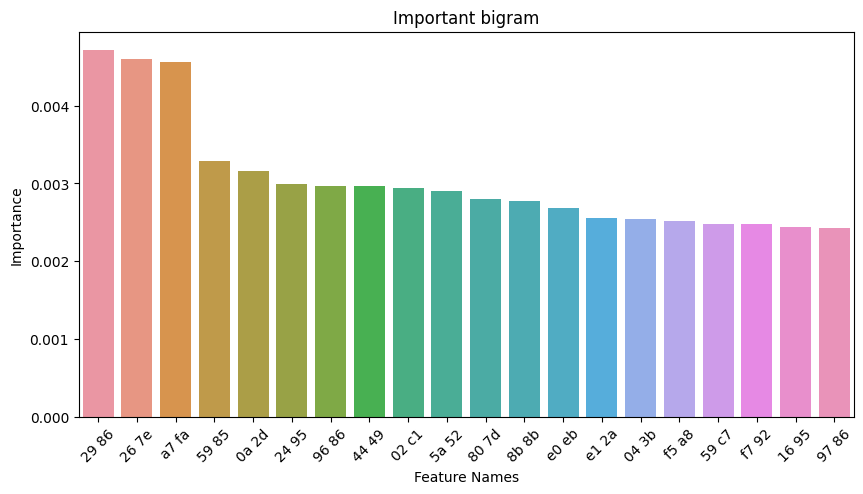

In [13]:
end_bigramns = time.time()

# final_bigrams = load_npz('byteCSR/final_bigrams.npz')

rf = RandomForestClassifier(n_estimators = 100, n_jobs = -1)
rf.fit(final_bigrams, data_y)
imp_feature_indx = np.argsort(rf.feature_importances_)[::-1]
imp_value = np.take(rf.feature_importances_, imp_feature_indx[:20])
imp_feature_name = np.take(bigram, imp_feature_indx[:20])
plt.figure(figsize = (10, 5))
ax = sns.barplot(x = imp_feature_name, y = imp_value)
ax.set_xticklabels(labels = imp_feature_name, rotation = 45)
plt.title('Important bigram')
plt.xlabel('Feature Names')
plt.ylabel('Importance')
plt.show()

In [14]:
imp_fe_idx = imp_feature_indx[:300]
bigram_df = pd.DataFrame(final_bigrams.todense())
bigram_df = bigram_df[imp_fe_idx]
bigram_df.insert(0, 'ID', result['ID'])
bigram_df.insert(301, 'Class', result['Class'])

bigram_df.to_csv('byteCSR/bigram_bytes.csv', index = False)

## 3 Train Test split

In [15]:
data_y =bigram_df.Class
# split the data into test and train by maintaining same distribution of output varaible 'y_true' [stratify=y_true]
X_train, X_test, y_train, y_test = train_test_split(bigram_df.drop(['ID', 'Class'], axis = 1), data_y, stratify = data_y, test_size = 0.20)
# split the train data into train and cross validation by maintaining same distribution of output varaible 'y_train' [stratify=y_train]
X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train, stratify = y_train, test_size = 0.20)

In [16]:
print('Number of data points in train data :', X_train.shape[0])
print('Number of data points in test data :', X_test.shape[0])
print('Number of data points in cross validation data :', X_cv.shape[0])

Number of data points in train data : 6955
Number of data points in test data : 2174
Number of data points in cross validation data : 1739


* DataFrame.sortlevel() Deprecated since version 0.20.0: Use DataFrame.sort_index()

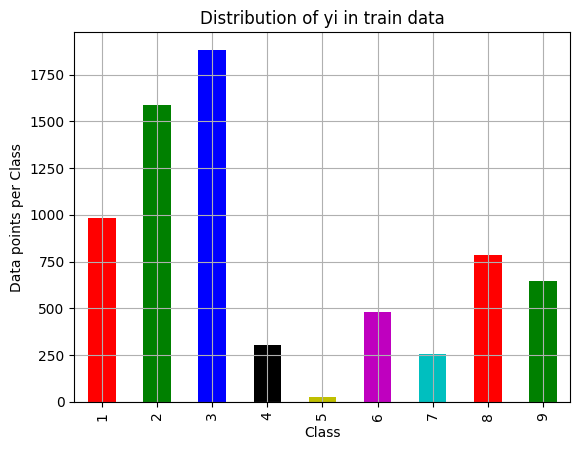

Number of data points in class 3 : 1883 ( 27.074 %)
Number of data points in class 2 : 1586 ( 22.804 %)
Number of data points in class 1 : 986 ( 14.177 %)
Number of data points in class 8 : 786 ( 11.301 %)
Number of data points in class 9 : 648 ( 9.317 %)
Number of data points in class 6 : 481 ( 6.916 %)
Number of data points in class 4 : 304 ( 4.371 %)
Number of data points in class 7 : 254 ( 3.652 %)
Number of data points in class 5 : 27 ( 0.388 %)
--------------------------------------------------------------------------------


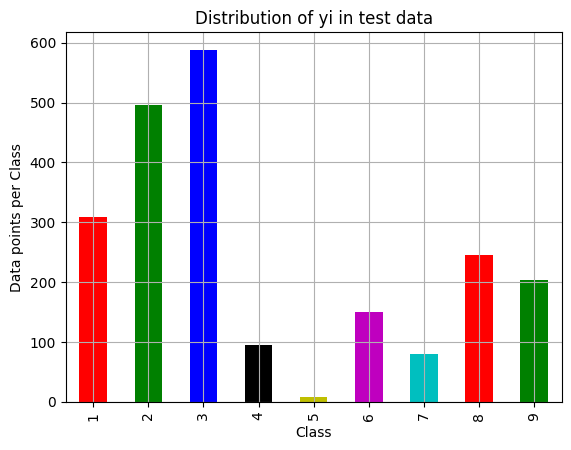

Number of data points in class 3 : 588 ( 27.047 %)
Number of data points in class 2 : 496 ( 22.815 %)
Number of data points in class 1 : 308 ( 14.167 %)
Number of data points in class 8 : 246 ( 11.316 %)
Number of data points in class 9 : 203 ( 9.338 %)
Number of data points in class 6 : 150 ( 6.9 %)
Number of data points in class 4 : 95 ( 4.37 %)
Number of data points in class 7 : 80 ( 3.68 %)
Number of data points in class 5 : 8 ( 0.368 %)
--------------------------------------------------------------------------------


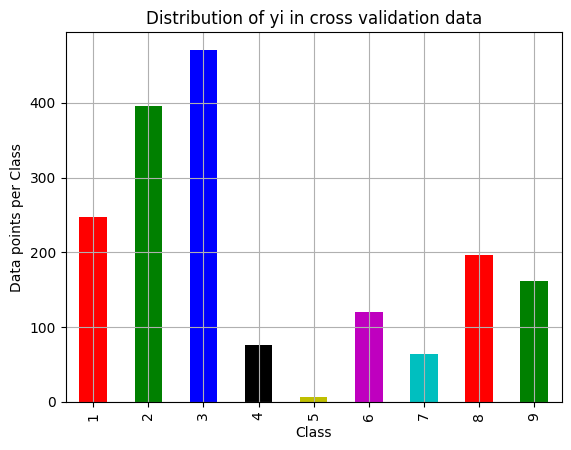

Number of data points in class 3 : 471 ( 27.085 %)
Number of data points in class 2 : 396 ( 22.772 %)
Number of data points in class 1 : 247 ( 14.204 %)
Number of data points in class 8 : 196 ( 11.271 %)
Number of data points in class 9 : 162 ( 9.316 %)
Number of data points in class 6 : 120 ( 6.901 %)
Number of data points in class 4 : 76 ( 4.37 %)
Number of data points in class 7 : 64 ( 3.68 %)
Number of data points in class 5 : 7 ( 0.403 %)


In [17]:
# it returns a dict, keys as class labels and values as the number of data points in that class

train_class_distribution = y_train.value_counts().sort_index()
test_class_distribution = y_test.value_counts().sort_index()
cv_class_distribution = y_cv.value_counts().sort_index()

my_colors = ['r', 'g', 'b', 'k', 'y', 'm', 'c']

train_class_distribution.plot(kind = 'bar', color = my_colors)
plt.xlabel('Class')
plt.ylabel('Data points per Class')
plt.title('Distribution of yi in train data')
plt.grid()
plt.show()

# ref: argsort https://docs.scipy.org/doc/numpy/reference/generated/numpy.argsort.html
# -(train_class_distribution.values): the minus sign will give us in decreasing order
sorted_yi = np.argsort(-train_class_distribution.values)
for i in sorted_yi:
    print('Number of data points in class', i+1, ':',train_class_distribution.values[i], '(', np.round((train_class_distribution.values[i]/y_train.shape[0]*100), 3), '%)')

print('-'*80)
test_class_distribution.plot(kind = 'bar', color = my_colors)
plt.xlabel('Class')
plt.ylabel('Data points per Class')
plt.title('Distribution of yi in test data')
plt.grid()
plt.show()

# ref: argsort https://docs.scipy.org/doc/numpy/reference/generated/numpy.argsort.html
# -(train_class_distribution.values): the minus sign will give us in decreasing order
sorted_yi = np.argsort(-test_class_distribution.values)
for i in sorted_yi:
    print('Number of data points in class', i+1, ':',test_class_distribution.values[i], '(', np.round((test_class_distribution.values[i]/y_test.shape[0]*100), 3), '%)')

print('-'*80)
cv_class_distribution.plot(kind = 'bar', color = my_colors)
plt.xlabel('Class')
plt.ylabel('Data points per Class')
plt.title('Distribution of yi in cross validation data')
plt.grid()
plt.show()

# ref: argsort https://docs.scipy.org/doc/numpy/reference/generated/numpy.argsort.html
# -(train_class_distribution.values): the minus sign will give us in decreasing order
sorted_yi = np.argsort(-train_class_distribution.values)
for i in sorted_yi:
    print('Number of data points in class', i+1, ':',cv_class_distribution.values[i], '(', np.round((cv_class_distribution.values[i]/y_cv.shape[0]*100), 3), '%)')


In [18]:
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    print('Number of misclassified points ', (len(test_y) - np.trace(C)) / len(test_y) * 100)
    
    A =(((C.T)/(C.sum(axis = 1))).T)
    B =(C/C.sum(axis=0))
    
    labels = [1, 2, 3, 4, 5, 6, 7, 8, 9]
    cmap=sns.light_palette('green')
    # representing A in heatmap format
    print('-' * 50, 'Confusion matrix', '-' * 50)
    plt.figure(figsize = (10, 5))
    sns.heatmap(C, annot = True, cmap = cmap, fmt = '.3f', xticklabels = labels, yticklabels = labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()

    print('-' * 50, 'Precision matrix', '-' * 50)
    plt.figure(figsize = (10, 5))
    sns.heatmap(B, annot = True, cmap = cmap, fmt = '.3f', xticklabels = labels, yticklabels = labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()
    print('Sum of columns in precision matrix', B.sum(axis = 0))
    
    # representing B in heatmap format
    print('-' * 50, 'Recall matrix', '-' * 50)
    plt.figure(figsize = (10, 5))
    sns.heatmap(A, annot = True, cmap = cmap, fmt = '.3f', xticklabels = labels, yticklabels = labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()
    print('Sum of rows in precision matrix', A.sum(axis = 1))

## 4 Machine Leaning Models on bytes files

### 4.1 On Unigrams

#### 4.1.1 Random Forest Classifier

100%|██████████████████████████████████████████████████████████████████| 7/7 [02:26<00:00, 20.87s/it]

log_loss for c =  10 is 0.06803398700273126
log_loss for c =  50 is 0.0654357264410998
log_loss for c =  100 is 0.0655632390064907
log_loss for c =  500 is 0.0636543699441748
log_loss for c =  1000 is 0.06376819439623752
log_loss for c =  2000 is 0.06393402786676027
log_loss for c =  3000 is 0.06390101801844693


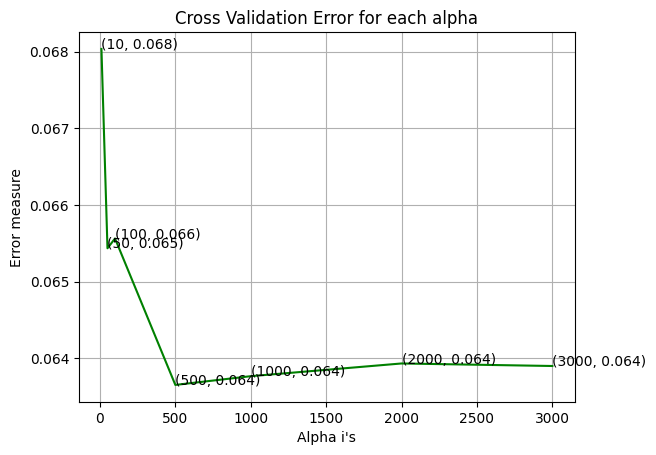

For values of best alpha =  500 The train log loss is: 0.01837996415450524
For values of best alpha =  500 The cross validation log loss is: 0.0636543699441748
For values of best alpha =  500 The test log loss is: 0.05422969879292714
Number of misclassified points  1.1039558417663293
-------------------------------------------------- Confusion matrix --------------------------------------------------


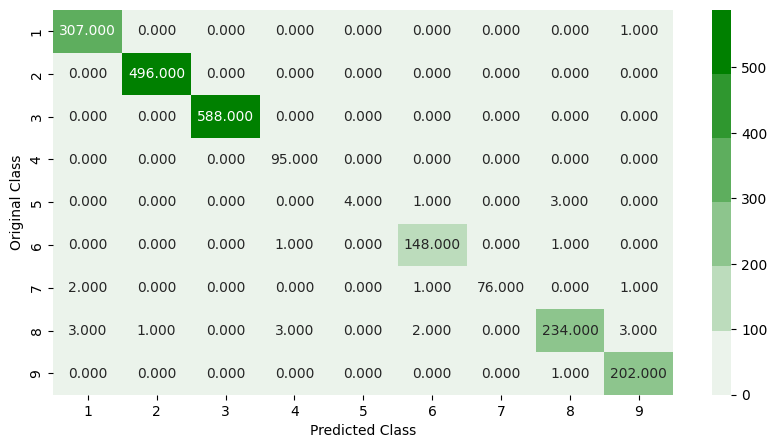

-------------------------------------------------- Precision matrix --------------------------------------------------


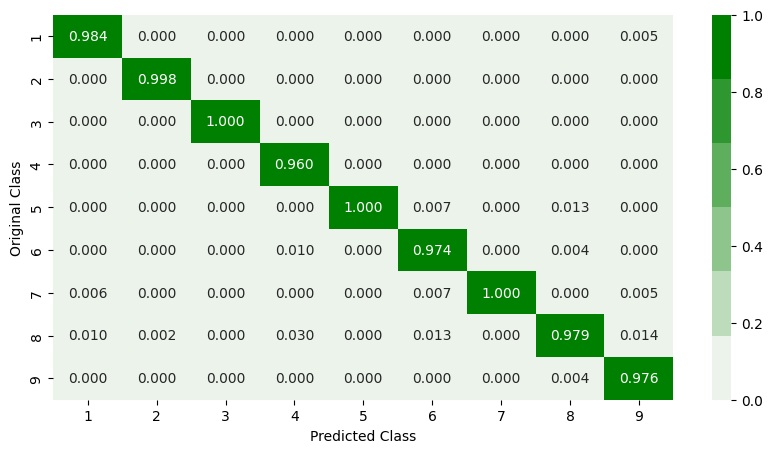

Sum of columns in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


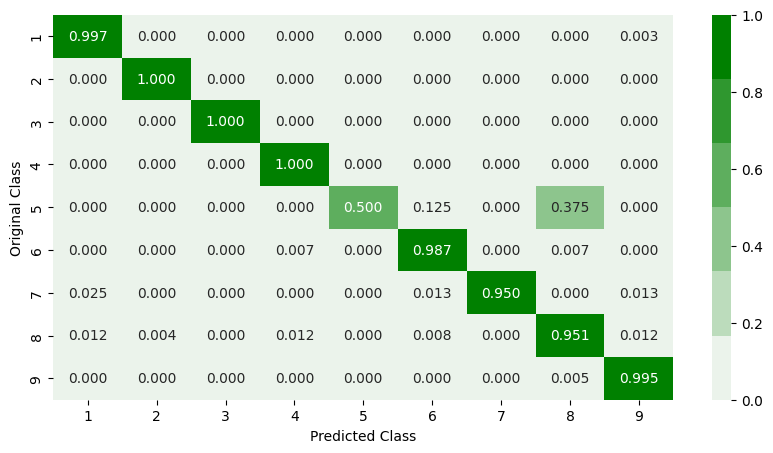

Sum of rows in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [19]:
alpha = [10, 50, 100, 500, 1000, 2000, 3000]
cv_log_error_array = []
train_log_error_array = []
for i in tqdm(alpha):
    r_cfl = RandomForestClassifier(n_estimators = i, random_state = 42, n_jobs = -1)
    r_cfl.fit(X_train, y_train)
    sig_clf = CalibratedClassifierCV(r_cfl, method = 'sigmoid', n_jobs = -1)
    sig_clf.fit(X_train, y_train)
    predict_y = sig_clf.predict_proba(X_cv)
    cv_log_error_array.append(log_loss(y_cv, predict_y, labels = r_cfl.classes_, eps = 1e-15))

for i in range(len(cv_log_error_array)):
    print ('log_loss for c = ', alpha[i], 'is', cv_log_error_array[i])

best_alpha = np.argmin(cv_log_error_array)

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array, c = 'g')
for i, txt in enumerate(np.round(cv_log_error_array, 3)):
    ax.annotate((alpha[i], np.round(txt, 3)), (alpha[i], cv_log_error_array[i]))
plt.grid()
plt.title('Cross Validation Error for each alpha')
plt.xlabel("Alpha i's")
plt.ylabel('Error measure')
plt.show()

r_cfl = RandomForestClassifier(n_estimators = alpha[best_alpha], random_state = 42, n_jobs = -1)
r_cfl.fit(X_train,y_train)
sig_clf = CalibratedClassifierCV(r_cfl, method = 'sigmoid', n_jobs = -1)
sig_clf.fit(X_train, y_train)

predict_y = sig_clf.predict_proba(X_train)
print('For values of best alpha = ', alpha[best_alpha], 'The train log loss is:', log_loss(y_train, predict_y))
predict_y = sig_clf.predict_proba(X_cv)
print('For values of best alpha = ', alpha[best_alpha], 'The cross validation log loss is:', log_loss(y_cv, predict_y))
predict_y = sig_clf.predict_proba(X_test)
print('For values of best alpha = ', alpha[best_alpha], 'The test log loss is:', log_loss(y_test, predict_y))
plot_confusion_matrix(y_test, sig_clf.predict(X_test))

#### 4.1.2. XgBoost Classification

In [20]:
# Invalid classes inferred from unique values of `y`.  Expected: [0 1 2 3 4 5 6 7 8], got [1 2 3 4 5 6 7 8 9]
# https://stackoverflow.com/a/72132612

le = LabelEncoder()
y_train = le.fit_transform(y_train)

100%|██████████████████████████████████████████████████████████████████| 6/6 [09:40<00:00, 96.80s/it]


log_loss for c =  10 is 5.49906397471956
log_loss for c =  50 is 5.995389744549091
log_loss for c =  100 is 6.023576326052005
log_loss for c =  500 is 6.048276996259324
log_loss for c =  1000 is 6.048675671483112
log_loss for c =  2000 is 6.048649530861308


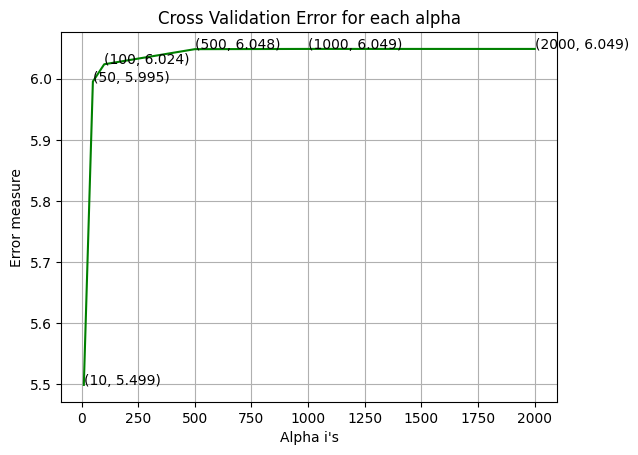

For values of best alpha =  10 The train log loss is :  0.02914966911645492
For values of best alpha =  10 The cross validation log loss is :  0.08067779830668109
For values of best alpha =  10 The test log loss is :  0.063627944623359
Number of misclassified points  99.81600735970562
-------------------------------------------------- Confusion matrix --------------------------------------------------


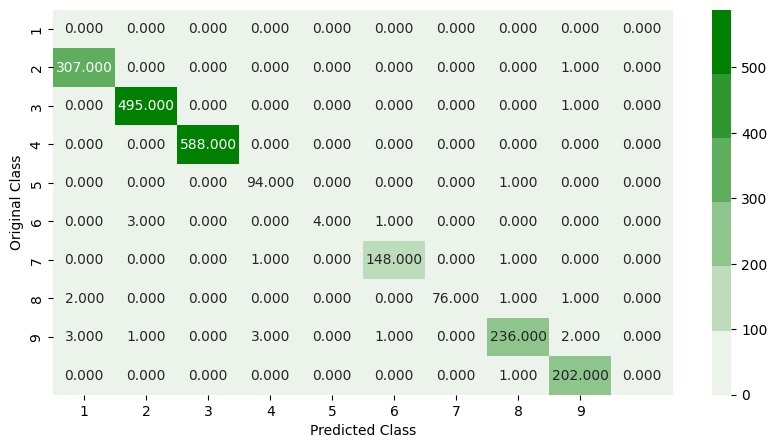

-------------------------------------------------- Precision matrix --------------------------------------------------


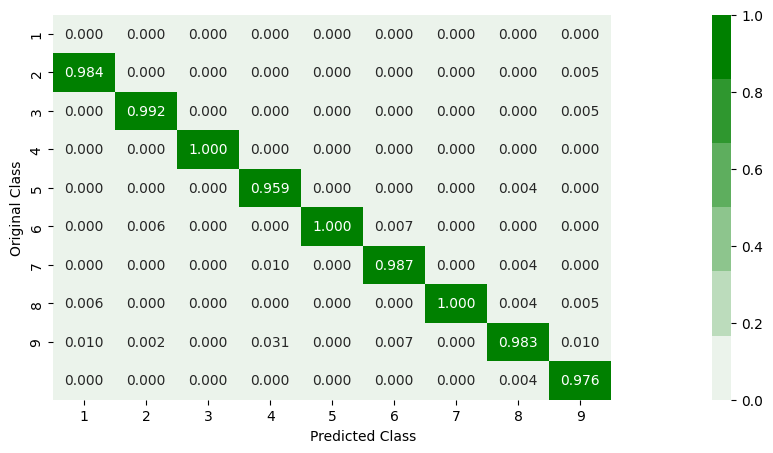

Sum of columns in precision matrix [ 1.  1.  1.  1.  1.  1.  1.  1.  1. nan]
-------------------------------------------------- Recall matrix --------------------------------------------------


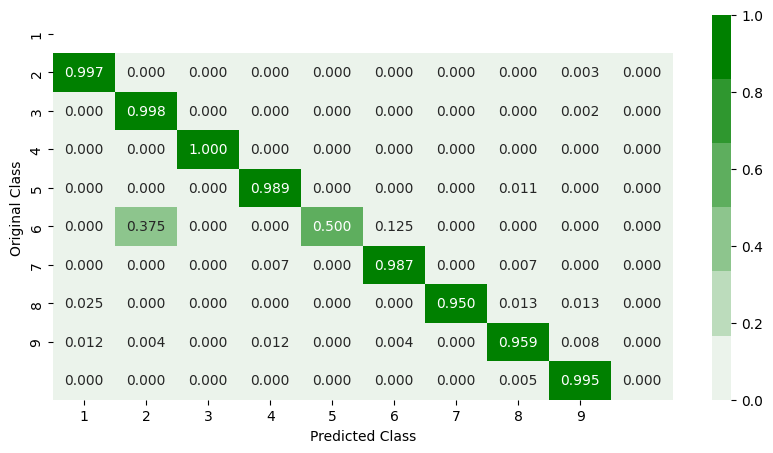

Sum of rows in precision matrix [nan  1.  1.  1.  1.  1.  1.  1.  1.  1.]


In [21]:
# Training a hyper-parameter tuned Xg-Boost regressor on our train data
# http://xgboost.readthedocs.io/en/latest/python/python_api.html?#xgboost.XGBClassifier

alpha = [10, 50, 100, 500, 1000, 2000]
cv_log_error_array = []
for i in tqdm(alpha):
    x_cfl=XGBClassifier(n_estimators = i, nthread = -1)
    x_cfl.fit(X_train,y_train)
    sig_clf = CalibratedClassifierCV(x_cfl, method = 'sigmoid', n_jobs = -1)
    sig_clf.fit(X_train, y_train)
    predict_y = sig_clf.predict_proba(X_cv)
    cv_log_error_array.append(log_loss(y_cv, predict_y, labels = x_cfl.classes_, eps = 1e-15))

for i in range(len(cv_log_error_array)):
    print ('log_loss for c = ', alpha[i], 'is', cv_log_error_array[i])

best_alpha = np.argmin(cv_log_error_array)

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array, c = 'g')
for i, txt in enumerate(np.round(cv_log_error_array, 3)):
    ax.annotate((alpha[i], np.round(txt, 3)), (alpha[i], cv_log_error_array[i]))
plt.grid()
plt.title('Cross Validation Error for each alpha')
plt.xlabel("Alpha i's")
plt.ylabel('Error measure')
plt.show()

x_cfl = XGBClassifier(n_estimators = alpha[best_alpha], nthread = -1)
x_cfl.fit(X_train,y_train)
sig_clf = CalibratedClassifierCV(x_cfl, method = 'sigmoid', n_jobs = -1)
sig_clf.fit(X_train, y_train)
    
predict_y = sig_clf.predict_proba(X_train)
print ('For values of best alpha = ', alpha[best_alpha], 'The train log loss is : ',log_loss(y_train, predict_y))
predict_y = sig_clf.predict_proba(X_cv)
print('For values of best alpha = ', alpha[best_alpha], 'The cross validation log loss is : ',log_loss(y_cv, predict_y))
predict_y = sig_clf.predict_proba(X_test)
print('For values of best alpha = ', alpha[best_alpha], 'The test log loss is : ',log_loss(y_test, predict_y))
plot_confusion_matrix(y_test, sig_clf.predict(X_test))

#### 4.1.3. XgBoost Classification with best hyper parameters using RandomSearch

In [22]:
# https://www.analyticsvidhya.com/blog/2016/03/complete-guide-parameter-tuning-xgboost-with-codes-python/

x_cfl = XGBClassifier(nthread = -1)
prams = {
        'learning_rate' : [0.01,0.03,0.05,0.1,0.15,0.2],
        'n_estimators' : [100,200,500,1000,2000],
        'max_depth' : [3,5,10],
        'colsample_bytree' : [0.1,0.3,0.5,1],
        'subsample' : [0.1,0.3,0.5,1]
        }
random_cfl1 = RandomizedSearchCV(x_cfl, param_distributions = prams, verbose = 10, n_jobs = -1,)
random_cfl1.fit(X_train, y_train)

print(random_cfl1.best_params_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 5/5; 2/10] START colsample_bytree=0.3, learning_rate=0.05, max_depth=5, n_estimators=2000, subsample=0.1
[CV 5/5; 2/10] END colsample_bytree=0.3, learning_rate=0.05, max_depth=5, n_estimators=2000, subsample=0.1;, score=0.989 total time= 2.1min
[CV 2/5; 3/10] START colsample_bytree=1, learning_rate=0.1, max_depth=10, n_estimators=100, subsample=1
[CV 2/5; 3/10] END colsample_bytree=1, learning_rate=0.1, max_depth=10, n_estimators=100, subsample=1;, score=0.988 total time= 1.5min
[CV 3/5; 4/10] START colsample_bytree=0.3, learning_rate=0.05, max_depth=3, n_estimators=100, subsample=1
[CV 3/5; 4/10] END colsample_bytree=0.3, learning_rate=0.05, max_depth=3, n_estimators=100, subsample=1;, score=0.988 total time=  18.7s
[CV 2/5; 5/10] START colsample_bytree=0.3, learning_rate=0.2, max_depth=5, n_estimators=200, subsample=0.1
[CV 2/5; 5/10] END colsample_bytree=0.3, learning_rate=0.2, max_depth=5, n_estimators=200, subsample=

In [23]:
# Training a hyper-parameter tuned Xg-Boost regressor on our train data
# http://xgboost.readthedocs.io/en/latest/python/python_api.html?#xgboost.XGBClassifier

n_est =random_cfl1.best_params_.get('n_estimators')
lrs_ = random_cfl1.best_params_.get('learning_rate')
bytree_ = random_cfl1.best_params_.get('colsample_bytree')
depth_ = random_cfl1.best_params_.get('max_depth')

x_cfl=XGBClassifier(n_estimators = n_est, learning_rate = lrs_, colsample_bytree = bytree_, max_depth = depth_, nthread = -1)
x_cfl.fit(X_train, y_train)
c_cfl = CalibratedClassifierCV(x_cfl, method = 'sigmoid', n_jobs = -1)
c_cfl.fit(X_train, y_train)

predict_y = c_cfl.predict_proba(X_train)
print ('train loss',log_loss(y_train, predict_y))
predict_y = c_cfl.predict_proba(X_cv)
print ('cv loss',log_loss(y_cv, predict_y))
predict_y = c_cfl.predict_proba(X_test)
print ('test loss',log_loss(y_test, predict_y))

end_train = time.time()

train loss 0.015356788920056774
cv loss 0.07268567780920122
test loss 0.05607789638515556
[CV 2/5; 2/10] START colsample_bytree=0.3, learning_rate=0.05, max_depth=5, n_estimators=2000, subsample=0.1
[CV 2/5; 2/10] END colsample_bytree=0.3, learning_rate=0.05, max_depth=5, n_estimators=2000, subsample=0.1;, score=0.988 total time= 2.1min
[CV 4/5; 5/10] START colsample_bytree=0.3, learning_rate=0.2, max_depth=5, n_estimators=200, subsample=0.1
[CV 4/5; 5/10] END colsample_bytree=0.3, learning_rate=0.2, max_depth=5, n_estimators=200, subsample=0.1;, score=0.988 total time=  16.8s
[CV 3/5; 7/10] START colsample_bytree=0.5, learning_rate=0.05, max_depth=5, n_estimators=500, subsample=0.3
[CV 3/5; 7/10] END colsample_bytree=0.5, learning_rate=0.05, max_depth=5, n_estimators=500, subsample=0.3;, score=0.992 total time= 1.9min
[CV 3/5; 6/10] START colsample_bytree=0.3, learning_rate=0.2, max_depth=10, n_estimators=200, subsample=0.1
[CV 3/5; 6/10] END colsample_bytree=0.3, learning_rate=0.2, m

### 4.2 With Unigram & Bigram

In [24]:
# Combining `bigram` and `unigram` data frames

uni_p_bigram = pd.merge(result, bigram_df, on= ['ID', 'Class'])
print(f'Shape of Unigram+Bigram Dataset :: {uni_p_bigram.shape}')

Shape of Unigram+Bigram Dataset :: (10868, 560)


In [25]:
data_y =uni_p_bigram.Class
# split the data into test and train by maintaining same distribution of output varaible 'y_true' [stratify=y_true]
X_train, X_test, y_train, y_test = train_test_split(uni_p_bigram.drop(['ID', 'Class'], axis = 1), data_y, stratify = data_y, test_size = 0.20)
# split the train data into train and cross validation by maintaining same distribution of output varaible 'y_train' [stratify=y_train]
X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train, stratify = y_train, test_size = 0.20)

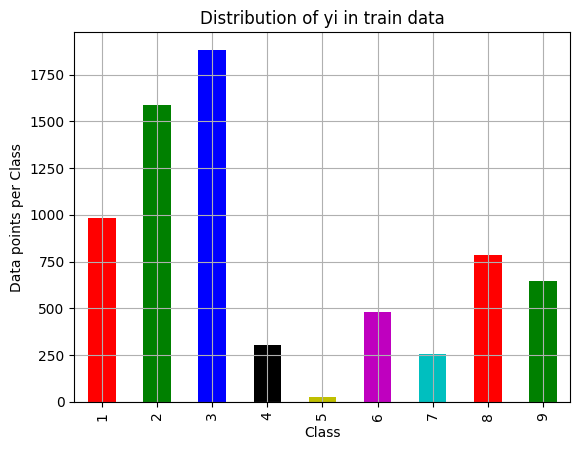

Number of data points in class 3 : 1883 ( 27.074 %)
Number of data points in class 2 : 1586 ( 22.804 %)
Number of data points in class 1 : 986 ( 14.177 %)
Number of data points in class 8 : 786 ( 11.301 %)
Number of data points in class 9 : 648 ( 9.317 %)
Number of data points in class 6 : 481 ( 6.916 %)
Number of data points in class 4 : 304 ( 4.371 %)
Number of data points in class 7 : 254 ( 3.652 %)
Number of data points in class 5 : 27 ( 0.388 %)
--------------------------------------------------------------------------------


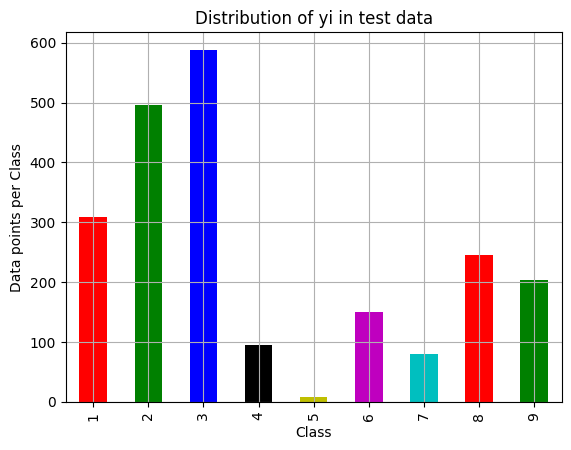

Number of data points in class 3 : 588 ( 27.047 %)
Number of data points in class 2 : 496 ( 22.815 %)
Number of data points in class 1 : 308 ( 14.167 %)
Number of data points in class 8 : 246 ( 11.316 %)
Number of data points in class 9 : 203 ( 9.338 %)
Number of data points in class 6 : 150 ( 6.9 %)
Number of data points in class 4 : 95 ( 4.37 %)
Number of data points in class 7 : 80 ( 3.68 %)
Number of data points in class 5 : 8 ( 0.368 %)
--------------------------------------------------------------------------------


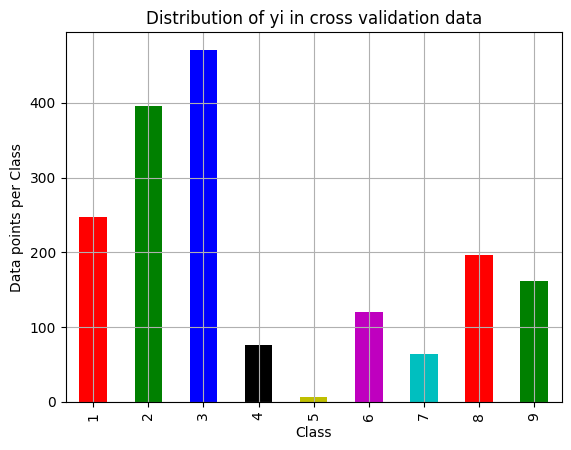

Number of data points in class 3 : 471 ( 27.085 %)
Number of data points in class 2 : 396 ( 22.772 %)
Number of data points in class 1 : 247 ( 14.204 %)
Number of data points in class 8 : 196 ( 11.271 %)
Number of data points in class 9 : 162 ( 9.316 %)
Number of data points in class 6 : 120 ( 6.901 %)
Number of data points in class 4 : 76 ( 4.37 %)
Number of data points in class 7 : 64 ( 3.68 %)
Number of data points in class 5 : 7 ( 0.403 %)


In [26]:
# it returns a dict, keys as class labels and values as the number of data points in that class

train_class_distribution = y_train.value_counts().sort_index()
test_class_distribution = y_test.value_counts().sort_index()
cv_class_distribution = y_cv.value_counts().sort_index()

my_colors = ['r', 'g', 'b', 'k', 'y', 'm', 'c']

train_class_distribution.plot(kind = 'bar', color = my_colors)
plt.xlabel('Class')
plt.ylabel('Data points per Class')
plt.title('Distribution of yi in train data')
plt.grid()
plt.show()

# ref: argsort https://docs.scipy.org/doc/numpy/reference/generated/numpy.argsort.html
# -(train_class_distribution.values): the minus sign will give us in decreasing order
sorted_yi = np.argsort(-train_class_distribution.values)
for i in sorted_yi:
    print('Number of data points in class', i+1, ':',train_class_distribution.values[i], '(', np.round((train_class_distribution.values[i]/y_train.shape[0]*100), 3), '%)')

print('-'*80)
test_class_distribution.plot(kind = 'bar', color = my_colors)
plt.xlabel('Class')
plt.ylabel('Data points per Class')
plt.title('Distribution of yi in test data')
plt.grid()
plt.show()

# ref: argsort https://docs.scipy.org/doc/numpy/reference/generated/numpy.argsort.html
# -(train_class_distribution.values): the minus sign will give us in decreasing order
sorted_yi = np.argsort(-test_class_distribution.values)
for i in sorted_yi:
    print('Number of data points in class', i+1, ':',test_class_distribution.values[i], '(', np.round((test_class_distribution.values[i]/y_test.shape[0]*100), 3), '%)')

print('-'*80)
cv_class_distribution.plot(kind = 'bar', color = my_colors)
plt.xlabel('Class')
plt.ylabel('Data points per Class')
plt.title('Distribution of yi in cross validation data')
plt.grid()
plt.show()

# ref: argsort https://docs.scipy.org/doc/numpy/reference/generated/numpy.argsort.html
# -(train_class_distribution.values): the minus sign will give us in decreasing order
sorted_yi = np.argsort(-train_class_distribution.values)
for i in sorted_yi:
    print('Number of data points in class', i+1, ':',cv_class_distribution.values[i], '(', np.round((cv_class_distribution.values[i]/y_cv.shape[0]*100), 3), '%)')


#### 4.2.1. Random Forest Classifier


100%|██████████████████████████████████████████████████████████████████| 7/7 [03:57<00:00, 33.92s/it]

log_loss for c =  10 is 0.046414181550593465
log_loss for c =  50 is 0.03734719241663533
log_loss for c =  100 is 0.03575090639140963
log_loss for c =  500 is 0.036071785606781946
log_loss for c =  1000 is 0.03623388315764805
log_loss for c =  2000 is 0.036072986878046484
log_loss for c =  3000 is 0.03602779292819511


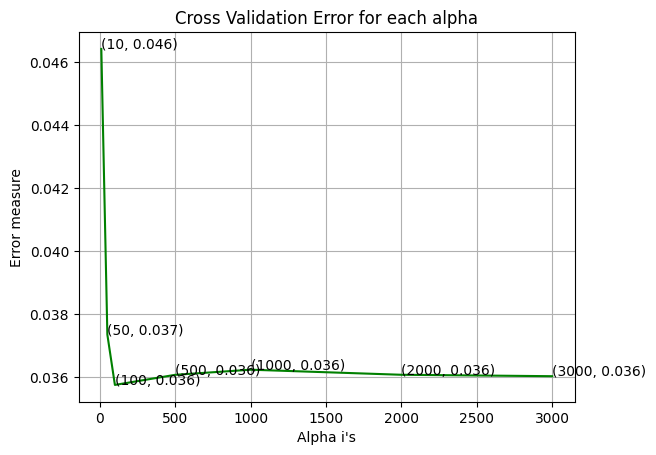

For values of best alpha =  100 The train log loss is: 0.01793172872484535
For values of best alpha =  100 The cross validation log loss is: 0.03575090639140963
For values of best alpha =  100 The test log loss is: 0.045081324977426236
Number of misclassified points  0.78196872125115
-------------------------------------------------- Confusion matrix --------------------------------------------------


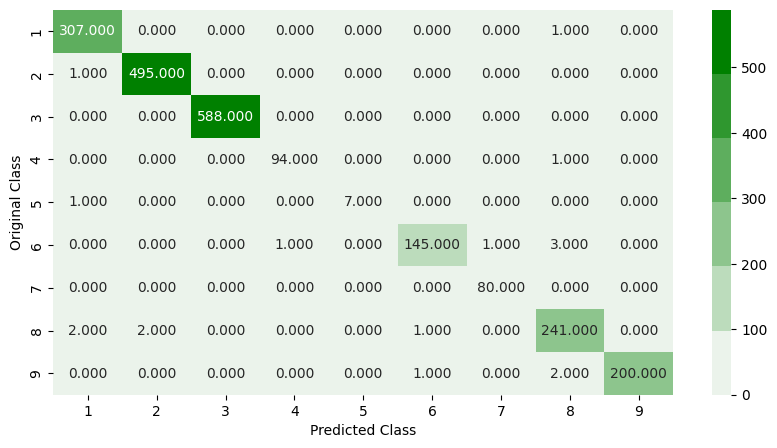

-------------------------------------------------- Precision matrix --------------------------------------------------


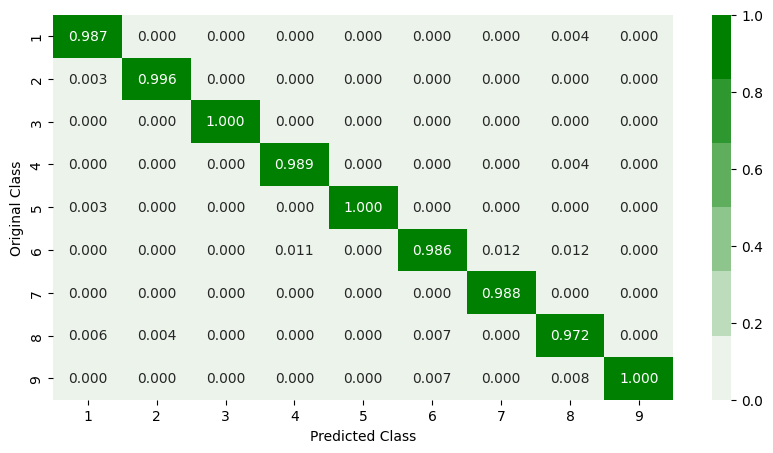

Sum of columns in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


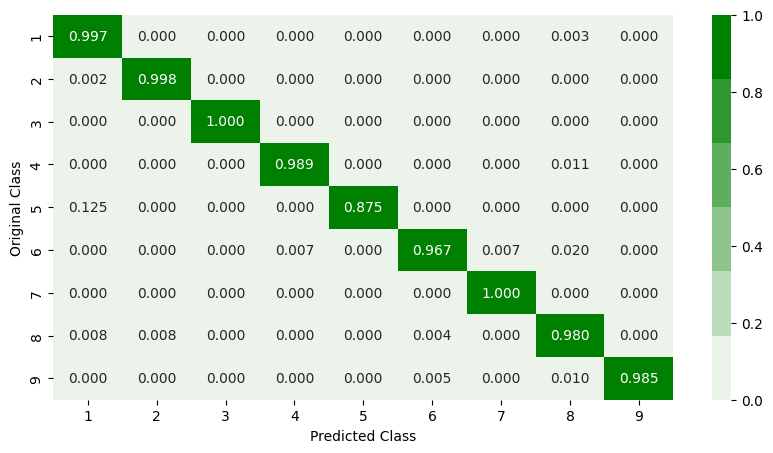

Sum of rows in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [27]:
alpha = [10, 50, 100, 500, 1000, 2000, 3000]
cv_log_error_array = []
train_log_error_array = []
for i in tqdm(alpha):
    r_cfl = RandomForestClassifier(n_estimators = i, random_state = 42, n_jobs = -1)
    r_cfl.fit(X_train, y_train)
    sig_clf = CalibratedClassifierCV(r_cfl, method = 'sigmoid', n_jobs = -1)
    sig_clf.fit(X_train, y_train)
    predict_y = sig_clf.predict_proba(X_cv)
    cv_log_error_array.append(log_loss(y_cv, predict_y, labels = r_cfl.classes_, eps = 1e-15))

for i in range(len(cv_log_error_array)):
    print ('log_loss for c = ', alpha[i], 'is', cv_log_error_array[i])

best_alpha = np.argmin(cv_log_error_array)

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array, c = 'g')
for i, txt in enumerate(np.round(cv_log_error_array, 3)):
    ax.annotate((alpha[i], np.round(txt, 3)), (alpha[i], cv_log_error_array[i]))
plt.grid()
plt.title('Cross Validation Error for each alpha')
plt.xlabel("Alpha i's")
plt.ylabel('Error measure')
plt.show()

r_cfl = RandomForestClassifier(n_estimators = alpha[best_alpha], random_state = 42, n_jobs = -1)
r_cfl.fit(X_train,y_train)
sig_clf = CalibratedClassifierCV(r_cfl, method = 'sigmoid', n_jobs = -1)
sig_clf.fit(X_train, y_train)

predict_y = sig_clf.predict_proba(X_train)
print('For values of best alpha = ', alpha[best_alpha], 'The train log loss is:', log_loss(y_train, predict_y))
predict_y = sig_clf.predict_proba(X_cv)
print('For values of best alpha = ', alpha[best_alpha], 'The cross validation log loss is:', log_loss(y_cv, predict_y))
predict_y = sig_clf.predict_proba(X_test)
print('For values of best alpha = ', alpha[best_alpha], 'The test log loss is:', log_loss(y_test, predict_y))
plot_confusion_matrix(y_test, sig_clf.predict(X_test))

#### 4.2.2. XgBoost Classification

In [28]:
# Invalid classes inferred from unique values of `y`.  Expected: [0 1 2 3 4 5 6 7 8], got [1 2 3 4 5 6 7 8 9]
# https://stackoverflow.com/a/72132612

le = LabelEncoder()
y_train = le.fit_transform(y_train)

100%|█████████████████████████████████████████████████████████████████| 6/6 [22:10<00:00, 221.70s/it]

log_loss for c =  10 is 5.555678010320823
log_loss for c =  50 is 5.9242630970259755
log_loss for c =  100 is 5.9270260249258016
log_loss for c =  500 is 5.927550098119262
log_loss for c =  1000 is 5.927551260591119
log_loss for c =  2000 is 5.927667964250245


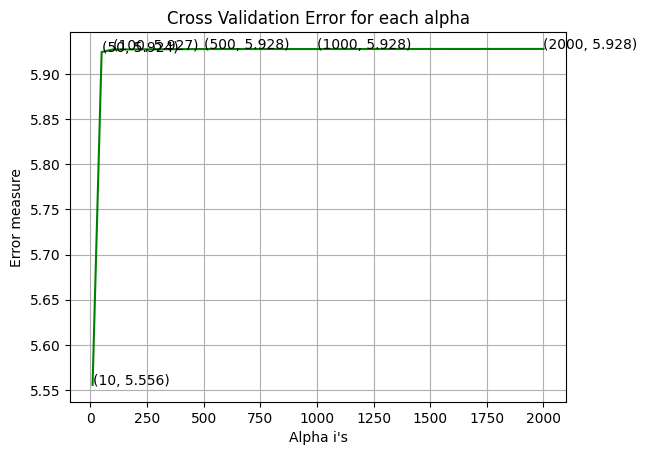

For values of best alpha =  10 The train log loss is :  0.02714448116379096
For values of best alpha =  10 The cross validation log loss is :  0.05561753661733731
For values of best alpha =  10 The test log loss is :  0.06950201937848857
Number of misclassified points  99.77000919963201
-------------------------------------------------- Confusion matrix --------------------------------------------------


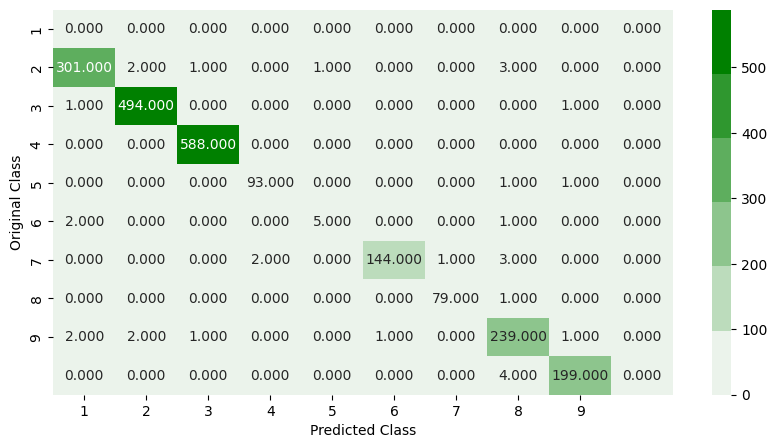

-------------------------------------------------- Precision matrix --------------------------------------------------


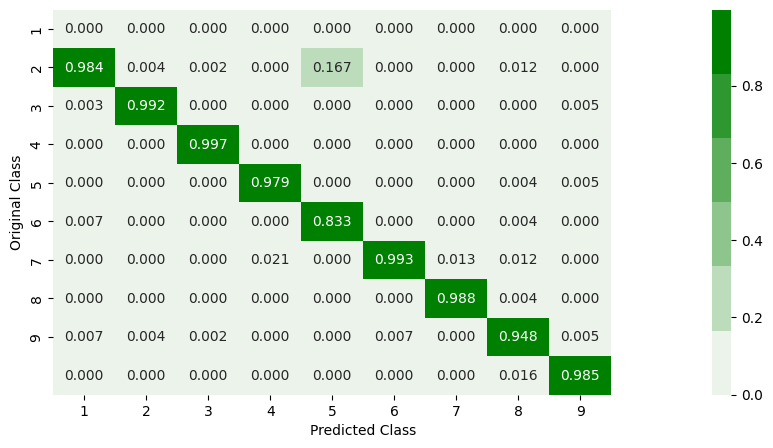

Sum of columns in precision matrix [ 1.  1.  1.  1.  1.  1.  1.  1.  1. nan]
-------------------------------------------------- Recall matrix --------------------------------------------------


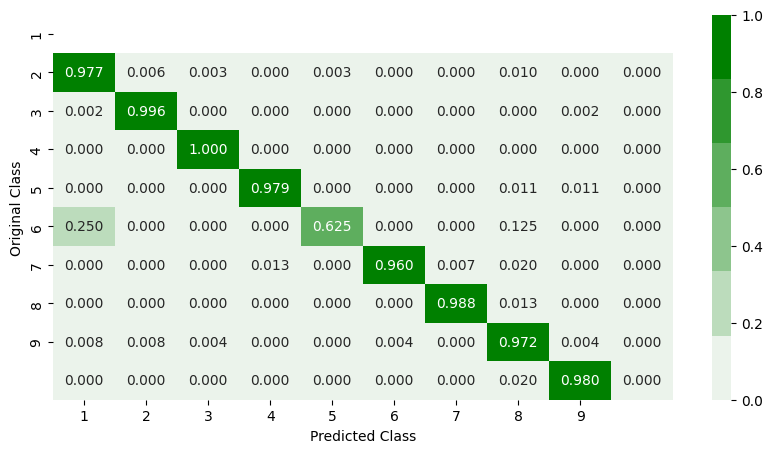

Sum of rows in precision matrix [nan  1.  1.  1.  1.  1.  1.  1.  1.  1.]


In [29]:
# Training a hyper-parameter tuned Xg-Boost regressor on our train data
# http://xgboost.readthedocs.io/en/latest/python/python_api.html?#xgboost.XGBClassifier

alpha = [10, 50, 100, 500, 1000, 2000]
cv_log_error_array = []
for i in tqdm(alpha):
    x_cfl=XGBClassifier(n_estimators = i, nthread = -1)
    x_cfl.fit(X_train,y_train)
    sig_clf = CalibratedClassifierCV(x_cfl, method = 'sigmoid', n_jobs = -1)
    sig_clf.fit(X_train, y_train)
    predict_y = sig_clf.predict_proba(X_cv)
    cv_log_error_array.append(log_loss(y_cv, predict_y, labels = x_cfl.classes_, eps = 1e-15))

for i in range(len(cv_log_error_array)):
    print ('log_loss for c = ', alpha[i], 'is', cv_log_error_array[i])

best_alpha = np.argmin(cv_log_error_array)

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array, c = 'g')
for i, txt in enumerate(np.round(cv_log_error_array, 3)):
    ax.annotate((alpha[i], np.round(txt, 3)), (alpha[i], cv_log_error_array[i]))
plt.grid()
plt.title('Cross Validation Error for each alpha')
plt.xlabel("Alpha i's")
plt.ylabel('Error measure')
plt.show()

x_cfl = XGBClassifier(n_estimators = alpha[best_alpha], nthread = -1)
x_cfl.fit(X_train,y_train)
sig_clf = CalibratedClassifierCV(x_cfl, method = 'sigmoid', n_jobs = -1)
sig_clf.fit(X_train, y_train)
    
predict_y = sig_clf.predict_proba(X_train)
print ('For values of best alpha = ', alpha[best_alpha], 'The train log loss is : ',log_loss(y_train, predict_y))
predict_y = sig_clf.predict_proba(X_cv)
print('For values of best alpha = ', alpha[best_alpha], 'The cross validation log loss is : ',log_loss(y_cv, predict_y))
predict_y = sig_clf.predict_proba(X_test)
print('For values of best alpha = ', alpha[best_alpha], 'The test log loss is : ',log_loss(y_test, predict_y))
plot_confusion_matrix(y_test, sig_clf.predict(X_test))

#### 4.2.3. XgBoost Classification with best hyper parameters using RandomSearch

In [30]:
# https://www.analyticsvidhya.com/blog/2016/03/complete-guide-parameter-tuning-xgboost-with-codes-python/

x_cfl = XGBClassifier(nthread = -1)
prams = {
        'learning_rate' : [0.01,0.03,0.05,0.1,0.15,0.2],
        'n_estimators' : [100,200,500,1000,2000],
        'max_depth' : [3,5,10],
        'colsample_bytree' : [0.1,0.3,0.5,1],
        'subsample' : [0.1,0.3,0.5,1]
        }
random_cfl1 = RandomizedSearchCV(x_cfl, param_distributions = prams, verbose = 10, n_jobs = -1,)
random_cfl1.fit(X_train, y_train)

print(random_cfl1.best_params_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 5/5; 1/10] START colsample_bytree=1, learning_rate=0.05, max_depth=10, n_estimators=500, subsample=0.1
[CV 5/5; 1/10] END colsample_bytree=1, learning_rate=0.05, max_depth=10, n_estimators=500, subsample=0.1;, score=0.984 total time= 4.2min
[CV 4/5; 5/10] START colsample_bytree=1, learning_rate=0.1, max_depth=3, n_estimators=1000, subsample=1
[CV 4/5; 5/10] END colsample_bytree=1, learning_rate=0.1, max_depth=3, n_estimators=1000, subsample=1;, score=0.992 total time=10.7min
[CV 1/5; 1/10] START colsample_bytree=1, learning_rate=0.05, max_depth=10, n_estimators=500, subsample=0.1
[CV 1/5; 1/10] END colsample_bytree=1, learning_rate=0.05, max_depth=10, n_estimators=500, subsample=0.1;, score=0.988 total time= 4.2min
[CV 5/5; 5/10] START colsample_bytree=1, learning_rate=0.1, max_depth=3, n_estimators=1000, subsample=1
[CV 5/5; 5/10] END colsample_bytree=1, learning_rate=0.1, max_depth=3, n_estimators=1000, subsample=1;, sc

In [31]:
# Training a hyper-parameter tuned Xg-Boost regressor on our train data
# http://xgboost.readthedocs.io/en/latest/python/python_api.html?#xgboost.XGBClassifier

n_est =random_cfl1.best_params_.get('n_estimators')
lrs_ = random_cfl1.best_params_.get('learning_rate')
bytree_ = random_cfl1.best_params_.get('colsample_bytree')
depth_ = random_cfl1.best_params_.get('max_depth')

x_cfl=XGBClassifier(n_estimators = n_est, learning_rate = lrs_, colsample_bytree = bytree_, max_depth = depth_, nthread = -1)
x_cfl.fit(X_train, y_train)
c_cfl = CalibratedClassifierCV(x_cfl, method = 'sigmoid', n_jobs = -1)
c_cfl.fit(X_train, y_train)

predict_y = c_cfl.predict_proba(X_train)
print ('train loss',log_loss(y_train, predict_y))
predict_y = c_cfl.predict_proba(X_cv)
print ('cv loss',log_loss(y_cv, predict_y))
predict_y = c_cfl.predict_proba(X_test)
print ('test loss',log_loss(y_test, predict_y))

end_train = time.time()

train loss 0.016363620270035587
cv loss 0.03596776254931173
test loss 0.04798101995386694


## 5 Preparing .asm files

<h3> 1 Image feature extraction from asm files </h3>

In [32]:
# From Say_No_to_Overfitting

def entropy(p, n):
    
    p_ratio = float(p) / (p+n)
    n_ratio = float(n) / (p+n)
    
    return -p_ratio*math.log(p_ratio) - n_ratio * math.log(n_ratio)

In [33]:
def info_gain(p0, n0, p1, n1, p, n):
    
    return entropy(p,n) - float(p0+n0)/(p+n)*entropy(p0,n0) - float(p1+n1)/(p+n)*entropy(p1,n1)

In [34]:
# https://stackoverflow.com/a/23253578

def read_image(filename):

    f = open(filename, 'rb')
    ln = os.path.getsize(filename) # length of file in bytes
    width = 256
    rem = ln % width
    a = array.array("B") # uint8 array
    a.fromfile(f, ln - rem)
    f.close()
    g = np.reshape(a, (len(a)//width, width))
    g = np.uint8(g)
    g = np.resize(g, (1000,))
    
    return list(g)

In [35]:
# Do asm image extraction
def extract_asm_image_features(tfiles, csv_name):

    outrows = []
    with open(f'images/{csv_name}.csv', 'w') as f:
        fw = writer(f)
        column_names = ['filename'] + [f'ASM_{x}' for x in range(1000)]
        fw.writerow(column_names)
        for idx, fname in tqdm(enumerate(tfiles), total = len(tfiles)):
            file_id = fname.split('.')[0]
            # print('first/' + fname)
            image_data = read_image(fname)
            outrows.append([file_id] + image_data)
            
            if (idx+1) % 10 == 0:
                fw.writerows(outrows)
                outrows = []
                                       
        # Write remaining files
        if len(outrows) > 0:
            fw.writerows(outrows)
            outrows = []

In [36]:
def run_multiprocessing(step):
    manager = multiprocessing.Manager()
    p1 = Process(target = extract_asm_image_features, args = (glob.glob('first/*.asm'), f'{step}_01'))
    p2 = Process(target = extract_asm_image_features, args = (glob.glob('second/*.asm'), f'{step}_02'))
    p3 = Process(target = extract_asm_image_features, args = (glob.glob('third/*.asm'), f'{step}_03'))
    p4 = Process(target = extract_asm_image_features, args = (glob.glob('fourth/*.asm'), f'{step}_04'))
    p5 = Process(target = extract_asm_image_features, args = (glob.glob('fifth/*.asm'), f'{step}_05'))
    p6 = Process(target = extract_asm_image_features, args = (glob.glob('sixth/*.asm'), f'{step}_06'))
    p7 = Process(target = extract_asm_image_features, args = (glob.glob('seventh/*.asm'), f'{step}_07'))
    p8 = Process(target = extract_asm_image_features, args = (glob.glob('eighth/*.asm'), f'{step}_08'))
    p9 = Process(target = extract_asm_image_features, args = (glob.glob('ninth/*.asm'), f'{step}_09'))
    p10 = Process(target = extract_asm_image_features, args = (glob.glob('tenth/*.asm'), f'{step}_10'))
    p11 = Process(target = extract_asm_image_features, args = (glob.glob('leven/*.asm'), f'{step}_11'))
    p12 = Process(target = extract_asm_image_features, args = (glob.glob('twel/*.asm'), f'{step}_12'))
    
    p1.start()
    p2.start()
    p3.start()
    p4.start()
    p5.start()
    p6.start()
    p7.start()
    p8.start()
    p9.start()
    p10.start()
    p11.start()
    p12.start()
    
    p1.join()
    p2.join()
    p3.join()
    p4.join()
    p5.join()
    p6.join()
    p7.join()
    p8.join()
    p9.join()
    p10.join()
    p11.join()
    p12.join()

In [37]:
run_multiprocessing('one')

100%|██████████████████████████████████████████████████████████████| 227/227 [00:35<00:00,  6.42it/s]


In [38]:
run_multiprocessing('two')

100%|██████████████████████████████████████████████████████████████| 226/226 [00:46<00:00,  4.82it/s]


In [39]:
run_multiprocessing('three')

100%|██████████████████████████████████████████████████████████████| 227/227 [00:42<00:00,  5.33it/s]


In [40]:
run_multiprocessing('four')

100%|██████████████████████████████████████████████████████████████| 227/227 [00:48<00:00,  4.68it/s]


In [41]:
asm_image_features = pd.concat([pd.read_csv(files) for files in glob.glob('images/*')])

In [42]:
print(f'Shape :: {asm_image_features.shape}\n')

asm_image_features = asm_image_features.reset_index(drop = True).rename(columns= {'filename' : 'Id'})
asm_image_features.Id = asm_image_features.Id.apply(lambda x : x.split('/')[-1])

asm_image_features.head()

Shape :: (10868, 1001)



Id  ASM_0  ASM_1  ASM_2  ASM_3  ASM_4  ASM_5  ASM_6  \
0  Cjid9IAL13h2Rnpvc75w     46    122    101    110     99     58     48   
1  Ko1FSexsij4QuL0kOwav     46    116    101    120    116     58     48   
2  cgZEp2RhI0eKqPXuYnxw     72     69     65     68     69     82     58   
3  JGhXSB2Hu4sQKbMVlkv9     72     69     65     68     69     82     58   
4  5fsyaH409vx3SUXN2jOq     72     69     65     68     69     82     58   

   ASM_7  ASM_8  ...  ASM_990  ASM_991  ASM_992  ASM_993  ASM_994  ASM_995  \
0     48     52  ...       49       54       46       41       13       10   
1     48     52  ...       32       32       59       32       79      102   
2     48     48  ...       59       32       70      111      114      109   
3     48     48  ...      116      101      120      116       58       48   
4     48     48  ...      116      101      120      116       58       48   

   ASM_996  ASM_997  ASM_998  ASM_999  
0       46      122      101      110  
1      102      115      101      116  
2       97      116        9       32  
3       48       52       48       49  
4       48       52       48       49  

[5 rows x 1001 columns]

In [43]:
asm_image_feat_final = asm_image_features.merge(pd.read_csv('trainLabels.csv'), on = 'Id')
print(f'Shape of final asm image features :: {asm_image_feat_final.shape}\n')

asm_image_feat_final.to_csv('asm_final_1002_Columns.csv', index = False)

asm_image_feat_final.head()

Shape of final asm image features :: (10868, 1002)



Id  ASM_0  ASM_1  ASM_2  ASM_3  ASM_4  ASM_5  ASM_6  \
0  Cjid9IAL13h2Rnpvc75w     46    122    101    110     99     58     48   
1  Ko1FSexsij4QuL0kOwav     46    116    101    120    116     58     48   
2  cgZEp2RhI0eKqPXuYnxw     72     69     65     68     69     82     58   
3  JGhXSB2Hu4sQKbMVlkv9     72     69     65     68     69     82     58   
4  5fsyaH409vx3SUXN2jOq     72     69     65     68     69     82     58   

   ASM_7  ASM_8  ...  ASM_991  ASM_992  ASM_993  ASM_994  ASM_995  ASM_996  \
0     48     52  ...       54       46       41       13       10       46   
1     48     52  ...       32       59       32       79      102      102   
2     48     48  ...       32       70      111      114      109       97   
3     48     48  ...      101      120      116       58       48       48   
4     48     48  ...      101      120      116       58       48       48   

   ASM_997  ASM_998  ASM_999  Class  
0      122      101      110      2  
1      115      101      116      2  
2      116        9       32      3  
3       52       48       49      8  
4       52       48       49      8  

[5 rows x 1002 columns]

### 2. Feature Selection

- A feature is an attribute that has an impact on a  problem or is useful for the problem, and choosing the important  features for the model is known as feature selection.
- Each machine  learning process depends on feature engineering, which mainly contains  two processes; which are Feature Selection and Feature Extraction.  
- The main  difference between them is that feature selection is about selecting the subset of the original feature set, whereas feature extraction creates  new features.
- Feature selection is a way of reducing the input variable  for the model by using only relevant data in order to reduce overfitting in the model.


Below are some benefits of using feature selection in machine learning:

- It helps in avoiding the curse of dimensionality.
- It helps in the simplification of the model so that it can be easily interpreted by the researchers.
- It reduces the training time.
- It reduces overfitting hence enhance the generalization.



There are mainly two types of Feature Selection techniques, which are:

- **Supervised Feature Selection technique**
   Supervised Feature selection techniques consider the target variable and can be used for the labelled dataset.
- **Unsupervised Feature Selection technique**
   Unsupervised Feature selection techniques ignore the target variable and can be used for the unlabelled dataset.



![Feature Selection Techniques](https://i.imgur.com/bCpQgm2.png)

Image from : [https://javatpoint.com/](https://www.javatpoint.com/feature-selection-techniques-in-machine-learning)



**Feature Selection vs Dimensionality Reduction**

- Feature Selection : Select a subset of input features from the dataset.
- Dimensionality Reduction: Project input data into a lower-dimensional feature space.


#### 2.1 Filter Method

* Filter methods pick up the intrinsic properties of the features measured via univariate statistics instead of cross-validation performance. 
* In this method, features are dropped based on their relation to the output, or how they are **correlating** to the output.
* We use correlation to check if the features are  positively or negatively correlated to the output labels and drop  features accordingly.
* These methods are faster and less computationally expensive than wrapper methods.
* When dealing with high-dimensional data, it is computationally cheaper to use filter methods.
* Eg: Information Gain, [Chi-Square Test, Fisher’s Score, etc.

![Filter Method](https://i.imgur.com/nBRiNDb.jpg)

Image from : [https://simplilearn.com/](https://www.simplilearn.com/tutorials/machine-learning-tutorial/feature-selection-in-machine-learning)

##### 2.1.1 Information Gain

- Information gain calculates the reduction in entropy from the transformation of a dataset.
- It can be used for  feature selection by evaluating the Information gain of each variable in the context of the target variable.

![feature selection - information gain](https://cdn.analyticsvidhya.com/wp-content/uploads/2020/10/Image-2-1.png)

##### 2.1.2 Chi-square Test

- The Chi-square test is used for  categorical features in a dataset.
- We calculate Chi-square between each  feature and the target and select the desired number of features with  the best Chi-square scores.
- In order to correctly apply the chi-squared  in order to test the relation between various features in the dataset  and the target variable, the following conditions have to be met:
  1. The  variables have to be *categorical*, sampled *independently*
  2. Values should have an *expected frequency greater than 5*.

![feature selection - Chi square](https://cdn.analyticsvidhya.com/wp-content/uploads/2020/10/Image-3-1.png)

##### 2.1.3 Fisher’s Score

- Fisher score is one of the most widely  used supervised feature selection methods.
- The algorithm which we will  use returns the ranks of the variables based on the fisher’s score in  descending order.
- We can then select the variables as per the case.

![feature selection - Fishers score](https://cdn.analyticsvidhya.com/wp-content/uploads/2020/10/Image-4-1.png)


##### 2.2 References
- [Feature Selection Techniques in Machine Learning (analyticsvidhya.com)](https://www.analyticsvidhya.com/blog/2020/10/feature-selection-techniques-in-machine-learning/)
- [How to Choose a Feature Selection Method For Machine Learning (machinelearningmastery.com)](https://machinelearningmastery.com/feature-selection-with-real-and-categorical-data/)
- [Feature Selection Techniques in Machine Learning (javatpoint.com)](https://www.javatpoint.com/feature-selection-techniques-in-machine-learning)
- [Everything You Need to Know About Feature Selection In Machine Learning (simplilearn.com)](https://www.simplilearn.com/tutorials/machine-learning-tutorial/feature-selection-in-machine-learning)

In [44]:
# https://www.analyticsvidhya.com/blog/2020/10/feature-selection-techniques-in-machine-learning/
# https://stackoverflow.com/a/43765224

chi2_selector = SelectKBest(chi2, k = 750)

chi2_selector.fit_transform(asm_image_feat_final.drop(['ID', 'Class'], axis = 1), asm_image_feat_final['Class'])

selected_750_col_names = chi2_selector.get_support(indices = True)

asm_image_750 = asm_image_feat_final.iloc[:, selected_750_col_names]

# asm_image_750.insert(0, 'ID', asm_image_feat_final['ID'])
asm_image_750.insert(501, 'Class', asm_image_feat_final['Class'])

print(f'Shape of ASM image dataset after selecting 500 features :: {asm_image_750.shape}\n')

del asm_image_feat_final

asm_image_750.head()

Shape of ASM image dataset after selecting 500 features :: (10868, 751)



ID  ASM_0  ASM_1  ASM_2  ASM_3  ASM_4  ASM_13  ASM_19  \
0  Cjid9IAL13h2Rnpvc75w     46    122    101    110     99      48       9   
1  Ko1FSexsij4QuL0kOwav     46    116    101    120    116      48       9   
2  cgZEp2RhI0eKqPXuYnxw     72     69     65     68     69      48       9   
3  JGhXSB2Hu4sQKbMVlkv9     72     69     65     68     69      48       9   
4  5fsyaH409vx3SUXN2jOq     72     69     65     68     69      48       9   

   ASM_20  ASM_21  ...  ASM_989  ASM_990  ASM_991  ASM_992  ASM_993  ASM_994  \
0      32      32  ...       50       49       54       46       41       13   
1      32      32  ...       32       32       32       59       32       79   
2       9       9  ...       32       59       32       70      111      114   
3       9       9  ...       46      116      101      120      116       58   
4       9       9  ...       46      116      101      120      116       58   

   ASM_995  ASM_996  ASM_997  ASM_998  
0       10       46      122      101  
1      102      102      115      101  
2      109       97      116        9  
3       48       48       52       48  
4       48       48       52       48  

[5 rows x 751 columns]

In [45]:
data_y =asm_image_750.Class
# split the data into test and train by maintaining same distribution of output varaible 'y_true' [stratify=y_true]
X_train, X_test, y_train, y_test = train_test_split(asm_image_750.drop(['ID', 'Class'], axis = 1), data_y, stratify = data_y, test_size = 0.20)
# split the train data into train and cross validation by maintaining same distribution of output varaible 'y_train' [stratify=y_train]
X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train, stratify = y_train, test_size = 0.20)

In [46]:
print('Number of data points in train data :', X_train.shape[0])
print('Number of data points in test data :', X_test.shape[0])
print('Number of data points in cross validation data :', X_cv.shape[0])

Number of data points in train data : 6955
Number of data points in test data : 2174
Number of data points in cross validation data : 1739


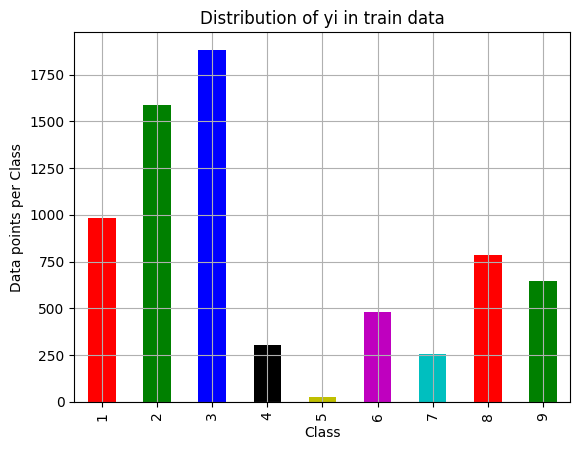

Number of data points in class 3 : 1883 ( 27.074 %)
Number of data points in class 2 : 1586 ( 22.804 %)
Number of data points in class 1 : 986 ( 14.177 %)
Number of data points in class 8 : 786 ( 11.301 %)
Number of data points in class 9 : 648 ( 9.317 %)
Number of data points in class 6 : 481 ( 6.916 %)
Number of data points in class 4 : 304 ( 4.371 %)
Number of data points in class 7 : 254 ( 3.652 %)
Number of data points in class 5 : 27 ( 0.388 %)
--------------------------------------------------------------------------------


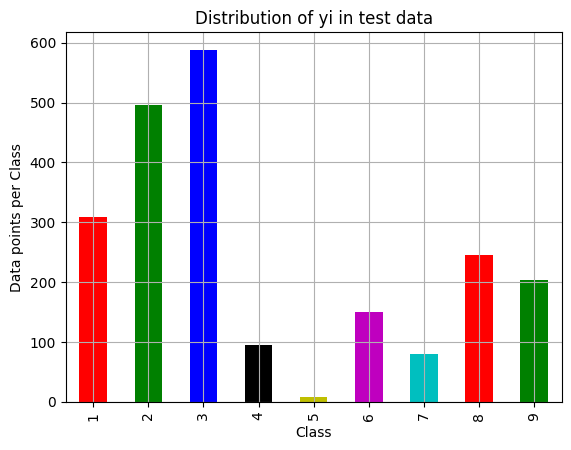

Number of data points in class 3 : 588 ( 27.047 %)
Number of data points in class 2 : 496 ( 22.815 %)
Number of data points in class 1 : 308 ( 14.167 %)
Number of data points in class 8 : 246 ( 11.316 %)
Number of data points in class 9 : 203 ( 9.338 %)
Number of data points in class 6 : 150 ( 6.9 %)
Number of data points in class 4 : 95 ( 4.37 %)
Number of data points in class 7 : 80 ( 3.68 %)
Number of data points in class 5 : 8 ( 0.368 %)
--------------------------------------------------------------------------------


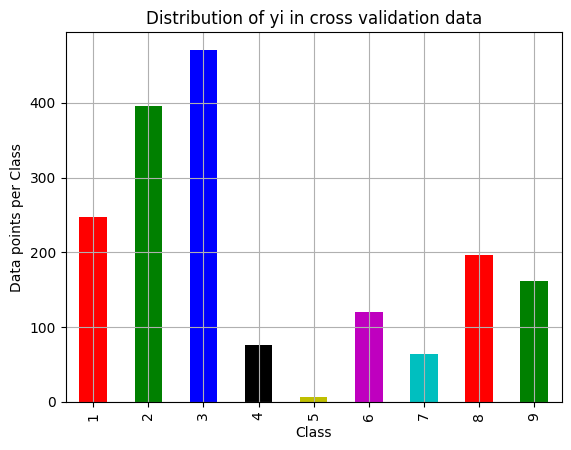

Number of data points in class 3 : 471 ( 27.085 %)
Number of data points in class 2 : 396 ( 22.772 %)
Number of data points in class 1 : 247 ( 14.204 %)
Number of data points in class 8 : 196 ( 11.271 %)
Number of data points in class 9 : 162 ( 9.316 %)
Number of data points in class 6 : 120 ( 6.901 %)
Number of data points in class 4 : 76 ( 4.37 %)
Number of data points in class 7 : 64 ( 3.68 %)
Number of data points in class 5 : 7 ( 0.403 %)


In [47]:
# it returns a dict, keys as class labels and values as the number of data points in that class

train_class_distribution = y_train.value_counts().sort_index()
test_class_distribution = y_test.value_counts().sort_index()
cv_class_distribution = y_cv.value_counts().sort_index()

my_colors = ['r', 'g', 'b', 'k', 'y', 'm', 'c']

train_class_distribution.plot(kind = 'bar', color = my_colors)
plt.xlabel('Class')
plt.ylabel('Data points per Class')
plt.title('Distribution of yi in train data')
plt.grid()
plt.show()

# ref: argsort https://docs.scipy.org/doc/numpy/reference/generated/numpy.argsort.html
# -(train_class_distribution.values): the minus sign will give us in decreasing order
sorted_yi = np.argsort(-train_class_distribution.values)
for i in sorted_yi:
    print('Number of data points in class', i+1, ':',train_class_distribution.values[i], '(', np.round((train_class_distribution.values[i]/y_train.shape[0]*100), 3), '%)')

print('-'*80)
test_class_distribution.plot(kind = 'bar', color = my_colors)
plt.xlabel('Class')
plt.ylabel('Data points per Class')
plt.title('Distribution of yi in test data')
plt.grid()
plt.show()

# ref: argsort https://docs.scipy.org/doc/numpy/reference/generated/numpy.argsort.html
# -(train_class_distribution.values): the minus sign will give us in decreasing order
sorted_yi = np.argsort(-test_class_distribution.values)
for i in sorted_yi:
    print('Number of data points in class', i+1, ':',test_class_distribution.values[i], '(', np.round((test_class_distribution.values[i]/y_test.shape[0]*100), 3), '%)')

print('-'*80)
cv_class_distribution.plot(kind = 'bar', color = my_colors)
plt.xlabel('Class')
plt.ylabel('Data points per Class')
plt.title('Distribution of yi in cross validation data')
plt.grid()
plt.show()

# ref: argsort https://docs.scipy.org/doc/numpy/reference/generated/numpy.argsort.html
# -(train_class_distribution.values): the minus sign will give us in decreasing order
sorted_yi = np.argsort(-train_class_distribution.values)
for i in sorted_yi:
    print('Number of data points in class', i+1, ':',cv_class_distribution.values[i], '(', np.round((cv_class_distribution.values[i]/y_cv.shape[0]*100), 3), '%)')


## 6. Machine Learnign Modeling on .asn files

### 6.1 On Image Features

#### 6.1.1. Random Forest Classifier

100%|██████████████████████████████████████████████████████████████████| 7/7 [02:37<00:00, 22.46s/it]

log_loss for c =  10 is 0.42508317339641366
log_loss for c =  50 is 0.42348530620447533
log_loss for c =  100 is 0.4233595086956275
log_loss for c =  500 is 0.4230176532141362
log_loss for c =  1000 is 0.4231969981985795
log_loss for c =  2000 is 0.4233493051053494
log_loss for c =  3000 is 0.42329927232749076


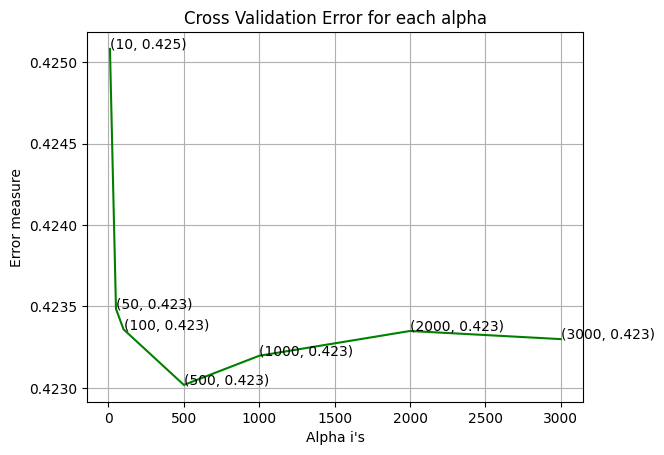

For values of best alpha =  500 The train log loss is: 0.38133204726275105
For values of best alpha =  500 The cross validation log loss is: 0.4230176532141362
For values of best alpha =  500 The test log loss is: 0.4085791191375906
Number of misclassified points  19.273229070837168
-------------------------------------------------- Confusion matrix --------------------------------------------------


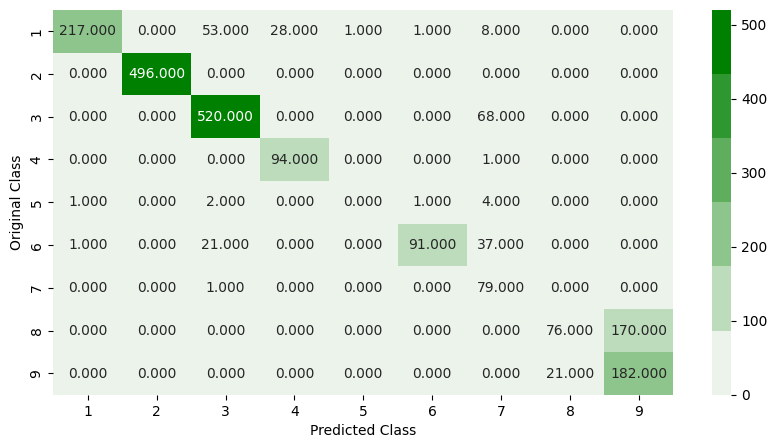

-------------------------------------------------- Precision matrix --------------------------------------------------


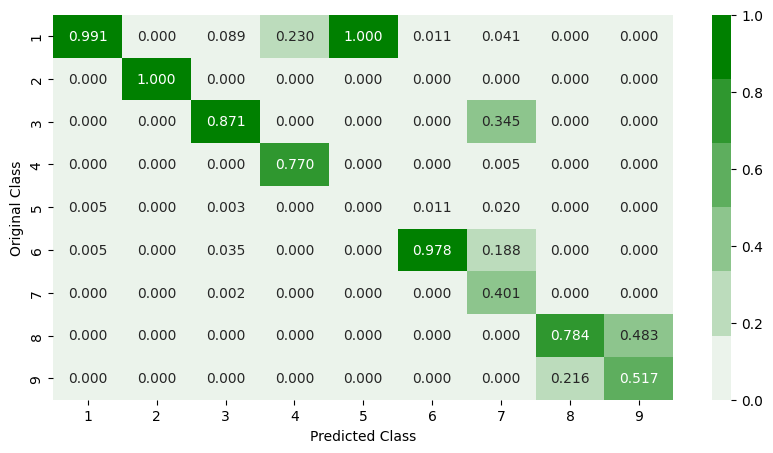

Sum of columns in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


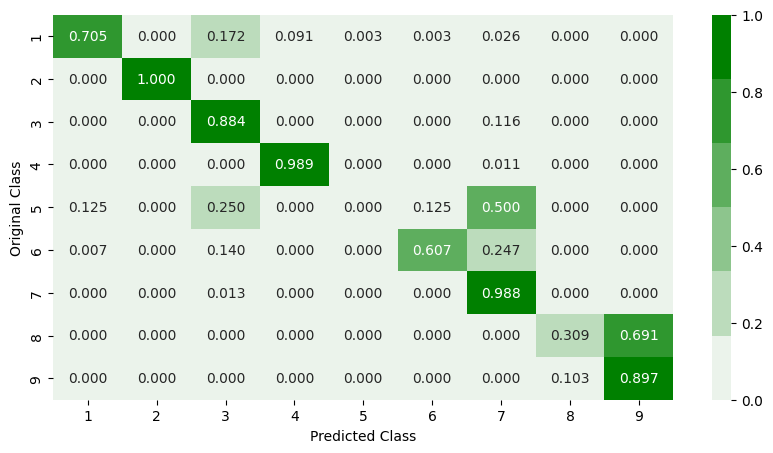

Sum of rows in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [48]:
alpha = [10, 50, 100, 500, 1000, 2000, 3000]
cv_log_error_array = []
train_log_error_array = []
for i in tqdm(alpha):
    r_cfl = RandomForestClassifier(n_estimators = i, random_state = 42, n_jobs = -1)
    r_cfl.fit(X_train, y_train)
    sig_clf = CalibratedClassifierCV(r_cfl, method = 'sigmoid', n_jobs = -1)
    sig_clf.fit(X_train, y_train)
    predict_y = sig_clf.predict_proba(X_cv)
    cv_log_error_array.append(log_loss(y_cv, predict_y, labels = r_cfl.classes_, eps = 1e-15))

for i in range(len(cv_log_error_array)):
    print ('log_loss for c = ', alpha[i], 'is', cv_log_error_array[i])

best_alpha = np.argmin(cv_log_error_array)

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array, c = 'g')
for i, txt in enumerate(np.round(cv_log_error_array, 3)):
    ax.annotate((alpha[i], np.round(txt, 3)), (alpha[i], cv_log_error_array[i]))
plt.grid()
plt.title('Cross Validation Error for each alpha')
plt.xlabel("Alpha i's")
plt.ylabel('Error measure')
plt.show()

r_cfl = RandomForestClassifier(n_estimators = alpha[best_alpha], random_state = 42, n_jobs = -1)
r_cfl.fit(X_train,y_train)
sig_clf = CalibratedClassifierCV(r_cfl, method = 'sigmoid', n_jobs = -1)
sig_clf.fit(X_train, y_train)

predict_y = sig_clf.predict_proba(X_train)
print('For values of best alpha = ', alpha[best_alpha], 'The train log loss is:', log_loss(y_train, predict_y))
predict_y = sig_clf.predict_proba(X_cv)
print('For values of best alpha = ', alpha[best_alpha], 'The cross validation log loss is:', log_loss(y_cv, predict_y))
predict_y = sig_clf.predict_proba(X_test)
print('For values of best alpha = ', alpha[best_alpha], 'The test log loss is:', log_loss(y_test, predict_y))
plot_confusion_matrix(y_test, sig_clf.predict(X_test))

#### 6.1.2. XgBoost Classification

In [49]:
# Invalid classes inferred from unique values of `y`.  Expected: [0 1 2 3 4 5 6 7 8], got [1 2 3 4 5 6 7 8 9]
# https://stackoverflow.com/a/72132612

le = LabelEncoder()
y_train = le.fit_transform(y_train)

100%|█████████████████████████████████████████████████████████████████| 6/6 [50:30<00:00, 505.03s/it]


log_loss for c =  10 is 4.710313153812509
log_loss for c =  50 is 4.723334376455344
log_loss for c =  100 is 4.716793004980543
log_loss for c =  500 is 4.712594452997075
log_loss for c =  1000 is 4.711394383836721
log_loss for c =  2000 is 4.711131213662945


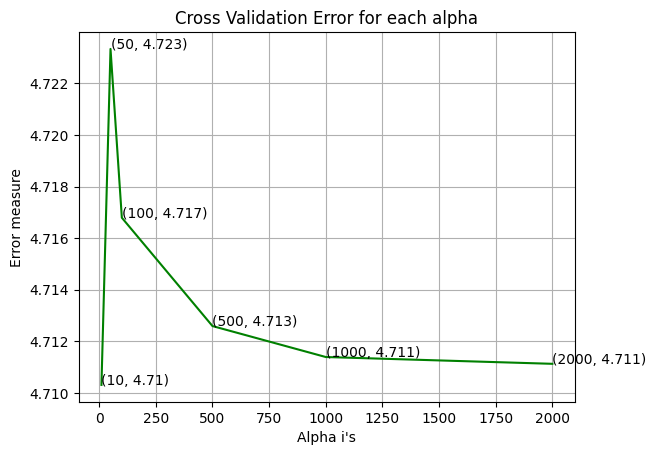

For values of best alpha =  10 The train log loss is :  0.388593915626483
For values of best alpha =  10 The cross validation log loss is :  0.42857744373626583
For values of best alpha =  10 The test log loss is :  0.41377850618255435
Number of misclassified points  90.43238270469182
-------------------------------------------------- Confusion matrix --------------------------------------------------


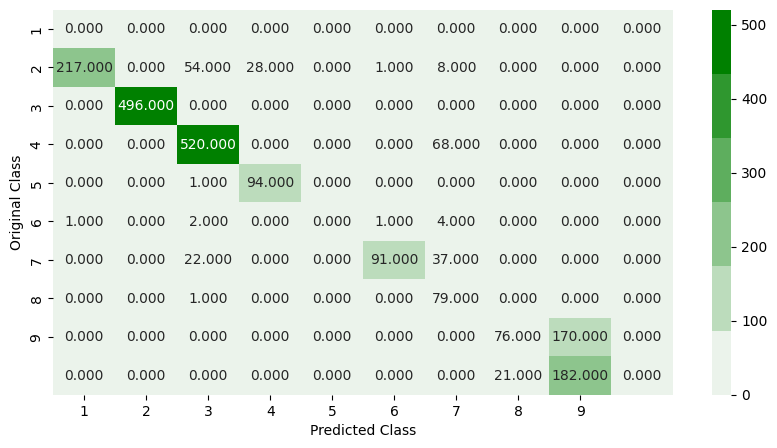

-------------------------------------------------- Precision matrix --------------------------------------------------


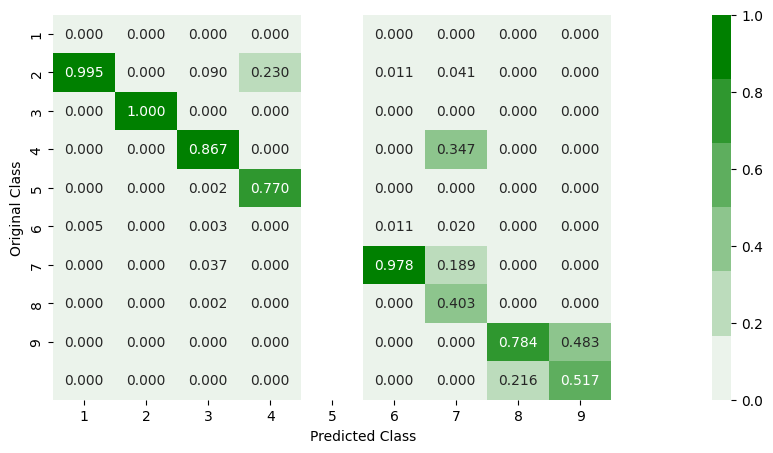

Sum of columns in precision matrix [ 1.  1.  1.  1. nan  1.  1.  1.  1. nan]
-------------------------------------------------- Recall matrix --------------------------------------------------


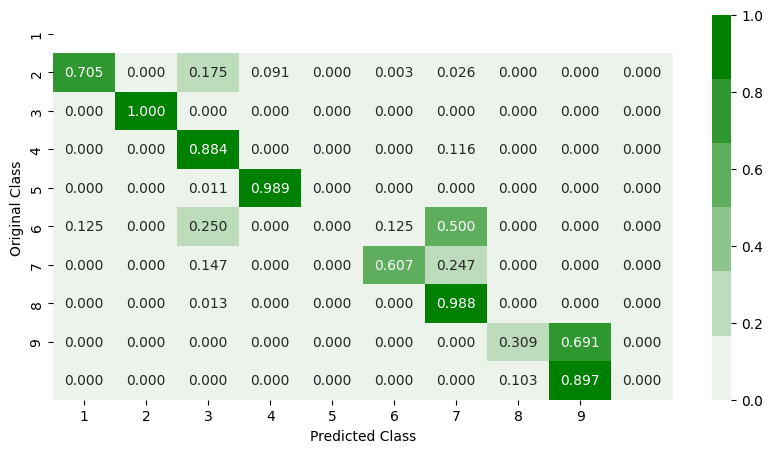

Sum of rows in precision matrix [nan  1.  1.  1.  1.  1.  1.  1.  1.  1.]


In [50]:
# Training a hyper-parameter tuned Xg-Boost regressor on our train data
# http://xgboost.readthedocs.io/en/latest/python/python_api.html?#xgboost.XGBClassifier

alpha = [10, 50, 100, 500, 1000, 2000]
cv_log_error_array = []
for i in tqdm(alpha):
    x_cfl=XGBClassifier(n_estimators = i, nthread = -1)
    x_cfl.fit(X_train,y_train)
    sig_clf = CalibratedClassifierCV(x_cfl, method = 'sigmoid', n_jobs = -1)
    sig_clf.fit(X_train, y_train)
    predict_y = sig_clf.predict_proba(X_cv)
    cv_log_error_array.append(log_loss(y_cv, predict_y, labels = x_cfl.classes_, eps = 1e-15))

for i in range(len(cv_log_error_array)):
    print ('log_loss for c = ', alpha[i], 'is', cv_log_error_array[i])

best_alpha = np.argmin(cv_log_error_array)

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array, c = 'g')
for i, txt in enumerate(np.round(cv_log_error_array, 3)):
    ax.annotate((alpha[i], np.round(txt, 3)), (alpha[i], cv_log_error_array[i]))
plt.grid()
plt.title('Cross Validation Error for each alpha')
plt.xlabel("Alpha i's")
plt.ylabel('Error measure')
plt.show()

x_cfl = XGBClassifier(n_estimators = alpha[best_alpha], nthread = -1)
x_cfl.fit(X_train,y_train)
sig_clf = CalibratedClassifierCV(x_cfl, method = 'sigmoid', n_jobs = -1)
sig_clf.fit(X_train, y_train)
    
predict_y = sig_clf.predict_proba(X_train)
print ('For values of best alpha = ', alpha[best_alpha], 'The train log loss is : ',log_loss(y_train, predict_y))
predict_y = sig_clf.predict_proba(X_cv)
print('For values of best alpha = ', alpha[best_alpha], 'The cross validation log loss is : ',log_loss(y_cv, predict_y))
predict_y = sig_clf.predict_proba(X_test)
print('For values of best alpha = ', alpha[best_alpha], 'The test log loss is : ',log_loss(y_test, predict_y))
plot_confusion_matrix(y_test, sig_clf.predict(X_test))

#### 6.1.3. XgBoost Classification with best hyper parameters using RandomSearch

In [51]:
# https://www.analyticsvidhya.com/blog/2016/03/complete-guide-parameter-tuning-xgboost-with-codes-python/

x_cfl = XGBClassifier(nthread = -1)
prams = {
        'learning_rate' : [0.01,0.03,0.05,0.1,0.15,0.2],
        'n_estimators' : [100,200,500,1000,2000],
        'max_depth' : [3,5,10],
        'colsample_bytree' : [0.1,0.3,0.5,1],
        'subsample' : [0.1,0.3,0.5,1]
        }
random_cfl1 = RandomizedSearchCV(x_cfl, param_distributions = prams, verbose = 10, n_jobs = -1,)
random_cfl1.fit(X_train, y_train)

print(random_cfl1.best_params_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 4/5; 2/10] START colsample_bytree=0.1, learning_rate=0.03, max_depth=10, n_estimators=1000, subsample=0.3
[CV 4/5; 2/10] END colsample_bytree=0.1, learning_rate=0.03, max_depth=10, n_estimators=1000, subsample=0.3;, score=0.809 total time= 2.0min
[CV 5/5; 4/10] START colsample_bytree=0.1, learning_rate=0.1, max_depth=10, n_estimators=2000, subsample=0.3
[CV 5/5; 4/10] END colsample_bytree=0.1, learning_rate=0.1, max_depth=10, n_estimators=2000, subsample=0.3;, score=0.820 total time= 3.1min
[CV 2/5; 9/10] START colsample_bytree=1, learning_rate=0.05, max_depth=5, n_estimators=200, subsample=0.5
[CV 2/5; 9/10] END colsample_bytree=1, learning_rate=0.05, max_depth=5, n_estimators=200, subsample=0.5;, score=0.815 total time= 4.8min
{'subsample': 1, 'n_estimators': 2000, 'max_depth': 10, 'learning_rate': 0.03, 'colsample_bytree': 0.1}


In [52]:
# Training a hyper-parameter tuned Xg-Boost regressor on our train data
# http://xgboost.readthedocs.io/en/latest/python/python_api.html?#xgboost.XGBClassifier

n_est =random_cfl1.best_params_.get('n_estimators')
lrs_ = random_cfl1.best_params_.get('learning_rate')
bytree_ = random_cfl1.best_params_.get('colsample_bytree')
depth_ = random_cfl1.best_params_.get('max_depth')

x_cfl=XGBClassifier(n_estimators = n_est, learning_rate = lrs_, colsample_bytree = bytree_, max_depth = depth_, nthread = -1)
x_cfl.fit(X_train, y_train)
c_cfl = CalibratedClassifierCV(x_cfl, method = 'sigmoid', n_jobs = -1)
c_cfl.fit(X_train, y_train)

predict_y = c_cfl.predict_proba(X_train)
print ('train loss',log_loss(y_train, predict_y))
predict_y = c_cfl.predict_proba(X_cv)
print ('cv loss',log_loss(y_cv, predict_y))
predict_y = c_cfl.predict_proba(X_test)
print ('test loss',log_loss(y_test, predict_y))

end_train = time.time()

[CV 1/5; 2/10] START colsample_bytree=0.1, learning_rate=0.03, max_depth=10, n_estimators=1000, subsample=0.3
[CV 1/5; 2/10] END colsample_bytree=0.1, learning_rate=0.03, max_depth=10, n_estimators=1000, subsample=0.3;, score=0.827 total time= 2.0min
[CV 2/5; 5/10] START colsample_bytree=0.1, learning_rate=0.03, max_depth=5, n_estimators=100, subsample=0.3
[CV 2/5; 5/10] END colsample_bytree=0.1, learning_rate=0.03, max_depth=5, n_estimators=100, subsample=0.3;, score=0.799 total time=  14.3s
[CV 1/5; 6/10] START colsample_bytree=0.5, learning_rate=0.2, max_depth=3, n_estimators=100, subsample=0.5
[CV 1/5; 6/10] END colsample_bytree=0.5, learning_rate=0.2, max_depth=3, n_estimators=100, subsample=0.5;, score=0.828 total time=  57.3s
[CV 3/5; 7/10] START colsample_bytree=0.1, learning_rate=0.03, max_depth=10, n_estimators=2000, subsample=1
[CV 3/5; 7/10] END colsample_bytree=0.1, learning_rate=0.03, max_depth=10, n_estimators=2000, subsample=1;, score=0.815 total time= 4.7min
[CV 1/5; 1

### 6.2 On Image + Unigram features


In [53]:
image_750_plus_uni_asm = asm_image_750.merge(dfasm, on = 'ID')
print(f'Shape of ASM unigram feature dataset\t\t\t\t\t:: {dfasm.shape}')
print(f'Shape of ASM 500 selected image features dataset\t\t\t:: {asm_image_750.shape}')
print(f'Shape of combined ASM unigram and 500 selected image features dataset\t:: {image_750_plus_uni_asm.shape}\n')

del dfasm
del asm_image_750

image_750_plus_uni_asm.to_csv('image_750_plus_uni_asm.csv', index = False)

image_750_plus_uni_asm.head()

Shape of ASM unigram feature dataset					:: (10868, 52)
Shape of ASM 500 selected image features dataset			:: (10868, 751)
Shape of combined ASM unigram and 500 selected image features dataset	:: (10868, 802)



ID  ASM_0  ASM_1  ASM_2  ASM_3  ASM_4  ASM_13  ASM_19  \
0  Cjid9IAL13h2Rnpvc75w     46    122    101    110     99      48       9   
1  Ko1FSexsij4QuL0kOwav     46    116    101    120    116      48       9   
2  cgZEp2RhI0eKqPXuYnxw     72     69     65     68     69      48       9   
3  JGhXSB2Hu4sQKbMVlkv9     72     69     65     68     69      48       9   
4  5fsyaH409vx3SUXN2jOq     72     69     65     68     69      48       9   

   ASM_20  ASM_21  ...  :dword    edx    esi    eax   ebx  ecx  edi  ebp  esp  \
0      32      32  ...    1220    333   1057    381   751  261    0   10   22   
1      32      32  ...   31138  39755  34849  42882  2440  827    0   41   17   
2       9       9  ...     132     75    136    221   151  199    0   12    0   
3       9       9  ...    1207     14   1211     17  1552  100    0   15    0   
4       9       9  ...    1216     17   1214     24  1550   99    0   15    0   

   eip  
0  122  
1  205  
2   39  
3   76  
4   76  

[5 rows x 802 columns]

In [54]:
data_y =image_750_plus_uni_asm.Class
# split the data into test and train by maintaining same distribution of output varaible 'y_true' [stratify=y_true]
X_train, X_test, y_train, y_test = train_test_split(image_750_plus_uni_asm.drop(['ID', 'Class'], axis = 1), data_y, stratify = data_y, test_size = 0.20)
# split the train data into train and cross validation by maintaining same distribution of output varaible 'y_train' [stratify=y_train]
X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train, stratify = y_train, test_size = 0.20)

In [55]:
print('Number of data points in train data :', X_train.shape[0])
print('Number of data points in test data :', X_test.shape[0])
print('Number of data points in cross validation data :', X_cv.shape[0])

Number of data points in train data : 6955
Number of data points in test data : 2174
Number of data points in cross validation data : 1739


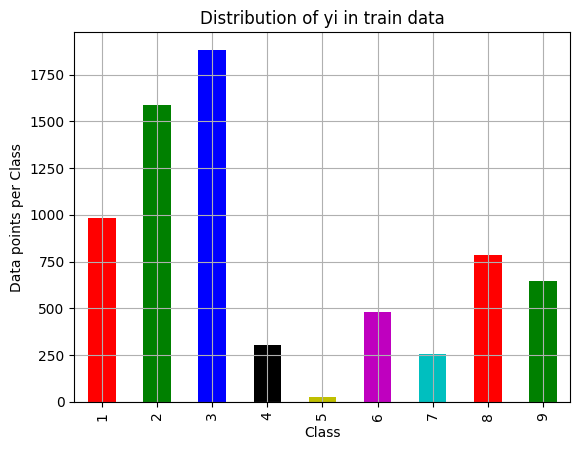

Number of data points in class 3 : 1883 ( 27.074 %)
Number of data points in class 2 : 1586 ( 22.804 %)
Number of data points in class 1 : 986 ( 14.177 %)
Number of data points in class 8 : 786 ( 11.301 %)
Number of data points in class 9 : 648 ( 9.317 %)
Number of data points in class 6 : 481 ( 6.916 %)
Number of data points in class 4 : 304 ( 4.371 %)
Number of data points in class 7 : 254 ( 3.652 %)
Number of data points in class 5 : 27 ( 0.388 %)
--------------------------------------------------------------------------------


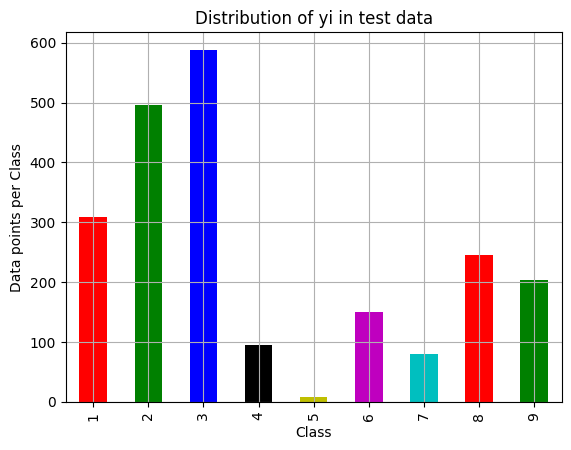

Number of data points in class 3 : 588 ( 27.047 %)
Number of data points in class 2 : 496 ( 22.815 %)
Number of data points in class 1 : 308 ( 14.167 %)
Number of data points in class 8 : 246 ( 11.316 %)
Number of data points in class 9 : 203 ( 9.338 %)
Number of data points in class 6 : 150 ( 6.9 %)
Number of data points in class 4 : 95 ( 4.37 %)
Number of data points in class 7 : 80 ( 3.68 %)
Number of data points in class 5 : 8 ( 0.368 %)
--------------------------------------------------------------------------------


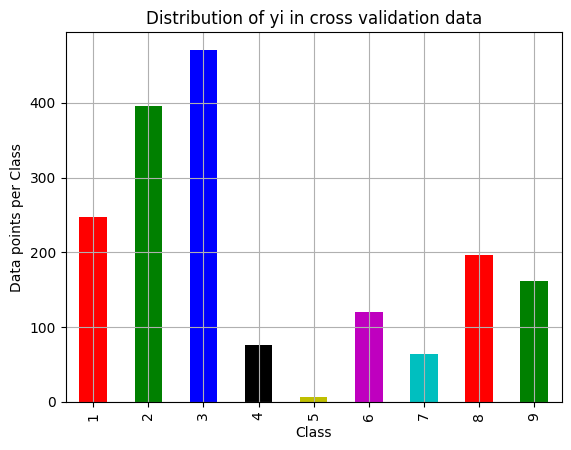

Number of data points in class 3 : 471 ( 27.085 %)
Number of data points in class 2 : 396 ( 22.772 %)
Number of data points in class 1 : 247 ( 14.204 %)
Number of data points in class 8 : 196 ( 11.271 %)
Number of data points in class 9 : 162 ( 9.316 %)
Number of data points in class 6 : 120 ( 6.901 %)
Number of data points in class 4 : 76 ( 4.37 %)
Number of data points in class 7 : 64 ( 3.68 %)
Number of data points in class 5 : 7 ( 0.403 %)


In [56]:
# it returns a dict, keys as class labels and values as the number of data points in that class

train_class_distribution = y_train.value_counts().sort_index()
test_class_distribution = y_test.value_counts().sort_index()
cv_class_distribution = y_cv.value_counts().sort_index()

my_colors = ['r', 'g', 'b', 'k', 'y', 'm', 'c']

train_class_distribution.plot(kind = 'bar', color = my_colors)
plt.xlabel('Class')
plt.ylabel('Data points per Class')
plt.title('Distribution of yi in train data')
plt.grid()
plt.show()

# ref: argsort https://docs.scipy.org/doc/numpy/reference/generated/numpy.argsort.html
# -(train_class_distribution.values): the minus sign will give us in decreasing order
sorted_yi = np.argsort(-train_class_distribution.values)
for i in sorted_yi:
    print('Number of data points in class', i+1, ':',train_class_distribution.values[i], '(', np.round((train_class_distribution.values[i]/y_train.shape[0]*100), 3), '%)')

print('-'*80)
test_class_distribution.plot(kind = 'bar', color = my_colors)
plt.xlabel('Class')
plt.ylabel('Data points per Class')
plt.title('Distribution of yi in test data')
plt.grid()
plt.show()

# ref: argsort https://docs.scipy.org/doc/numpy/reference/generated/numpy.argsort.html
# -(train_class_distribution.values): the minus sign will give us in decreasing order
sorted_yi = np.argsort(-test_class_distribution.values)
for i in sorted_yi:
    print('Number of data points in class', i+1, ':',test_class_distribution.values[i], '(', np.round((test_class_distribution.values[i]/y_test.shape[0]*100), 3), '%)')

print('-'*80)
cv_class_distribution.plot(kind = 'bar', color = my_colors)
plt.xlabel('Class')
plt.ylabel('Data points per Class')
plt.title('Distribution of yi in cross validation data')
plt.grid()
plt.show()

# ref: argsort https://docs.scipy.org/doc/numpy/reference/generated/numpy.argsort.html
# -(train_class_distribution.values): the minus sign will give us in decreasing order
sorted_yi = np.argsort(-train_class_distribution.values)
for i in sorted_yi:
    print('Number of data points in class', i+1, ':',cv_class_distribution.values[i], '(', np.round((cv_class_distribution.values[i]/y_cv.shape[0]*100), 3), '%)')


#### 6.2.1 Random Forest Classifier

 57%|█████████████████████████████████████▋                            | 4/7 [00:11<00:11,  3.87s/it]

[CV 5/5; 1/10] START colsample_bytree=0.3, learning_rate=0.15, max_depth=10, n_estimators=100, subsample=0.5
[CV 5/5; 1/10] END colsample_bytree=0.3, learning_rate=0.15, max_depth=10, n_estimators=100, subsample=0.5;, score=0.818 total time=  45.8s
[CV 3/5; 3/10] START colsample_bytree=0.1, learning_rate=0.05, max_depth=5, n_estimators=2000, subsample=0.1
[CV 3/5; 3/10] END colsample_bytree=0.1, learning_rate=0.05, max_depth=5, n_estimators=2000, subsample=0.1;, score=0.813 total time= 2.0min
[CV 1/5; 7/10] START colsample_bytree=0.1, learning_rate=0.03, max_depth=10, n_estimators=2000, subsample=1
[CV 1/5; 7/10] END colsample_bytree=0.1, learning_rate=0.03, max_depth=10, n_estimators=2000, subsample=1;, score=0.828 total time= 4.8min
[CV 4/5; 9/10] START colsample_bytree=1, learning_rate=0.05, max_depth=5, n_estimators=200, subsample=0.5
[CV 4/5; 9/10] END colsample_bytree=1, learning_rate=0.05, max_depth=5, n_estimators=200, subsample=0.5;, score=0.810 total time= 4.2min
[CV 1/5; 1/1

 71%|███████████████████████████████████████████████▏                  | 5/7 [00:26<00:15,  7.68s/it]

[CV 1/5; 3/10] START colsample_bytree=0.1, learning_rate=0.05, max_depth=5, n_estimators=2000, subsample=0.1
[CV 1/5; 3/10] END colsample_bytree=0.1, learning_rate=0.05, max_depth=5, n_estimators=2000, subsample=0.1;, score=0.827 total time= 2.1min
[CV 4/5; 5/10] START colsample_bytree=0.1, learning_rate=0.03, max_depth=5, n_estimators=100, subsample=0.3
[CV 4/5; 5/10] END colsample_bytree=0.1, learning_rate=0.03, max_depth=5, n_estimators=100, subsample=0.3;, score=0.800 total time=  13.9s
[CV 3/5; 6/10] START colsample_bytree=0.5, learning_rate=0.2, max_depth=3, n_estimators=100, subsample=0.5
[CV 3/5; 6/10] END colsample_bytree=0.5, learning_rate=0.2, max_depth=3, n_estimators=100, subsample=0.5;, score=0.815 total time=  58.3s
[CV 5/5; 7/10] START colsample_bytree=0.1, learning_rate=0.03, max_depth=10, n_estimators=2000, subsample=1
[CV 5/5; 7/10] END colsample_bytree=0.1, learning_rate=0.03, max_depth=10, n_estimators=2000, subsample=1;, score=0.820 total time= 4.4min
[CV 5/5; 9/1

 86%|████████████████████████████████████████████████████████▌         | 6/7 [00:54<00:14, 14.82s/it]

[CV 2/5; 2/10] START colsample_bytree=0.1, learning_rate=0.03, max_depth=10, n_estimators=1000, subsample=0.3
[CV 2/5; 2/10] END colsample_bytree=0.1, learning_rate=0.03, max_depth=10, n_estimators=1000, subsample=0.3;, score=0.814 total time= 2.0min
[CV 1/5; 5/10] START colsample_bytree=0.1, learning_rate=0.03, max_depth=5, n_estimators=100, subsample=0.3
[CV 1/5; 5/10] END colsample_bytree=0.1, learning_rate=0.03, max_depth=5, n_estimators=100, subsample=0.3;, score=0.815 total time=  14.2s
[CV 5/5; 5/10] START colsample_bytree=0.1, learning_rate=0.03, max_depth=5, n_estimators=100, subsample=0.3
[CV 5/5; 5/10] END colsample_bytree=0.1, learning_rate=0.03, max_depth=5, n_estimators=100, subsample=0.3;, score=0.815 total time=  14.0s
[CV 4/5; 6/10] START colsample_bytree=0.5, learning_rate=0.2, max_depth=3, n_estimators=100, subsample=0.5
[CV 4/5; 6/10] END colsample_bytree=0.5, learning_rate=0.2, max_depth=3, n_estimators=100, subsample=0.5;, score=0.811 total time=  56.7s
[CV 1/5; 8

100%|██████████████████████████████████████████████████████████████████| 7/7 [01:38<00:00, 14.11s/it]

log_loss for c =  10 is 0.03805652569620001
log_loss for c =  50 is 0.03581777212403764
log_loss for c =  100 is 0.03573157452647647
log_loss for c =  500 is 0.03596412270189632
log_loss for c =  1000 is 0.03569369108363815
log_loss for c =  2000 is 0.03572117703170291
log_loss for c =  3000 is 0.035761672914565994


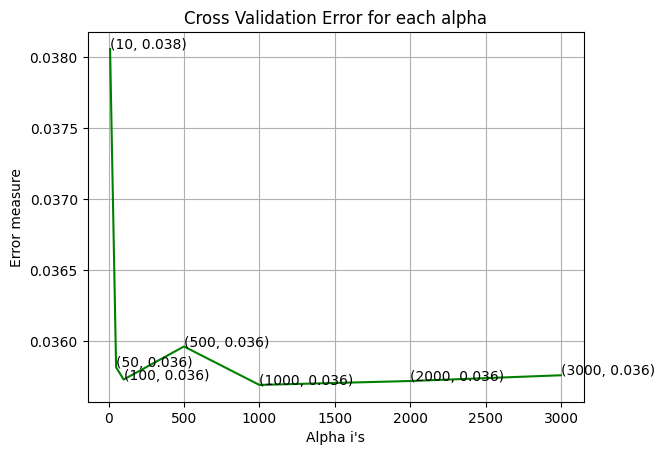

For values of best alpha =  1000 The train log loss is: 0.011159089952835792
For values of best alpha =  1000 The cross validation log loss is: 0.03569369108363815
For values of best alpha =  1000 The test log loss is: 0.028206135861998653
Number of misclassified points  0.45998160073597055
-------------------------------------------------- Confusion matrix --------------------------------------------------


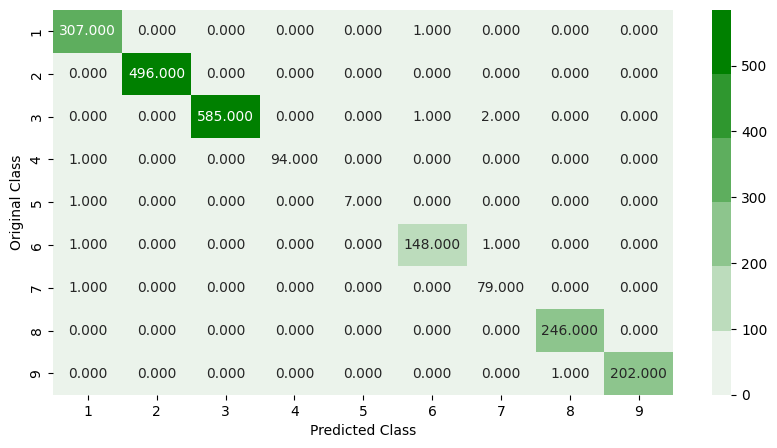

-------------------------------------------------- Precision matrix --------------------------------------------------


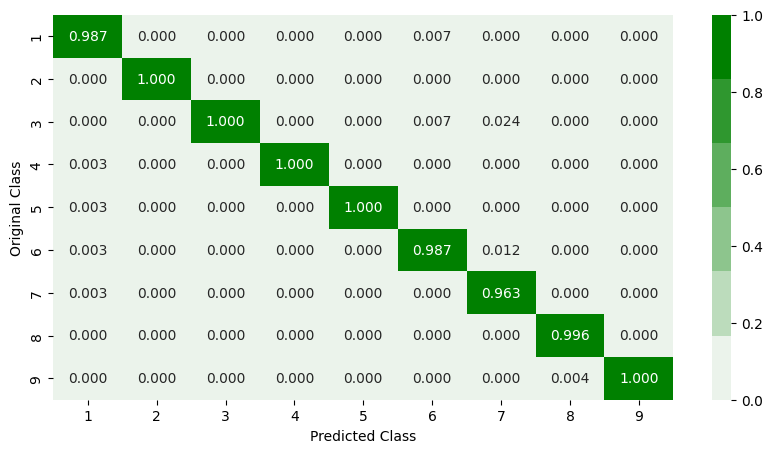

Sum of columns in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


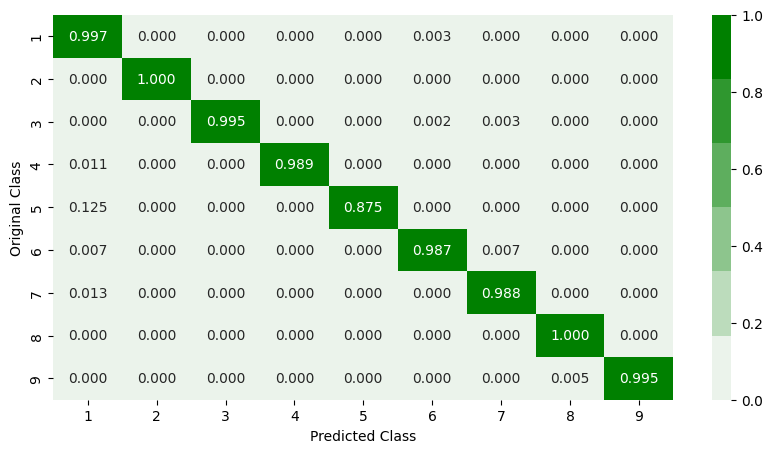

Sum of rows in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [57]:
alpha = [10, 50, 100, 500, 1000, 2000, 3000]
cv_log_error_array = []
train_log_error_array = []
for i in tqdm(alpha):
    r_cfl = RandomForestClassifier(n_estimators = i, random_state = 42, n_jobs = -1)
    r_cfl.fit(X_train, y_train)
    sig_clf = CalibratedClassifierCV(r_cfl, method = 'sigmoid', n_jobs = -1)
    sig_clf.fit(X_train, y_train)
    predict_y = sig_clf.predict_proba(X_cv)
    cv_log_error_array.append(log_loss(y_cv, predict_y, labels = r_cfl.classes_, eps = 1e-15))

for i in range(len(cv_log_error_array)):
    print ('log_loss for c = ', alpha[i], 'is', cv_log_error_array[i])

best_alpha = np.argmin(cv_log_error_array)

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array, c = 'g')
for i, txt in enumerate(np.round(cv_log_error_array, 3)):
    ax.annotate((alpha[i], np.round(txt, 3)), (alpha[i], cv_log_error_array[i]))
plt.grid()
plt.title('Cross Validation Error for each alpha')
plt.xlabel("Alpha i's")
plt.ylabel('Error measure')
plt.show()

r_cfl = RandomForestClassifier(n_estimators = alpha[best_alpha], random_state = 42, n_jobs = -1)
r_cfl.fit(X_train,y_train)
sig_clf = CalibratedClassifierCV(r_cfl, method = 'sigmoid', n_jobs = -1)
sig_clf.fit(X_train, y_train)

predict_y = sig_clf.predict_proba(X_train)
print('For values of best alpha = ', alpha[best_alpha], 'The train log loss is:', log_loss(y_train, predict_y))
predict_y = sig_clf.predict_proba(X_cv)
print('For values of best alpha = ', alpha[best_alpha], 'The cross validation log loss is:', log_loss(y_cv, predict_y))
predict_y = sig_clf.predict_proba(X_test)
print('For values of best alpha = ', alpha[best_alpha], 'The test log loss is:', log_loss(y_test, predict_y))
plot_confusion_matrix(y_test, sig_clf.predict(X_test))

#### 6.2.1 XgBoost Classification

In [58]:
# Invalid classes inferred from unique values of `y`.  Expected: [0 1 2 3 4 5 6 7 8], got [1 2 3 4 5 6 7 8 9]
# https://stackoverflow.com/a/72132612

le = LabelEncoder()
y_train = le.fit_transform(y_train)

100%|█████████████████████████████████████████████████████████████████| 6/6 [23:17<00:00, 232.98s/it]

log_loss for c =  10 is 6.0776170159133995
log_loss for c =  50 is 6.198458611730165
log_loss for c =  100 is 6.208462636904334
log_loss for c =  500 is 6.213372956895756
log_loss for c =  1000 is 6.213792621316747
log_loss for c =  2000 is 6.213803176815237


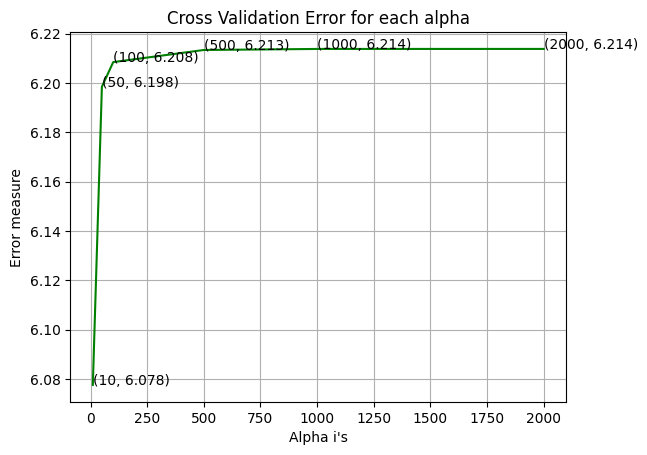

For values of best alpha =  10 The train log loss is :  0.015564888637722379
For values of best alpha =  10 The cross validation log loss is :  0.0580888067594614
For values of best alpha =  10 The test log loss is :  0.042318320309492174
Number of misclassified points  99.90800367985281
-------------------------------------------------- Confusion matrix --------------------------------------------------


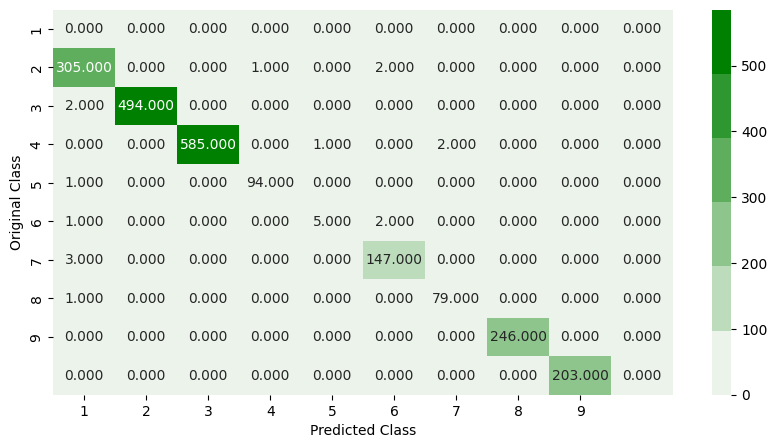

-------------------------------------------------- Precision matrix --------------------------------------------------


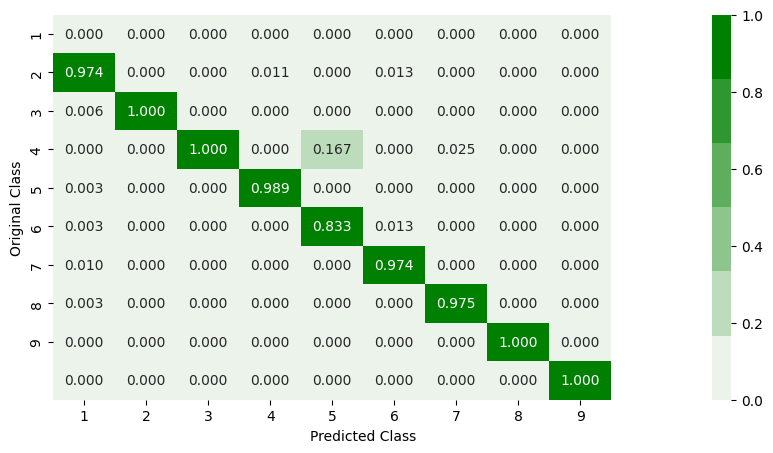

Sum of columns in precision matrix [ 1.  1.  1.  1.  1.  1.  1.  1.  1. nan]
-------------------------------------------------- Recall matrix --------------------------------------------------


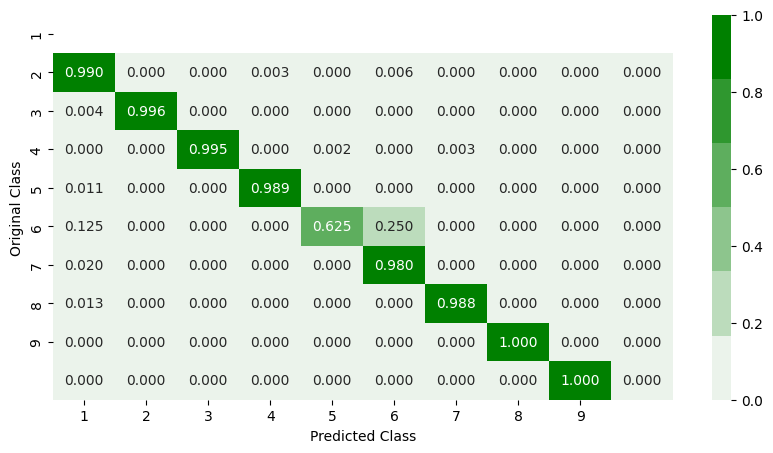

Sum of rows in precision matrix [nan  1.  1.  1.  1.  1.  1.  1.  1.  1.]


In [59]:
# Training a hyper-parameter tuned Xg-Boost regressor on our train data
# http://xgboost.readthedocs.io/en/latest/python/python_api.html?#xgboost.XGBClassifier

alpha = [10, 50, 100, 500, 1000, 2000]
cv_log_error_array = []
for i in tqdm(alpha):
    x_cfl=XGBClassifier(n_estimators = i, nthread = -1)
    x_cfl.fit(X_train,y_train)
    sig_clf = CalibratedClassifierCV(x_cfl, method = 'sigmoid', n_jobs = -1)
    sig_clf.fit(X_train, y_train)
    predict_y = sig_clf.predict_proba(X_cv)
    cv_log_error_array.append(log_loss(y_cv, predict_y, labels = x_cfl.classes_, eps = 1e-15))

for i in range(len(cv_log_error_array)):
    print ('log_loss for c = ', alpha[i], 'is', cv_log_error_array[i])

best_alpha = np.argmin(cv_log_error_array)

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array, c = 'g')
for i, txt in enumerate(np.round(cv_log_error_array, 3)):
    ax.annotate((alpha[i], np.round(txt, 3)), (alpha[i], cv_log_error_array[i]))
plt.grid()
plt.title('Cross Validation Error for each alpha')
plt.xlabel("Alpha i's")
plt.ylabel('Error measure')
plt.show()

x_cfl = XGBClassifier(n_estimators = alpha[best_alpha], nthread = -1)
x_cfl.fit(X_train,y_train)
sig_clf = CalibratedClassifierCV(x_cfl, method = 'sigmoid', n_jobs = -1)
sig_clf.fit(X_train, y_train)
    
predict_y = sig_clf.predict_proba(X_train)
print ('For values of best alpha = ', alpha[best_alpha], 'The train log loss is : ',log_loss(y_train, predict_y))
predict_y = sig_clf.predict_proba(X_cv)
print('For values of best alpha = ', alpha[best_alpha], 'The cross validation log loss is : ',log_loss(y_cv, predict_y))
predict_y = sig_clf.predict_proba(X_test)
print('For values of best alpha = ', alpha[best_alpha], 'The test log loss is : ',log_loss(y_test, predict_y))
plot_confusion_matrix(y_test, sig_clf.predict(X_test))

#### 6.2.3 XgBoost Classification with best hyper parameters using RandomSearch

In [60]:
# https://www.analyticsvidhya.com/blog/2016/03/complete-guide-parameter-tuning-xgboost-with-codes-python/

x_cfl = XGBClassifier(nthread = -1)
prams = {
        'learning_rate' : [0.01,0.03,0.05,0.1,0.15,0.2],
        'n_estimators' : [100,200,500,1000,2000],
        'max_depth' : [3,5,10],
        'colsample_bytree' : [0.1,0.3,0.5,1],
        'subsample' : [0.1,0.3,0.5,1]
        }
random_cfl1 = RandomizedSearchCV(x_cfl, param_distributions = prams, verbose = 10, n_jobs = -1,)
random_cfl1.fit(X_train, y_train)

print(random_cfl1.best_params_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 2/5; 3/10] START colsample_bytree=0.3, learning_rate=0.01, max_depth=3, n_estimators=200, subsample=0.3
[CV 2/5; 3/10] END colsample_bytree=0.3, learning_rate=0.01, max_depth=3, n_estimators=200, subsample=0.3;, score=0.988 total time= 1.0min
[CV 3/5; 5/10] START colsample_bytree=0.5, learning_rate=0.03, max_depth=10, n_estimators=2000, subsample=0.5
[CV 3/5; 5/10] END colsample_bytree=0.5, learning_rate=0.03, max_depth=10, n_estimators=2000, subsample=0.5;, score=0.996 total time=14.5min
[CV 4/5; 9/10] START colsample_bytree=0.3, learning_rate=0.01, max_depth=3, n_estimators=500, subsample=0.5
[CV 4/5; 9/10] END colsample_bytree=0.3, learning_rate=0.01, max_depth=3, n_estimators=500, subsample=0.5;, score=0.996 total time= 3.4min
[CV 3/5; 1/10] START colsample_bytree=0.3, learning_rate=0.01, max_depth=5, n_estimators=100, subsample=0.5
[CV 3/5; 1/10] END colsample_bytree=0.3, learning_rate=0.01, max_depth=5, n_estimators

In [61]:
# Training a hyper-parameter tuned Xg-Boost regressor on our train data
# http://xgboost.readthedocs.io/en/latest/python/python_api.html?#xgboost.XGBClassifier

n_est =random_cfl1.best_params_.get('n_estimators')
lrs_ = random_cfl1.best_params_.get('learning_rate')
bytree_ = random_cfl1.best_params_.get('colsample_bytree')
depth_ = random_cfl1.best_params_.get('max_depth')

x_cfl=XGBClassifier(n_estimators = n_est, learning_rate = lrs_, colsample_bytree = bytree_, max_depth = depth_, nthread = -1)
x_cfl.fit(X_train, y_train)
c_cfl = CalibratedClassifierCV(x_cfl, method = 'sigmoid', n_jobs = -1)
c_cfl.fit(X_train, y_train)

predict_y = c_cfl.predict_proba(X_train)
print ('train loss',log_loss(y_train, predict_y))
predict_y = c_cfl.predict_proba(X_cv)
print ('cv loss',log_loss(y_cv, predict_y))
predict_y = c_cfl.predict_proba(X_test)
print ('test loss',log_loss(y_test, predict_y))

end_train = time.time()

train loss 0.009452240333739672
cv loss 0.03779529617625705
test loss 0.030046894445186753


## 7 Final ML Modeling

**Machine Learning Modeling on both .bytes and .asf files**

Combining both dataframes to perform the final classification

In [62]:
uni_p_bigram = pd.read_csv('BYTES_uni_p_bigram.csv')

combined_bytes_n_asm = image_750_plus_uni_asm.merge(uni_p_bigram, on = ['ID', 'Class'])

print(f'Combined Bytes unigram & bigram + ASM unigram & image features dataset size :: {combined_bytes_n_asm.shape}\n')

combined_bytes_n_asm.to_csv('combined_bytes_n_asm.csv', index = False)

combined_bytes_n_asm.head()

Combined Bytes unigram & bigram + ASM unigram & image features dataset size :: (10868, 1360)



ID  ASM_0  ASM_1  ASM_2  ASM_3  ASM_4  ASM_13  ASM_19  \
0  Cjid9IAL13h2Rnpvc75w     46    122    101    110     99      48       9   
1  Ko1FSexsij4QuL0kOwav     46    116    101    120    116      48       9   
2  cgZEp2RhI0eKqPXuYnxw     72     69     65     68     69      48       9   
3  JGhXSB2Hu4sQKbMVlkv9     72     69     65     68     69      48       9   
4  5fsyaH409vx3SUXN2jOq     72     69     65     68     69      48       9   

   ASM_20  ASM_21  ...   4245  34181   171   138   247     771  16962  35959  \
0      32      32  ...  468.0  452.0  15.0  45.0  20.0  1084.0    0.0  171.0   
1      32      32  ...   17.0   16.0   6.0  37.0  19.0   161.0   19.0  233.0   
2       9       9  ...   10.0   10.0  12.0  14.0  14.0    74.0   13.0   87.0   
3       9       9  ...    0.0    3.0   3.0   5.0   0.0    25.0    6.0   24.0   
4       9       9  ...    1.0    3.0   4.0   9.0   1.0    37.0    4.0   24.0   

   31097   134  
0   29.0  14.0  
1   41.0   3.0  
2   17.0  12.0  
3    9.0   2.0  
4    7.0   4.0  

[5 rows x 1360 columns]

In [63]:
data_y =combined_bytes_n_asm.Class
# split the data into test and train by maintaining same distribution of output varaible 'y_true' [stratify=y_true]
X_train, X_test, y_train, y_test = train_test_split(combined_bytes_n_asm.drop(['ID', 'Class'], axis = 1), data_y, stratify = data_y, test_size = 0.20)
# split the train data into train and cross validation by maintaining same distribution of output varaible 'y_train' [stratify=y_train]
X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train, stratify = y_train, test_size = 0.20)

In [64]:
print('Number of data points in train data :', X_train.shape[0])
print('Number of data points in test data :', X_test.shape[0])
print('Number of data points in cross validation data :', X_cv.shape[0])

Number of data points in train data : 6955
Number of data points in test data : 2174
Number of data points in cross validation data : 1739


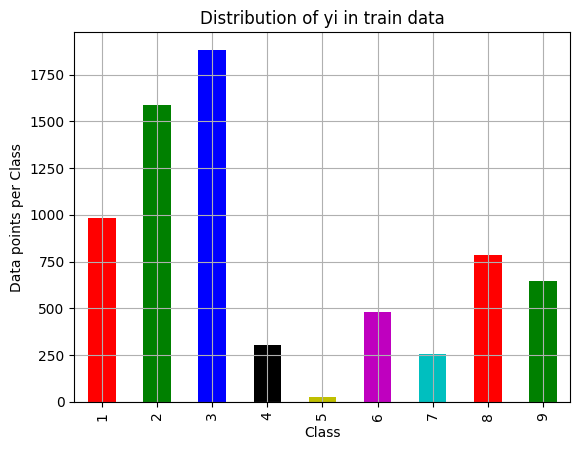

Number of data points in class 3 : 1883 ( 27.074 %)
Number of data points in class 2 : 1586 ( 22.804 %)
Number of data points in class 1 : 986 ( 14.177 %)
Number of data points in class 8 : 786 ( 11.301 %)
Number of data points in class 9 : 648 ( 9.317 %)
Number of data points in class 6 : 481 ( 6.916 %)
Number of data points in class 4 : 304 ( 4.371 %)
Number of data points in class 7 : 254 ( 3.652 %)
Number of data points in class 5 : 27 ( 0.388 %)
--------------------------------------------------------------------------------


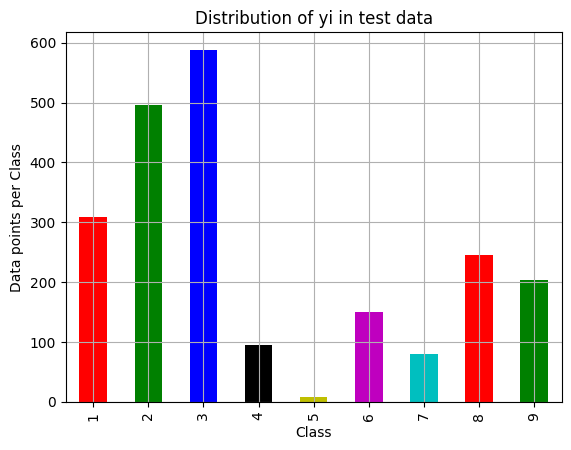

Number of data points in class 3 : 588 ( 27.047 %)
Number of data points in class 2 : 496 ( 22.815 %)
Number of data points in class 1 : 308 ( 14.167 %)
Number of data points in class 8 : 246 ( 11.316 %)
Number of data points in class 9 : 203 ( 9.338 %)
Number of data points in class 6 : 150 ( 6.9 %)
Number of data points in class 4 : 95 ( 4.37 %)
Number of data points in class 7 : 80 ( 3.68 %)
Number of data points in class 5 : 8 ( 0.368 %)
--------------------------------------------------------------------------------


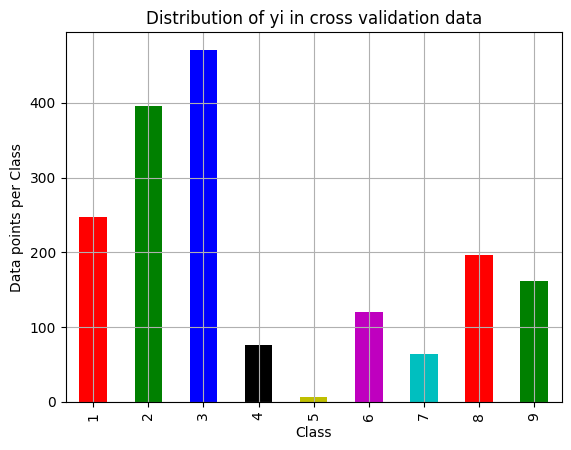

Number of data points in class 3 : 471 ( 27.085 %)
Number of data points in class 2 : 396 ( 22.772 %)
Number of data points in class 1 : 247 ( 14.204 %)
Number of data points in class 8 : 196 ( 11.271 %)
Number of data points in class 9 : 162 ( 9.316 %)
Number of data points in class 6 : 120 ( 6.901 %)
Number of data points in class 4 : 76 ( 4.37 %)
Number of data points in class 7 : 64 ( 3.68 %)
Number of data points in class 5 : 7 ( 0.403 %)


In [65]:
# it returns a dict, keys as class labels and values as the number of data points in that class

train_class_distribution = y_train.value_counts().sort_index()
test_class_distribution = y_test.value_counts().sort_index()
cv_class_distribution = y_cv.value_counts().sort_index()

my_colors = ['r', 'g', 'b', 'k', 'y', 'm', 'c']

train_class_distribution.plot(kind = 'bar', color = my_colors)
plt.xlabel('Class')
plt.ylabel('Data points per Class')
plt.title('Distribution of yi in train data')
plt.grid()
plt.show()

# ref: argsort https://docs.scipy.org/doc/numpy/reference/generated/numpy.argsort.html
# -(train_class_distribution.values): the minus sign will give us in decreasing order
sorted_yi = np.argsort(-train_class_distribution.values)
for i in sorted_yi:
    print('Number of data points in class', i+1, ':',train_class_distribution.values[i], '(', np.round((train_class_distribution.values[i]/y_train.shape[0]*100), 3), '%)')

print('-'*80)
test_class_distribution.plot(kind = 'bar', color = my_colors)
plt.xlabel('Class')
plt.ylabel('Data points per Class')
plt.title('Distribution of yi in test data')
plt.grid()
plt.show()

# ref: argsort https://docs.scipy.org/doc/numpy/reference/generated/numpy.argsort.html
# -(train_class_distribution.values): the minus sign will give us in decreasing order
sorted_yi = np.argsort(-test_class_distribution.values)
for i in sorted_yi:
    print('Number of data points in class', i+1, ':',test_class_distribution.values[i], '(', np.round((test_class_distribution.values[i]/y_test.shape[0]*100), 3), '%)')

print('-'*80)
cv_class_distribution.plot(kind = 'bar', color = my_colors)
plt.xlabel('Class')
plt.ylabel('Data points per Class')
plt.title('Distribution of yi in cross validation data')
plt.grid()
plt.show()

# ref: argsort https://docs.scipy.org/doc/numpy/reference/generated/numpy.argsort.html
# -(train_class_distribution.values): the minus sign will give us in decreasing order
sorted_yi = np.argsort(-train_class_distribution.values)
for i in sorted_yi:
    print('Number of data points in class', i+1, ':',cv_class_distribution.values[i], '(', np.round((cv_class_distribution.values[i]/y_cv.shape[0]*100), 3), '%)')


### 7.1 Random Forest Classifier

100%|██████████████████████████████████████████████████████████████████| 7/7 [02:54<00:00, 24.95s/it]

log_loss for c =  10 is 0.02332050997776363
log_loss for c =  50 is 0.0231656451986692
log_loss for c =  100 is 0.02330384792218278
log_loss for c =  500 is 0.0230551423116253
log_loss for c =  1000 is 0.02312336711149783
log_loss for c =  2000 is 0.0231328796327071
log_loss for c =  3000 is 0.02312041354703102


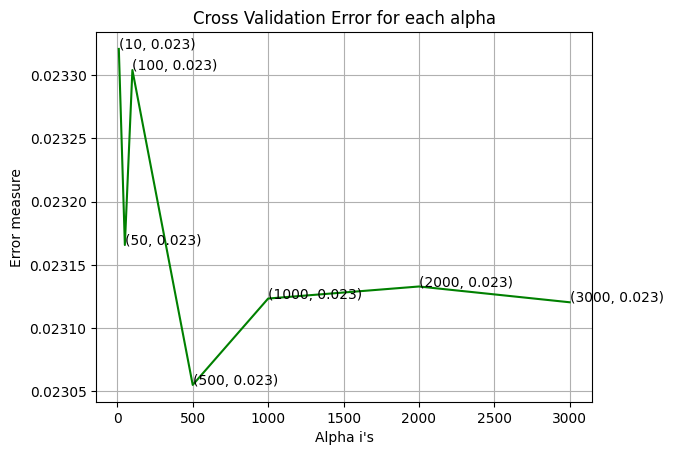

For values of best alpha =  500 The train log loss is: 0.010859221616792942
For values of best alpha =  500 The cross validation log loss is: 0.0230551423116253
For values of best alpha =  500 The test log loss is: 0.018128503740660287
Number of misclassified points  0.5059797608095675
-------------------------------------------------- Confusion matrix --------------------------------------------------


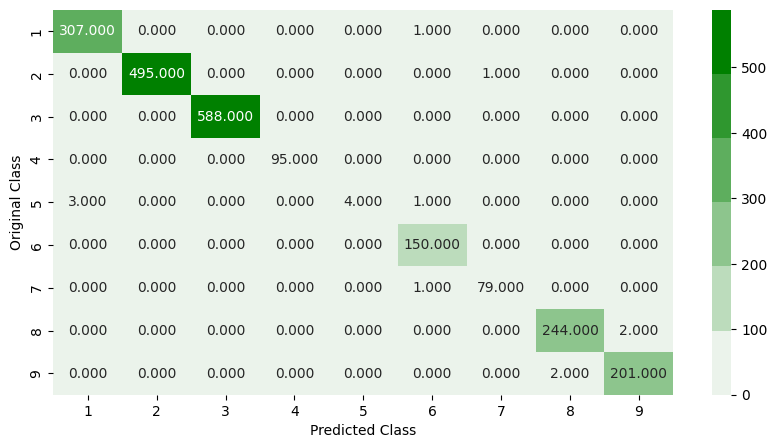

-------------------------------------------------- Precision matrix --------------------------------------------------


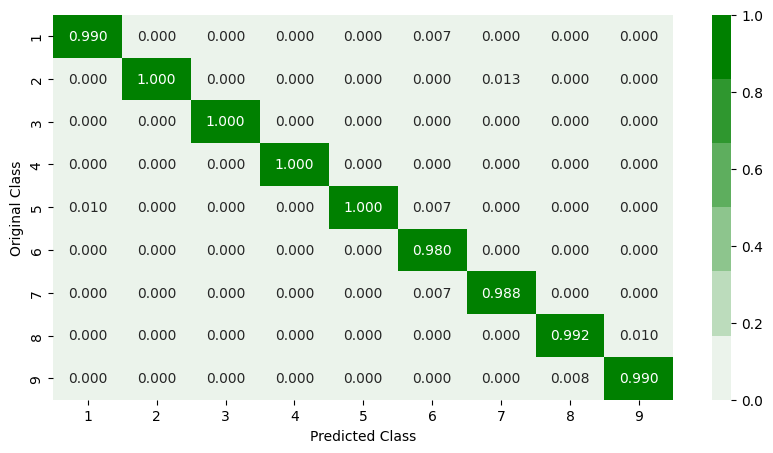

Sum of columns in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


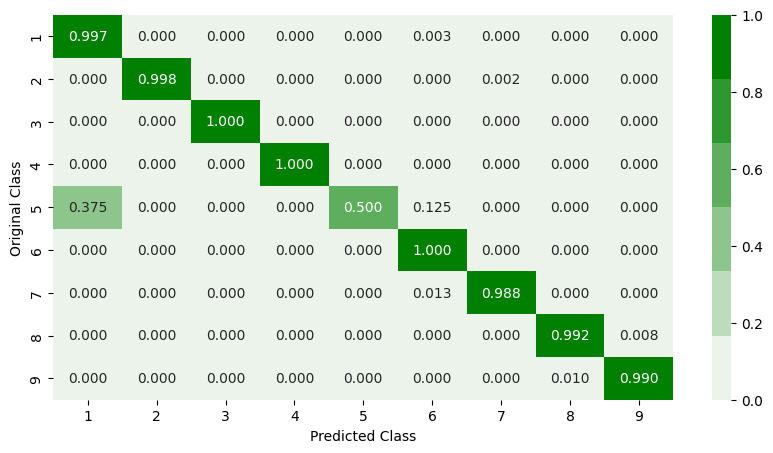

Sum of rows in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [66]:
alpha = [10, 50, 100, 500, 1000, 2000, 3000]
cv_log_error_array = []
train_log_error_array = []
for i in tqdm(alpha):
    r_cfl = RandomForestClassifier(n_estimators = i, random_state = 42, n_jobs = -1)
    r_cfl.fit(X_train, y_train)
    sig_clf = CalibratedClassifierCV(r_cfl, method = 'sigmoid', n_jobs = -1)
    sig_clf.fit(X_train, y_train)
    predict_y = sig_clf.predict_proba(X_cv)
    cv_log_error_array.append(log_loss(y_cv, predict_y, labels = r_cfl.classes_, eps = 1e-15))

for i in range(len(cv_log_error_array)):
    print ('log_loss for c = ', alpha[i], 'is', cv_log_error_array[i])

best_alpha = np.argmin(cv_log_error_array)

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array, c = 'g')
for i, txt in enumerate(np.round(cv_log_error_array, 3)):
    ax.annotate((alpha[i], np.round(txt, 3)), (alpha[i], cv_log_error_array[i]))
plt.grid()
plt.title('Cross Validation Error for each alpha')
plt.xlabel("Alpha i's")
plt.ylabel('Error measure')
plt.show()

r_cfl = RandomForestClassifier(n_estimators = alpha[best_alpha], random_state = 42, n_jobs = -1)
r_cfl.fit(X_train,y_train)
sig_clf = CalibratedClassifierCV(r_cfl, method = 'sigmoid', n_jobs = -1)
sig_clf.fit(X_train, y_train)

predict_y = sig_clf.predict_proba(X_train)
print('For values of best alpha = ', alpha[best_alpha], 'The train log loss is:', log_loss(y_train, predict_y))
predict_y = sig_clf.predict_proba(X_cv)
print('For values of best alpha = ', alpha[best_alpha], 'The cross validation log loss is:', log_loss(y_cv, predict_y))
predict_y = sig_clf.predict_proba(X_test)
print('For values of best alpha = ', alpha[best_alpha], 'The test log loss is:', log_loss(y_test, predict_y))
plot_confusion_matrix(y_test, sig_clf.predict(X_test))

### 7.2 XgBoost Classification

In [67]:
# Invalid classes inferred from unique values of `y`.  Expected: [0 1 2 3 4 5 6 7 8], got [1 2 3 4 5 6 7 8 9]
# https://stackoverflow.com/a/72132612

le = LabelEncoder()
y_train = le.fit_transform(y_train)

 50%|█████████████████████████████████                                 | 3/6 [04:11<04:44, 94.94s/it]

[CV 2/5; 2/10] START colsample_bytree=0.1, learning_rate=0.03, max_depth=3, n_estimators=100, subsample=0.1
[CV 2/5; 2/10] END colsample_bytree=0.1, learning_rate=0.03, max_depth=3, n_estimators=100, subsample=0.1;, score=0.983 total time=   9.0s
[CV 2/5; 4/10] START colsample_bytree=1, learning_rate=0.01, max_depth=10, n_estimators=2000, subsample=0.5
[CV 2/5; 4/10] END colsample_bytree=1, learning_rate=0.01, max_depth=10, n_estimators=2000, subsample=0.5;, score=0.996 total time=32.6min


100%|█████████████████████████████████████████████████████████████████| 6/6 [39:10<00:00, 391.80s/it]

log_loss for c =  10 is 5.96397715810113
log_loss for c =  50 is 6.133307990216576
log_loss for c =  100 is 6.1368197706815515
log_loss for c =  500 is 6.1375128330170385
log_loss for c =  1000 is 6.137505170050785
log_loss for c =  2000 is 6.137568254577485


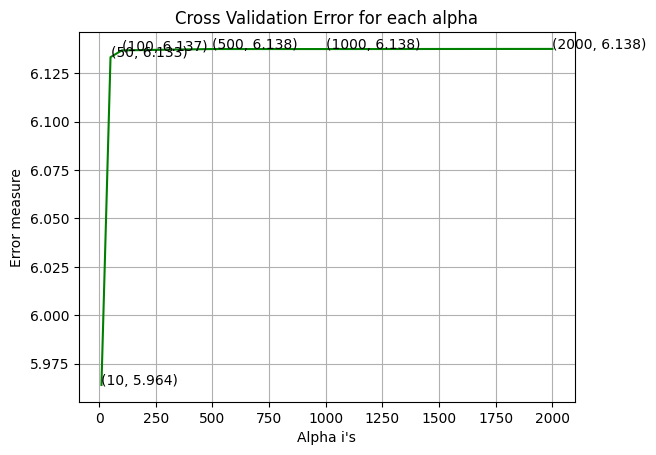

For values of best alpha =  10 The train log loss is :  0.014348016950528755
For values of best alpha =  10 The cross validation log loss is :  0.03694567113395736
For values of best alpha =  10 The test log loss is :  0.04077262145869586
Number of misclassified points  99.81600735970562
-------------------------------------------------- Confusion matrix --------------------------------------------------


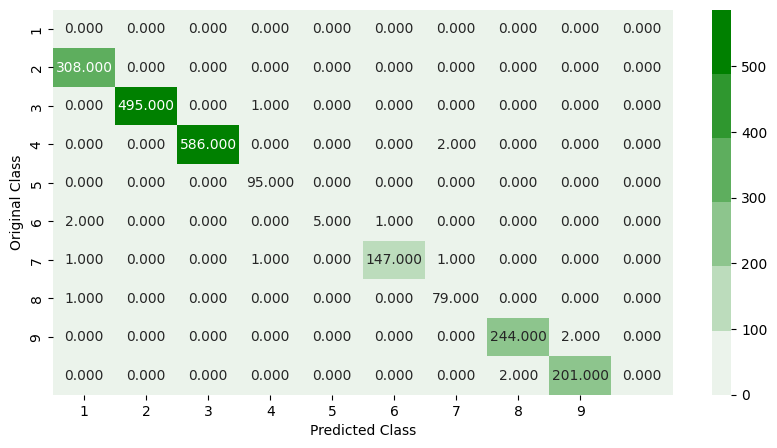

-------------------------------------------------- Precision matrix --------------------------------------------------


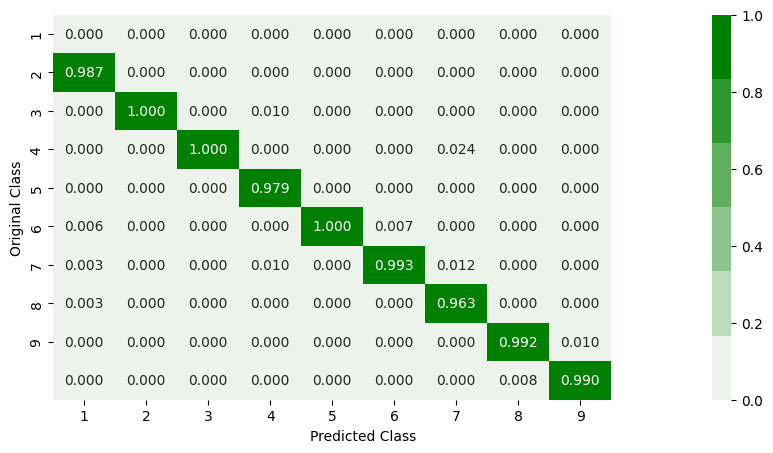

Sum of columns in precision matrix [ 1.  1.  1.  1.  1.  1.  1.  1.  1. nan]
-------------------------------------------------- Recall matrix --------------------------------------------------


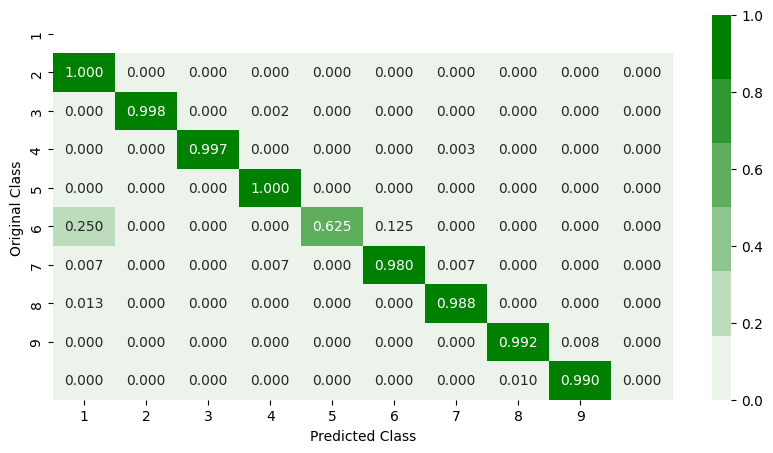

Sum of rows in precision matrix [nan  1.  1.  1.  1.  1.  1.  1.  1.  1.]


In [68]:
# Training a hyper-parameter tuned Xg-Boost regressor on our train data
# http://xgboost.readthedocs.io/en/latest/python/python_api.html?#xgboost.XGBClassifier

alpha = [10, 50, 100, 500, 1000, 2000]
cv_log_error_array = []
for i in tqdm(alpha):
    x_cfl=XGBClassifier(n_estimators = i, nthread = -1)
    x_cfl.fit(X_train,y_train)
    sig_clf = CalibratedClassifierCV(x_cfl, method = 'sigmoid', n_jobs = -1)
    sig_clf.fit(X_train, y_train)
    predict_y = sig_clf.predict_proba(X_cv)
    cv_log_error_array.append(log_loss(y_cv, predict_y, labels = x_cfl.classes_, eps = 1e-15))

for i in range(len(cv_log_error_array)):
    print ('log_loss for c = ', alpha[i], 'is', cv_log_error_array[i])

best_alpha = np.argmin(cv_log_error_array)

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array, c = 'g')
for i, txt in enumerate(np.round(cv_log_error_array, 3)):
    ax.annotate((alpha[i], np.round(txt, 3)), (alpha[i], cv_log_error_array[i]))
plt.grid()
plt.title('Cross Validation Error for each alpha')
plt.xlabel("Alpha i's")
plt.ylabel('Error measure')
plt.show()

x_cfl = XGBClassifier(n_estimators = alpha[best_alpha], nthread = -1)
x_cfl.fit(X_train,y_train)
sig_clf = CalibratedClassifierCV(x_cfl, method = 'sigmoid', n_jobs = -1)
sig_clf.fit(X_train, y_train)
    
predict_y = sig_clf.predict_proba(X_train)
print ('For values of best alpha = ', alpha[best_alpha], 'The train log loss is : ',log_loss(y_train, predict_y))
predict_y = sig_clf.predict_proba(X_cv)
print('For values of best alpha = ', alpha[best_alpha], 'The cross validation log loss is : ',log_loss(y_cv, predict_y))
predict_y = sig_clf.predict_proba(X_test)
print('For values of best alpha = ', alpha[best_alpha], 'The test log loss is : ',log_loss(y_test, predict_y))
plot_confusion_matrix(y_test, sig_clf.predict(X_test))

### 7.3 XgBoost Classification with best hyper parameters using RandomSearch

In [69]:
# https://www.analyticsvidhya.com/blog/2016/03/complete-guide-parameter-tuning-xgboost-with-codes-python/

x_cfl = XGBClassifier(nthread = -1)
prams = {
        'learning_rate' : [0.01,0.03,0.05,0.1,0.15,0.2],
        'n_estimators' : [100,200,500,1000,2000],
        'max_depth' : [3,5,10],
        'colsample_bytree' : [0.1,0.3,0.5,1],
        'subsample' : [0.1,0.3,0.5,1]
        }
random_cfl1 = RandomizedSearchCV(x_cfl, param_distributions = prams, verbose = 10, n_jobs = -1,)
random_cfl1.fit(X_train, y_train)

print(random_cfl1.best_params_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 4/5; 1/10] START colsample_bytree=0.3, learning_rate=0.1, max_depth=3, n_estimators=2000, subsample=0.1
[CV 4/5; 1/10] END colsample_bytree=0.3, learning_rate=0.1, max_depth=3, n_estimators=2000, subsample=0.1;, score=0.996 total time= 5.6min
[CV 1/5; 6/10] START colsample_bytree=0.5, learning_rate=0.15, max_depth=10, n_estimators=1000, subsample=0.5
[CV 1/5; 6/10] END colsample_bytree=0.5, learning_rate=0.15, max_depth=10, n_estimators=1000, subsample=0.5;, score=0.997 total time= 9.2min
[CV 1/5; 3/10] START colsample_bytree=0.1, learning_rate=0.15, max_depth=10, n_estimators=2000, subsample=0.1
[CV 1/5; 3/10] END colsample_bytree=0.1, learning_rate=0.15, max_depth=10, n_estimators=2000, subsample=0.1;, score=0.995 total time= 2.5min
[CV 3/5; 3/10] START colsample_bytree=0.1, learning_rate=0.15, max_depth=10, n_estimators=2000, subsample=0.1
[CV 3/5; 3/10] END colsample_bytree=0.1, learning_rate=0.15, max_depth=10, n_est

In [70]:
# Training a hyper-parameter tuned Xg-Boost regressor on our train data
# http://xgboost.readthedocs.io/en/latest/python/python_api.html?#xgboost.XGBClassifier

n_est =random_cfl1.best_params_.get('n_estimators')
lrs_ = random_cfl1.best_params_.get('learning_rate')
bytree_ = random_cfl1.best_params_.get('colsample_bytree')
depth_ = random_cfl1.best_params_.get('max_depth')

x_cfl=XGBClassifier(n_estimators = n_est, learning_rate = lrs_, colsample_bytree = bytree_, max_depth = depth_, nthread = -1)
x_cfl.fit(X_train, y_train)
c_cfl = CalibratedClassifierCV(x_cfl, method = 'sigmoid', n_jobs = -1)
c_cfl.fit(X_train, y_train)

predict_y = c_cfl.predict_proba(X_train)
print ('train loss',log_loss(y_train, predict_y))
predict_y = c_cfl.predict_proba(X_cv)
print ('cv loss',log_loss(y_cv, predict_y))
predict_y = c_cfl.predict_proba(X_test)
print ('test loss',log_loss(y_test, predict_y))

end_train = time.time()

[CV 1/5; 2/10] START colsample_bytree=0.1, learning_rate=0.03, max_depth=3, n_estimators=100, subsample=0.1
[CV 1/5; 2/10] END colsample_bytree=0.1, learning_rate=0.03, max_depth=3, n_estimators=100, subsample=0.1;, score=0.980 total time=   8.9s
[CV 1/5; 4/10] START colsample_bytree=1, learning_rate=0.01, max_depth=10, n_estimators=2000, subsample=0.5
[CV 1/5; 4/10] END colsample_bytree=1, learning_rate=0.01, max_depth=10, n_estimators=2000, subsample=0.5;, score=0.997 total time=33.4min
[CV 3/5; 2/10] START colsample_bytree=0.3, learning_rate=0.03, max_depth=5, n_estimators=200, subsample=0.5
[CV 3/5; 2/10] END colsample_bytree=0.3, learning_rate=0.03, max_depth=5, n_estimators=200, subsample=0.5;, score=0.996 total time= 3.6min
[CV 1/5; 4/10] START colsample_bytree=0.5, learning_rate=0.2, max_depth=3, n_estimators=500, subsample=0.5
[CV 1/5; 4/10] END colsample_bytree=0.5, learning_rate=0.2, max_depth=3, n_estimators=500, subsample=0.5;, score=0.997 total time= 4.9min
[CV 3/5; 6/10]

# 7. Model Comparison

In [71]:
from prettytable import PrettyTable

x = PrettyTable()

x.field_names = ['Features', 'On', 'RandomForest', 'XGBoost', 'RSearch+XGBoost']

x.add_row(['BYTES:', 'Train', 0.02595, 0.03812, 0.02233])
x.add_row(['Unigram', 'CV', 0.07018, 0.08137, 0.059847])
x.add_row(['Features', 'Test', 0.07911, 0.09058, 0.07266])
x.add_row(['\n\n', '', '', '', ''])

x.add_row(['ASM:', 'Train', 0.01432, 0.02153, 0.01195])
x.add_row(['Unigram', 'CV', 0.04490, 0.05049, 0.04634])
x.add_row(['Features', 'Test', 0.03765, 0.04207, 0.03514])
x.add_row(['\n\n', '', '', '', ''])

x.add_row(['BYTES + ASM:', 'Train', 0.01569, 0.01222, 0.01202])
x.add_row(['Unigram', 'CV', 0.04354, 0.03020, 0.03189])
x.add_row(['Features', 'Test', 0.05813, 0.0483, 0.05038])
x.add_row(['\n\n', '', '', '', ''])

           
x.add_row(['BYTES:', 'Train', 0.01793, 0.02714, 0.01636])
x.add_row(['Unigram +', 'CV', 0.03575, 0.05561, 0.03596])
x.add_row(['Bigram', 'Test', 0.04508, 0.06950, 0.04798])
x.add_row(['\n\n', '', '', '', ''])

x.add_row(['ASM:', 'Train', 0.38133, 0.38859, 0.381823])
x.add_row(['750 Image', 'CV', 0.42301, 0.42857, 0.42088])
x.add_row(['Features', 'Test', 0.40857, 0.41377, 0.42088])
x.add_row(['\n\n', '', '', '', ''])

x.add_row(['ASM:', 'Train', 0.01115, 0.01556, 0.009452])
x.add_row(['Unigram +', 'CV', 0.03569, 0.05808, 0.03779])
x.add_row(['750 Image Features', 'Test', 0.02820, 0.04231, 0.03004])
x.add_row(['\n\n', '', '', '', ''])

x.add_row(['Final Model\n-----------', '', '', '', ''])

x.add_row(['BYTES: Uni+Bigrams', 'Train', 0.01085, 0.01434, 0.00965])
x.add_row(['ASM: Unigram +', 'CV', 0.02305, 0.03694, 0.02634])
x.add_row(['750 Image Features', 'Test', 0.01812, 0.04077, 0.02766])

print(x)

+--------------------+-------+--------------+---------+-----------------+
|      Features      |   On  | RandomForest | XGBoost | RSearch+XGBoost |
+--------------------+-------+--------------+---------+-----------------+
|       BYTES:       | Train |   0.02595    | 0.03812 |     0.02233     |
|      Unigram       |   CV  |   0.07018    | 0.08137 |     0.059847    |
|      Features      |  Test |   0.07911    | 0.09058 |     0.07266     |
|                    |       |              |         |                 |
|                    |       |              |         |                 |
|                    |       |              |         |                 |
|        ASM:        | Train |   0.01432    | 0.02153 |     0.01195     |
|      Unigram       |   CV  |    0.0449    | 0.05049 |     0.04634     |
|      Features      |  Test |   0.03765    | 0.04207 |     0.03514     |
|                    |       |              |         |                 |
|                    |       |        